In [3]:
import numpy as np                  
import pandas as pd      
import json
import platypus as plat        
from matplotlib import pyplot as plt
import pygmo as pg

In [112]:
#front must be a 2d matrix
# calculates the HV of a front
def front_hv(front):
    inver = [] # make all objective cost negative
    if type(front) != list:
        return 0
        
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    
    hv = pg.hypervolume(inver) #initialize hypervolume object
    try: 
        h = hv.compute(ref)
    except ValueError:
        h = 0
        print("-----------------------", "\n", "no good ref point")
        print(front)
    return h

# gen_df should be the pandas series of the front, i.e. call as gen_hv(df["gen0-front")
def gen_hv(gen_df):
    HVs = []
    for front in gen_df:
        HVs.append(front_hv(front))
    return HVs

def gen_time(df):
    gen_avg_time = []
    gen_time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
    for gen in gen_time_df:
        gen_times = []
        for time in gen_time_df[gen].tolist():
            gen_times.append(time)
        gen_avg_time.append(float(np.mean(gen_times)))

    running_sum = [gen_avg_time[0]]
    for i in range(1,6):
        running_sum.append(running_sum[i-1] + gen_avg_time[i]) 
    return gen_avg_time, running_sum


def run_times(df):
    gen_time = []
    gen_time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
    for gen in gen_time_df:
        gen_t = []
        for time in gen_time_df[gen].tolist():
            gen_t.append(time)
        gen_time.append(gen_t)

    running_sum = [gen_time[0]]
    for i in range(1,6):
        next_t = []
        for j in range(0,len(gen_time[0])):
            next_t.append(running_sum[i-1][j] + gen_time[i][j])
        running_sum.append(next_t)
    return running_sum

In [166]:
#return [gen0 failrate, gen1 failrate, ... ,gen5 failrate[
def failure_rate(df, time_limit):
    n = len(df)
    gen_fails = [0] * 6
    running_runtime = run_times(df)

    for gen in range(0, len(running_runtime)):
        for inst_t in running_runtime[gen]:
            if(inst_t > time_limit):
                gen_fails[gen] = gen_fails[gen] + 1

    rate = []
    for gen in gen_fails:
        rate.append(gen / len(df) * 100)
        
    return rate

In [167]:
BAY_COMBINED_BORDA_K_20.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])

,gen0-time,gen1-time,gen2-time,gen3-time,gen4-time,gen5-time
0,13689,13032,13032,13251,13251,13621
1,21443,20367,20367,20173,20173,20182
2,11585,11642,11642,12440,12440,12195
3,9159,8824,8824,9242,9242,9096
4,18070,17196,17196,17434,17434,17712
5,9661,9615,9615,9383,9383,9209
6,22907,21866,21866,21489,21489,21509
7,8548,8215,8215,8399,8399,8402
8,19424,18707,18707,17814,17814,17691
9,22877,22200,22200,21608,21608,22648


In [168]:
failure_rate(DAO_COMBINED_BORDA_K_50, 300000)

[0.0, 0.0, 0.0, 0.1282051282051282, 0.8974358974358974, 1.5384615384615385]

# USA-Road

In [210]:
#
# VBEA ROAD
#

# NY_COMBINED_BORDA_K_20 = pd.json_normalize(json.load(open("road/ny-borda-combined-20.json"))["data"])
# NY_COMBINED_RANGE_K_20 = pd.json_normalize(json.load(open("road/ny-range-combined-20.json"))["data"])
# NY_COMBINED_CAV_K_20 = pd.json_normalize(json.load(open("road/ny-condorcet-combined-20.json"))["data"])
# NY_COMBINED_CONDORCET_K_20 = pd.json_normalize(json.load(open("road/ny-combined_approval-combined-20.json"))["data"])

COL_COMBINED_BORDA_K_20 = pd.json_normalize(json.load(open("road/col-borda-combined-20.json"))["data"])
COL_COMBINED_RANGE_K_20 = pd.json_normalize(json.load(open("road/col-range-combined-20.json"))["data"])
COL_COMBINED_CAV_K_20 = pd.json_normalize(json.load(open("road/col-condorcet-combined-20.json"))["data"])
COL_COMBINED_CONDORCET_K_20 = pd.json_normalize(json.load(open("road/col-combined_approval-combined-20.json"))["data"])

BAY_COMBINED_BORDA_K_20 = pd.json_normalize(json.load(open("road/bay-borda-combined-20.json"))["data"])
BAY_COMBINED_RANGE_K_20 = pd.json_normalize(json.load(open("road/bay-range-combined-20.json"))["data"])
BAY_COMBINED_CAV_K_20 = pd.json_normalize(json.load(open("road/bay-condorcet-combined-20.json"))["data"])
BAY_COMBINED_CONDORCET_K_20 = pd.json_normalize(json.load(open("road/bay-combined_approval-combined-20.json"))["data"])

# NY_CONSCIOUS_BORDA_K_20 = pd.json_normalize(json.load(open("road/ny-borda-conscious-20.json"))["data"])
# NY_CONSCIOUS_RANGE_K_20 = pd.json_normalize(json.load(open("road/ny-range-conscious-20.json"))["data"])
# NY_CONSCIOUS_CAV_K_20 = pd.json_normalize(json.load(open("road/ny-condorcet-conscious-20.json"))["data"])
# NY_CONSCIOUS_CONDORCET_K_20 = pd.json_normalize(json.load(open("road/ny-combined_approval-conscious-20.json"))["data"])

COL_CONSCIOUS_BORDA_K_20 = pd.json_normalize(json.load(open("road/col-borda-conscious-20.json"))["data"])
COL_CONSCIOUS_RANGE_K_20 = pd.json_normalize(json.load(open("road/col-range-conscious-20.json"))["data"])
COL_CONSCIOUS_CAV_K_20 = pd.json_normalize(json.load(open("road/col-condorcet-conscious-20.json"))["data"])
COL_CONSCIOUS_CONDORCET_K_20 = pd.json_normalize(json.load(open("road/col-combined_approval-conscious-20.json"))["data"])

BAY_CONSCIOUS_BORDA_K_20 = pd.json_normalize(json.load(open("road/bay-borda-conscious-20.json"))["data"])
BAY_CONSCIOUS_RANGE_K_20 = pd.json_normalize(json.load(open("road/bay-range-conscious-20.json"))["data"])
BAY_CONSCIOUS_CAV_K_20 = pd.json_normalize(json.load(open("road/bay-condorcet-conscious-20.json"))["data"])
BAY_CONSCIOUS_CONDORCET_K_20 = pd.json_normalize(json.load(open("road/bay-combined_approval-conscious-20.json"))["data"])

# Uncap
# NY_COMBINED_BORDA_UNCAP = pd.json_normalize(json.load(open("road/ny-borda-combined-uncap.json"))["data"])
# NY_COMBINED_RANGE_UNCAP = pd.json_normalize(json.load(open("road/ny-range-combined-uncap.json"))["data"])
# NY_COMBINED_CAV_UNCAP = pd.json_normalize(json.load(open("road/ny-combined_approval-combined-uncap.json"))["data"])
# NY_COMBINED_CONDORCET_UNCAP = pd.json_normalize(json.load(open("road/ny-condorcet-combined-uncap.json"))["data"])

# NY_CONSCIOUS_BORDA_UNCAP = pd.json_normalize(json.load(open("road/ny-borda-conscious-uncap.json"))["data"])
# NY_CONSCIOUS_RANGE_UNCAP = pd.json_normalize(json.load(open("road/ny-range-conscious-uncap.json"))["data"])
# NY_CONSCIOUS_CAV_UNCAP = pd.json_normalize(json.load(open("road/ny-combined_approval-conscious-uncap.json"))["data"])
# NY_CONSCIOUS_CONDORCET_UNCAP = pd.json_normalize(json.load(open("road/ny-condorcet-conscious-uncap.json"))["data"])

COL_COMBINED_BORDA_UNCAP = pd.json_normalize(json.load(open("road/col-borda-combined-uncap.json"))["data"])
COL_COMBINED_RANGE_UNCAP = pd.json_normalize(json.load(open("road/col-range-combined-uncap.json"))["data"])
COL_COMBINED_CAV_UNCAP = pd.json_normalize(json.load(open("road/col-combined_approval-combined-uncap.json"))["data"])
COL_COMBINED_CONDORCET_UNCAP = pd.json_normalize(json.load(open("road/col-condorcet-combined-uncap.json"))["data"])

COL_CONSCIOUS_BORDA_UNCAP = pd.json_normalize(json.load(open("road/col-borda-conscious-uncap.json"))["data"])
COL_CONSCIOUS_RANGE_UNCAP = pd.json_normalize(json.load(open("road/col-range-conscious-uncap.json"))["data"])
COL_CONSCIOUS_CAV_UNCAP = pd.json_normalize(json.load(open("road/col-combined_approval-conscious-uncap.json"))["data"])
COL_CONSCIOUS_CONDORCET_UNCAP = pd.json_normalize(json.load(open("road/col-condorcet-conscious-uncap.json"))["data"])

BAY_COMBINED_BORDA_UNCAP = pd.json_normalize(json.load(open("road/bay-borda-combined-uncap.json"))["data"])
BAY_COMBINED_RANGE_UNCAP = pd.json_normalize(json.load(open("road/bay-range-combined-uncap.json"))["data"])
BAY_COMBINED_CAV_UNCAP = pd.json_normalize(json.load(open("road/bay-combined_approval-combined-uncap.json"))["data"])
BAY_COMBINED_CONDORCET_UNCAP = pd.json_normalize(json.load(open("road/bay-condorcet-combined-uncap.json"))["data"])

BAY_CONSCIOUS_BORDA_UNCAP = pd.json_normalize(json.load(open("road/bay-borda-conscious-uncap.json"))["data"])
BAY_CONSCIOUS_RANGE_UNCAP = pd.json_normalize(json.load(open("road/bay-range-conscious-uncap.json"))["data"])
BAY_CONSCIOUS_CAV_UNCAP = pd.json_normalize(json.load(open("road/bay-combined_approval-conscious-uncap.json"))["data"])
BAY_CONSCIOUS_CONDORCET_UNCAP = pd.json_normalize(json.load(open("road/bay-condorcet-conscious-uncap.json"))["data"])

In [209]:
BAY_COMBINED_BORDA_K_20_GEN0 = BAY_COMBINED_BORDA_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_COMBINED_BORDA_K_20_GEN0.insert(len(BAY_COMBINED_BORDA_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_BORDA_K_20_GEN0["gen0-front"]), True)
BAY_COMBINED_RANGE_K_20_GEN0 = BAY_COMBINED_RANGE_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_COMBINED_RANGE_K_20_GEN0.insert(len(BAY_COMBINED_RANGE_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_RANGE_K_20_GEN0["gen0-front"]), True)
BAY_COMBINED_CAV_K_20_GEN0 = BAY_COMBINED_CAV_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_COMBINED_CAV_K_20_GEN0.insert(len(BAY_COMBINED_CAV_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_CAV_K_20_GEN0["gen0-front"]), True)
BAY_COMBINED_CONDORCET_K_20_GEN0 = BAY_COMBINED_CONDORCET_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_COMBINED_CONDORCET_K_20_GEN0.insert(len(BAY_COMBINED_CONDORCET_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_CONDORCET_K_20_GEN0["gen0-front"]), True)

BAY_CONSCIOUS_BORDA_K_20_GEN0 = BAY_COMBINED_BORDA_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_CONSCIOUS_BORDA_K_20_GEN0.insert(len(BAY_COMBINED_BORDA_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_BORDA_K_20_GEN0["gen0-front"]), True)
BAY_CONSCIOUS_RANGE_K_20_GEN0 = BAY_COMBINED_RANGE_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_CONSCIOUS_RANGE_K_20_GEN0.insert(len(BAY_COMBINED_RANGE_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_RANGE_K_20_GEN0["gen0-front"]), True)
BAY_CONSCIOUS_CAV_K_20_GEN0 = BAY_COMBINED_CAV_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_CONSCIOUS_CAV_K_20_GEN0.insert(len(BAY_COMBINED_CAV_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_CAV_K_20_GEN0["gen0-front"]), True)
BAY_CONSCIOUS_CONDORCET_K_20_GEN0 = BAY_COMBINED_CONDORCET_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_CONSCIOUS_CONDORCET_K_20_GEN0.insert(len(BAY_COMBINED_CONDORCET_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_CONDORCET_K_20_GEN0["gen0-front"]), True)

COL_COMBINED_BORDA_K_20_GEN0 = COL_COMBINED_BORDA_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_COMBINED_BORDA_K_20_GEN0.insert(len(COL_COMBINED_BORDA_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_BORDA_K_20_GEN0["gen0-front"]), True)
COL_COMBINED_RANGE_K_20_GEN0 = COL_COMBINED_RANGE_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_COMBINED_RANGE_K_20_GEN0.insert(len(COL_COMBINED_RANGE_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_RANGE_K_20_GEN0["gen0-front"]), True)
COL_COMBINED_CAV_K_20_GEN0 = COL_COMBINED_CAV_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_COMBINED_CAV_K_20_GEN0.insert(len(COL_COMBINED_CAV_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_CAV_K_20_GEN0["gen0-front"]), True)
COL_COMBINED_CONDORCET_K_20_GEN0 = COL_COMBINED_CONDORCET_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_COMBINED_CONDORCET_K_20_GEN0.insert(len(COL_COMBINED_CONDORCET_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_CONDORCET_K_20_GEN0["gen0-front"]), True)

COL_CONSCIOUS_BORDA_K_20_GEN0 = COL_COMBINED_BORDA_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_CONSCIOUS_BORDA_K_20_GEN0.insert(len(COL_COMBINED_BORDA_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_BORDA_K_20_GEN0["gen0-front"]), True)
COL_CONSCIOUS_RANGE_K_20_GEN0 = COL_COMBINED_RANGE_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_CONSCIOUS_RANGE_K_20_GEN0.insert(len(COL_COMBINED_RANGE_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_RANGE_K_20_GEN0["gen0-front"]), True)
COL_CONSCIOUS_CAV_K_20_GEN0 = COL_COMBINED_CAV_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_CONSCIOUS_CAV_K_20_GEN0.insert(len(COL_COMBINED_CAV_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_CAV_K_20_GEN0["gen0-front"]), True)
COL_CONSCIOUS_CONDORCET_K_20_GEN0 = COL_COMBINED_CONDORCET_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_CONSCIOUS_CONDORCET_K_20_GEN0.insert(len(COL_COMBINED_CONDORCET_K_20_GEN0.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_CONDORCET_K_20_GEN0["gen0-front"]), True)

In [390]:
COL_COMBINED_BORDA_K_20_FR = failure_rate(COL_COMBINED_BORDA_K_20, 300000)
COL_COMBINED_RANGE_K_20_FR = failure_rate(COL_COMBINED_RANGE_K_20, 300000)
COL_COMBINED_CAV_K_20_FR = failure_rate(COL_COMBINED_CAV_K_20, 300000)
COL_COMBINED_CONDORCET_K_20_FR = failure_rate(COL_COMBINED_CONDORCET_K_20, 300000)

BAY_COMBINED_BORDA_K_20_FR = failure_rate(BAY_COMBINED_BORDA_K_20, 300000)
BAY_COMBINED_RANGE_K_20_FR = failure_rate(BAY_COMBINED_RANGE_K_20, 300000)
BAY_COMBINED_CAV_K_20_FR = failure_rate(BAY_COMBINED_CAV_K_20, 300000)
BAY_COMBINED_CONDORCET_K_20_FR = failure_rate(BAY_COMBINED_CONDORCET_K_20, 300000)

COL_CONSCIOUS_BORDA_K_20_FR = failure_rate(COL_CONSCIOUS_BORDA_K_20, 300000)
COL_CONSCIOUS_RANGE_K_20_FR = failure_rate(COL_CONSCIOUS_RANGE_K_20, 300000)
COL_CONSCIOUS_CAV_K_20_FR = failure_rate(COL_CONSCIOUS_CAV_K_20, 300000)
COL_CONSCIOUS_CONDORCET_K_20_FR = failure_rate(COL_CONSCIOUS_CONDORCET_K_20, 300000)

BAY_CONSCIOUS_BORDA_K_20_FR = failure_rate(BAY_CONSCIOUS_BORDA_K_20, 300000)
BAY_CONSCIOUS_RANGE_K_20_FR = failure_rate(BAY_CONSCIOUS_RANGE_K_20, 300000)
BAY_CONSCIOUS_CAV_K_20_FR = failure_rate(BAY_CONSCIOUS_CAV_K_20, 300000)
BAY_CONSCIOUS_CONDORCET_K_20_FR = failure_rate(BAY_CONSCIOUS_CONDORCET_K_20, 300000)

COL_COMBINED_BORDA_UNCAP_FR = failure_rate(COL_COMBINED_BORDA_UNCAP, 300000)
COL_COMBINED_RANGE_UNCAP_FR = failure_rate(COL_COMBINED_RANGE_UNCAP, 300000)
COL_COMBINED_CAV_UNCAP_FR = failure_rate(COL_COMBINED_CAV_UNCAP, 300000)
COL_COMBINED_CONDORCET_UNCAP_FR = failure_rate(COL_COMBINED_CONDORCET_UNCAP, 300000)

BAY_COMBINED_BORDA_UNCAP_FR = failure_rate(BAY_COMBINED_BORDA_UNCAP, 300000)
BAY_COMBINED_RANGE_UNCAP_FR = failure_rate(BAY_COMBINED_RANGE_UNCAP, 300000)
BAY_COMBINED_CAV_UNCAP_FR = failure_rate(BAY_COMBINED_CAV_UNCAP, 300000)
BAY_COMBINED_CONDORCET_UNCAP_FR = failure_rate(BAY_COMBINED_CONDORCET_UNCAP, 300000)

COL_CONSCIOUS_BORDA_UNCAP_FR = failure_rate(COL_CONSCIOUS_BORDA_UNCAP, 300000)
COL_CONSCIOUS_RANGE_UNCAP_FR = failure_rate(COL_CONSCIOUS_RANGE_UNCAP, 300000)
COL_CONSCIOUS_CAV_UNCAP_FR = failure_rate(COL_CONSCIOUS_CAV_UNCAP, 300000)
COL_CONSCIOUS_CONDORCET_UNCAP_FR = failure_rate(COL_CONSCIOUS_CONDORCET_UNCAP, 300000)

BAY_CONSCIOUS_BORDA_UNCAP_FR = failure_rate(BAY_CONSCIOUS_BORDA_UNCAP, 300000)
BAY_CONSCIOUS_RANGE_UNCAP_FR = failure_rate(BAY_CONSCIOUS_RANGE_UNCAP, 300000)
BAY_CONSCIOUS_CAV_UNCAP_FR = failure_rate(BAY_CONSCIOUS_CAV_UNCAP, 300000)
BAY_CONSCIOUS_CONDORCET_UNCAP_FR = failure_rate(BAY_CONSCIOUS_CONDORCET_UNCAP, 300000)

In [172]:
COL_COMBINED_BORDA_K_20_FR

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [173]:
# need to re add the specific maps the instance occured ine 
map_file = open("dao-inst-order.txt", "r")
order = []
for x in map_file:
    for i in range(0,5):
        temp = str(x)[8:]
        order.append(temp)

In [382]:
BAY_COMBINED_BORDA_K_20_GEN1 = BAY_COMBINED_BORDA_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_COMBINED_BORDA_K_20_GEN1.insert(len(BAY_COMBINED_BORDA_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_BORDA_K_20_GEN1["gen0-front"]), True)
BAY_COMBINED_RANGE_K_20_GEN1 = BAY_COMBINED_RANGE_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_COMBINED_RANGE_K_20_GEN1.insert(len(BAY_COMBINED_RANGE_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_RANGE_K_20_GEN1["gen0-front"]), True)
BAY_COMBINED_CAV_K_20_GEN1 = BAY_COMBINED_CAV_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_COMBINED_CAV_K_20_GEN1.insert(len(BAY_COMBINED_CAV_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_CAV_K_20_GEN1["gen0-front"]), True)
BAY_COMBINED_CONDORCET_K_20_GEN1 = BAY_COMBINED_CONDORCET_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_COMBINED_CONDORCET_K_20_GEN1.insert(len(BAY_COMBINED_CONDORCET_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_CONDORCET_K_20_GEN1["gen0-front"]), True)

BAY_CONSCIOUS_BORDA_K_20_GEN1 = BAY_COMBINED_BORDA_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_CONSCIOUS_BORDA_K_20_GEN1.insert(len(BAY_COMBINED_BORDA_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_BORDA_K_20_GEN1["gen0-front"]), True)
BAY_CONSCIOUS_RANGE_K_20_GEN1 = BAY_COMBINED_RANGE_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_CONSCIOUS_RANGE_K_20_GEN1.insert(len(BAY_COMBINED_RANGE_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_RANGE_K_20_GEN1["gen0-front"]), True)
BAY_CONSCIOUS_CAV_K_20_GEN1 = BAY_COMBINED_CAV_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_CONSCIOUS_CAV_K_20_GEN1.insert(len(BAY_COMBINED_CAV_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_CAV_K_20_GEN1["gen0-front"]), True)
BAY_CONSCIOUS_CONDORCET_K_20_GEN1 = BAY_COMBINED_CONDORCET_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
BAY_CONSCIOUS_CONDORCET_K_20_GEN1.insert(len(BAY_COMBINED_CONDORCET_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(BAY_COMBINED_CONDORCET_K_20_GEN1["gen0-front"]), True)

COL_COMBINED_BORDA_K_20_GEN1 = COL_COMBINED_BORDA_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_COMBINED_BORDA_K_20_GEN1.insert(len(COL_COMBINED_BORDA_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_BORDA_K_20_GEN1["gen0-front"]), True)
COL_COMBINED_RANGE_K_20_GEN1 = COL_COMBINED_RANGE_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_COMBINED_RANGE_K_20_GEN1.insert(len(COL_COMBINED_RANGE_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_RANGE_K_20_GEN1["gen0-front"]), True)
COL_COMBINED_CAV_K_20_GEN1 = COL_COMBINED_CAV_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_COMBINED_CAV_K_20_GEN1.insert(len(COL_COMBINED_CAV_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_CAV_K_20_GEN1["gen0-front"]), True)
COL_COMBINED_CONDORCET_K_20_GEN1 = COL_COMBINED_CONDORCET_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_COMBINED_CONDORCET_K_20_GEN1.insert(len(COL_COMBINED_CONDORCET_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_CONDORCET_K_20_GEN1["gen0-front"]), True)

COL_CONSCIOUS_BORDA_K_20_GEN1 = COL_COMBINED_BORDA_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_CONSCIOUS_BORDA_K_20_GEN1.insert(len(COL_COMBINED_BORDA_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_BORDA_K_20_GEN1["gen0-front"]), True)
COL_CONSCIOUS_RANGE_K_20_GEN1 = COL_COMBINED_RANGE_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_CONSCIOUS_RANGE_K_20_GEN1.insert(len(COL_COMBINED_RANGE_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_RANGE_K_20_GEN1["gen0-front"]), True)
COL_CONSCIOUS_CAV_K_20_GEN1 = COL_COMBINED_CAV_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_CONSCIOUS_CAV_K_20_GEN1.insert(len(COL_COMBINED_CAV_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_CAV_K_20_GEN1["gen0-front"]), True)
COL_CONSCIOUS_CONDORCET_K_20_GEN1 = COL_COMBINED_CONDORCET_K_20.filter(["soruce", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
COL_CONSCIOUS_CONDORCET_K_20_GEN1.insert(len(COL_COMBINED_CONDORCET_K_20_GEN1.columns)-2, "gen0-hypervolume", gen_hv(COL_COMBINED_CONDORCET_K_20_GEN1["gen0-front"]), True) 

In [383]:
COL_CONSCIOUS_RANGE_K_20.drop([23])

,source,target,gen0-front,gen0-norm-front,gen0-raw-d-score,gen0-norm-d-score,gen0-sparsity,gen0-raw-winner,gen0-norm-winner,gen0-winner-naw-d-score,...,gen5-front,gen5-norm-front,gen5-raw-d-score,gen5-norm-d-score,gen5-sparsity,gen5-raw-winner,gen5-norm-winner,gen5-winner-raw-d-score,gen5-winner-norm-d-score,gen5-time
0,192501,10962,"[[2916260.0, 462, 4703790.0, 3657440.0], [1215...","[[0, 1, 0.00015229, 0.0616572], [1, 0, 1, 1], ...","[30753100.0, 30907700.0, 12394200.0, 12459100....","[2.23659, 2.23229, 1.63354, 1.53496, 1.54093, ...",3.884140e+13,"[2940960.0, 408, 5166140.0, 3240610.0]","[0.00267242, 0.827476, 0.0238357, 0.00554575]",9478760.0,...,"[[2940850.0, 408, 5164750.0, 3241370.0], [2940...","[[0.00266026, 0.827476, 0.0237644, 0.005649], ...","[6769760.0, 9574420.0, 6773600.0, 6769760.0, 9...","[0.827841, 0.827842, 0.827849, 0.827841, 0.827...",3.107310e+13,"[2940850.0, 408, 5164750.0, 3241370.0]","[0.00266026, 0.827476, 0.0237644, 0.005649]",6769760.0,0.827841,21131
1,69464,58822,"[[2102600.0, 182, 3367480.0, 2639040.0], [9006...","[[0, 0.962963, 0.000577128, 0.00903552], [1, 0...","[22179800.0, 22186400.0, 7178140.0, 7177640.0,...","[2.21266, 2.16458, 1.6388, 1.62618, 1.711, 1.6...",3.105670e+13,"[2102600.0, 182, 3367480.0, 2639040.0]","[0, 0.962963, 0.000577128, 0.00903552]",4767120.0,...,"[[2168250.0, 160, 3597620.0, 2590700.0], [2114...","[[0.00950842, 0.846561, 0.0163986, 0], [0.0017...","[8657990.0, 8563740.0, 8543410.0, 8521780.0, 1...","[1.50332, 1.57172, 1.63324, 1.6803, 1.97387, 2...",2.329050e+13,"[2102600.0, 182, 3367480.0, 2639040.0]","[0, 0.962963, 0.000577128, 0.00903552]",6742930.0,1.388350,18827
2,192156,177003,"[[977290, 214, 1873360.0, 944940], [1016600.0,...","[[0, 1, 0.0237111, 0.223836], [1, 0, 1, 1], [0...","[3197300.0, 3199850.0, 3170820.0, 3169580.0, 3...","[1.74662, 1.84962, 1.16287, 1.14933, 1.20096, ...",7.325330e+08,"[977675, 209, 1871750.0, 944295]","[0.00979657, 0.642857, 0.0049906, 0.168414]",2313220.0,...,"[[978599, 209, 1872600.0, 943329], [978095, 20...","[[0.0332858, 0.642857, 0.0148441, 0.0854099], ...","[4734190.0, 4753830.0, 4753990.0, 4753620.0, 4...","[1.50927, 1.62005, 1.62117, 1.626, 1.61967, 1....",2.580760e+08,"[977675, 209, 1871750.0, 944295]","[0.00979657, 0.642857, 0.0049906, 0.168414]",2313220.0,0.664642,1902
3,209893,416036,"[[540578, 140, 863710, 707457], [2377370.0, 26...","[[0, 0.870229, 0.00262583, 0.00571041], [1, 0,...","[1240450.0, 5801570.0, 1253480.0, 2074930.0, 1...","[0.870252, 1.73205, 1660860.0, 1.01173, 0.8702...",1.352160e+12,"[540603, 140, 863636, 707426]","[1.33875e-05, 0.870229, 0.00260657, 0.00568831]",1240390.0,...,"[[540603, 140, 863636, 707426], [540578, 140, ...","[[1.33875e-05, 0.870229, 0.00260657, 0.0056883...","[2377350.0, 2379460.0, 2385910.0, 2388100.0, 2...","[1.78303, 1.81368, 1.83627, 1.81769, 1.81764, ...",1.158990e+12,"[540603, 140, 863636, 707426]","[1.33875e-05, 0.870229, 0.00260657, 0.00568831]",1240390.0,0.870252,7575
4,326767,388464,"[[2383720.0, 432, 3969860.0, 2876080.0], [3476...","[[0, 1, 0, 0.622003], [1, 0, 1, 1], [0, 1, 0, ...","[10232100.0, 10275100.0, 8467150.0, 8484120.0,...","[2.09449, 2.10084, 1.24415, 1.24535, 1.31322, ...",7.078320e+11,"[2562010.0, 298, 4828930.0, 2532650.0]","[0.163217, 0.22093, 0.292533, 0]",8484120.0,...,"[[2562010.0, 298, 4828930.0, 2532650.0], [2443...","[[0.163217, 0.22093, 0.292533, 0], [0.0545524,...","[6024680.0, 5692360.0, 5490980.0, 5692360.0, 5...","[0.40128, 0.581075, 0.739888, 0.581075, 0.7398...",3.969870e+11,"[2562010.0, 298, 4828930.0, 2532650.0]","[0.163217, 0.22093, 0.292533, 0]",6024680.0,0.401280,6637
5,244506,398590,"[[3875850.0, 727, 6441580.0, 4685070.0], [9400...","[[0, 0.362809, 0.00183396, 0.0735972], [1, 0, ...","[22764900.0, 23745000.0, 13047400.0, 12899700....","[1.46187, 1.80011, 1.13548, 1.08121, 0.518348,...",2.453210e+13,"[3875850.0, 727, 6441580.0, 4685070.0]","[0, 0.362809, 0.00183396, 0.0735972]",8858110.0,...,"[[3875850.0, 727, 6441580.0, 4685070.0], [3876...",

In [384]:
COL_CONSCIOUS_RANGE_K_20_fix = pd.json_normalize(json.load(open("road/COL-range-conscious-20-fix.json"))["data"])

In [385]:
COL_CONSCIOUS_RANGE_K_20.iloc[23] = COL_CONSCIOUS_RANGE_K_20_fix

In [386]:
COL_CONSCIOUS_RANGE_K_20_fix2 = pd.json_normalize(json.load(open("road/COL-range-conscious-20-fix2.json"))["data"])

In [387]:
COL_CONSCIOUS_RANGE_K_20.drop([24])

,source,target,gen0-front,gen0-norm-front,gen0-raw-d-score,gen0-norm-d-score,gen0-sparsity,gen0-raw-winner,gen0-norm-winner,gen0-winner-naw-d-score,...,gen5-front,gen5-norm-front,gen5-raw-d-score,gen5-norm-d-score,gen5-sparsity,gen5-raw-winner,gen5-norm-winner,gen5-winner-raw-d-score,gen5-winner-norm-d-score,gen5-time
0,192501,10962,"[[2916260.0, 462, 4703790.0, 3657440.0], [1215...","[[0, 1, 0.00015229, 0.0616572], [1, 0, 1, 1], ...","[30753100.0, 30907700.0, 12394200.0, 12459100....","[2.23659, 2.23229, 1.63354, 1.53496, 1.54093, ...",3.884140e+13,"[2940960.0, 408, 5166140.0, 3240610.0]","[0.00267242, 0.827476, 0.0238357, 0.00554575]",9478760.0,...,"[[2940850.0, 408, 5164750.0, 3241370.0], [2940...","[[0.00266026, 0.827476, 0.0237644, 0.005649], ...","[6769760.0, 9574420.0, 6773600.0, 6769760.0, 9...","[0.827841, 0.827842, 0.827849, 0.827841, 0.827...",3.107310e+13,"[2940850.0, 408, 5164750.0, 3241370.0]","[0.00266026, 0.827476, 0.0237644, 0.005649]",6769760.0,0.827841,21131
1,69464,58822,"[[2102600.0, 182, 3367480.0, 2639040.0], [9006...","[[0, 0.962963, 0.000577128, 0.00903552], [1, 0...","[22179800.0, 22186400.0, 7178140.0, 7177640.0,...","[2.21266, 2.16458, 1.6388, 1.62618, 1.711, 1.6...",3.105670e+13,"[2102600.0, 182, 3367480.0, 2639040.0]","[0, 0.962963, 0.000577128, 0.00903552]",4767120.0,...,"[[2168250.0, 160, 3597620.0, 2590700.0], [2114...","[[0.00950842, 0.846561, 0.0163986, 0], [0.0017...","[8657990.0, 8563740.0, 8543410.0, 8521780.0, 1...","[1.50332, 1.57172, 1.63324, 1.6803, 1.97387, 2...",2.329050e+13,"[2102600.0, 182, 3367480.0, 2639040.0]","[0, 0.962963, 0.000577128, 0.00903552]",6742930.0,1.388350,18827
2,192156,177003,"[[977290, 214, 1873360.0, 944940], [1016600.0,...","[[0, 1, 0.0237111, 0.223836], [1, 0, 1, 1], [0...","[3197300.0, 3199850.0, 3170820.0, 3169580.0, 3...","[1.74662, 1.84962, 1.16287, 1.14933, 1.20096, ...",7.325330e+08,"[977675, 209, 1871750.0, 944295]","[0.00979657, 0.642857, 0.0049906, 0.168414]",2313220.0,...,"[[978599, 209, 1872600.0, 943329], [978095, 20...","[[0.0332858, 0.642857, 0.0148441, 0.0854099], ...","[4734190.0, 4753830.0, 4753990.0, 4753620.0, 4...","[1.50927, 1.62005, 1.62117, 1.626, 1.61967, 1....",2.580760e+08,"[977675, 209, 1871750.0, 944295]","[0.00979657, 0.642857, 0.0049906, 0.168414]",2313220.0,0.664642,1902
3,209893,416036,"[[540578, 140, 863710, 707457], [2377370.0, 26...","[[0, 0.870229, 0.00262583, 0.00571041], [1, 0,...","[1240450.0, 5801570.0, 1253480.0, 2074930.0, 1...","[0.870252, 1.73205, 1660860.0, 1.01173, 0.8702...",1.352160e+12,"[540603, 140, 863636, 707426]","[1.33875e-05, 0.870229, 0.00260657, 0.00568831]",1240390.0,...,"[[540603, 140, 863636, 707426], [540578, 140, ...","[[1.33875e-05, 0.870229, 0.00260657, 0.0056883...","[2377350.0, 2379460.0, 2385910.0, 2388100.0, 2...","[1.78303, 1.81368, 1.83627, 1.81769, 1.81764, ...",1.158990e+12,"[540603, 140, 863636, 707426]","[1.33875e-05, 0.870229, 0.00260657, 0.00568831]",1240390.0,0.870252,7575
4,326767,388464,"[[2383720.0, 432, 3969860.0, 2876080.0], [3476...","[[0, 1, 0, 0.622003], [1, 0, 1, 1], [0, 1, 0, ...","[10232100.0, 10275100.0, 8467150.0, 8484120.0,...","[2.09449, 2.10084, 1.24415, 1.24535, 1.31322, ...",7.078320e+11,"[2562010.0, 298, 4828930.0, 2532650.0]","[0.163217, 0.22093, 0.292533, 0]",8484120.0,...,"[[2562010.0, 298, 4828930.0, 2532650.0], [2443...","[[0.163217, 0.22093, 0.292533, 0], [0.0545524,...","[6024680.0, 5692360.0, 5490980.0, 5692360.0, 5...","[0.40128, 0.581075, 0.739888, 0.581075, 0.7398...",3.969870e+11,"[2562010.0, 298, 4828930.0, 2532650.0]","[0.163217, 0.22093, 0.292533, 0]",6024680.0,0.401280,6637
5,244506,398590,"[[3875850.0, 727, 6441580.0, 4685070.0], [9400...","[[0, 0.362809, 0.00183396, 0.0735972], [1, 0, ...","[22764900.0, 23745000.0, 13047400.0, 12899700....","[1.46187, 1.80011, 1.13548, 1.08121, 0.518348,...",2.453210e+13,"[3875850.0, 727, 6441580.0, 4685070.0]","[0, 0.362809, 0.00183396, 0.0735972]",8858110.0,...,"[[3875850.0, 727, 6441580.0, 4685070.0], [3876...",

In [388]:
COL_CONSCIOUS_RANGE_K_20.iloc[24] = COL_CONSCIOUS_RANGE_K_20_fix2

In [389]:
COL_CONSCIOUS_RANGE_K_20

,source,target,gen0-front,gen0-norm-front,gen0-raw-d-score,gen0-norm-d-score,gen0-sparsity,gen0-raw-winner,gen0-norm-winner,gen0-winner-naw-d-score,...,gen5-front,gen5-norm-front,gen5-raw-d-score,gen5-norm-d-score,gen5-sparsity,gen5-raw-winner,gen5-norm-winner,gen5-winner-raw-d-score,gen5-winner-norm-d-score,gen5-time
0,192501,10962,"[[2916260.0, 462, 4703790.0, 3657440.0], [1215...","[[0, 1, 0.00015229, 0.0616572], [1, 0, 1, 1], ...","[30753100.0, 30907700.0, 12394200.0, 12459100....","[2.23659, 2.23229, 1.63354, 1.53496, 1.54093, ...",3.884140e+13,"[2940960.0, 408, 5166140.0, 3240610.0]","[0.00267242, 0.827476, 0.0238357, 0.00554575]",9478760.0,...,"[[2940850.0, 408, 5164750.0, 3241370.0], [2940...","[[0.00266026, 0.827476, 0.0237644, 0.005649], ...","[6769760.0, 9574420.0, 6773600.0, 6769760.0, 9...","[0.827841, 0.827842, 0.827849, 0.827841, 0.827...",3.107310e+13,"[2940850.0, 408, 5164750.0, 3241370.0]","[0.00266026, 0.827476, 0.0237644, 0.005649]",6769760.0,0.827841,21131
1,69464,58822,"[[2102600.0, 182, 3367480.0, 2639040.0], [9006...","[[0, 0.962963, 0.000577128, 0.00903552], [1, 0...","[22179800.0, 22186400.0, 7178140.0, 7177640.0,...","[2.21266, 2.16458, 1.6388, 1.62618, 1.711, 1.6...",3.105670e+13,"[2102600.0, 182, 3367480.0, 2639040.0]","[0, 0.962963, 0.000577128, 0.00903552]",4767120.0,...,"[[2168250.0, 160, 3597620.0, 2590700.0], [2114...","[[0.00950842, 0.846561, 0.0163986, 0], [0.0017...","[8657990.0, 8563740.0, 8543410.0, 8521780.0, 1...","[1.50332, 1.57172, 1.63324, 1.6803, 1.97387, 2...",2.329050e+13,"[2102600.0, 182, 3367480.0, 2639040.0]","[0, 0.962963, 0.000577128, 0.00903552]",6742930.0,1.388350,18827
2,192156,177003,"[[977290, 214, 1873360.0, 944940], [1016600.0,...","[[0, 1, 0.0237111, 0.223836], [1, 0, 1, 1], [0...","[3197300.0, 3199850.0, 3170820.0, 3169580.0, 3...","[1.74662, 1.84962, 1.16287, 1.14933, 1.20096, ...",7.325330e+08,"[977675, 209, 1871750.0, 944295]","[0.00979657, 0.642857, 0.0049906, 0.168414]",2313220.0,...,"[[978599, 209, 1872600.0, 943329], [978095, 20...","[[0.0332858, 0.642857, 0.0148441, 0.0854099], ...","[4734190.0, 4753830.0, 4753990.0, 4753620.0, 4...","[1.50927, 1.62005, 1.62117, 1.626, 1.61967, 1....",2.580760e+08,"[977675, 209, 1871750.0, 944295]","[0.00979657, 0.642857, 0.0049906, 0.168414]",2313220.0,0.664642,1902
3,209893,416036,"[[540578, 140, 863710, 707457], [2377370.0, 26...","[[0, 0.870229, 0.00262583, 0.00571041], [1, 0,...","[1240450.0, 5801570.0, 1253480.0, 2074930.0, 1...","[0.870252, 1.73205, 1660860.0, 1.01173, 0.8702...",1.352160e+12,"[540603, 140, 863636, 707426]","[1.33875e-05, 0.870229, 0.00260657, 0.00568831]",1240390.0,...,"[[540603, 140, 863636, 707426], [540578, 140, ...","[[1.33875e-05, 0.870229, 0.00260657, 0.0056883...","[2377350.0, 2379460.0, 2385910.0, 2388100.0, 2...","[1.78303, 1.81368, 1.83627, 1.81769, 1.81764, ...",1.158990e+12,"[540603, 140, 863636, 707426]","[1.33875e-05, 0.870229, 0.00260657, 0.00568831]",1240390.0,0.870252,7575
4,326767,388464,"[[2383720.0, 432, 3969860.0, 2876080.0], [3476...","[[0, 1, 0, 0.622003], [1, 0, 1, 1], [0, 1, 0, ...","[10232100.0, 10275100.0, 8467150.0, 8484120.0,...","[2.09449, 2.10084, 1.24415, 1.24535, 1.31322, ...",7.078320e+11,"[2562010.0, 298, 4828930.0, 2532650.0]","[0.163217, 0.22093, 0.292533, 0]",8484120.0,...,"[[2562010.0, 298, 4828930.0, 2532650.0], [2443...","[[0.163217, 0.22093, 0.292533, 0], [0.0545524,...","[6024680.0, 5692360.0, 5490980.0, 5692360.0, 5...","[0.40128, 0.581075, 0.739888, 0.581075, 0.7398...",3.969870e+11,"[2562010.0, 298, 4828930.0, 2532650.0]","[0.163217, 0.22093, 0.292533, 0]",6024680.0,0.401280,6637
5,244506,398590,"[[3875850.0, 727, 6441580.0, 4685070.0], [9400...","[[0, 0.362809, 0.00183396, 0.0735972], [1, 0, ...","[22764900.0, 23745000.0, 13047400.0, 12899700....","[1.46187, 1.80011, 1.13548, 1.08121, 0.518348,...",2.453210e+13,"[3875850.0, 727, 6441580.0, 4685070.0]","[0, 0.362809, 0.00183396, 0.0735972]",8858110.0,...,"[[3875850.0, 727, 6441580.0, 4685070.0], [3876...",

## Gen 0

In [391]:
print("USA-road gen 0 Failure Rate")
print("COL: ")
print("Combined Borda K=20:     ", COL_COMBINED_BORDA_K_20_FR[0], "%")
print("Combined Range K=20:     ", COL_COMBINED_RANGE_K_20_FR[0], "%")
print("Combined CAV K=20:       ", COL_COMBINED_CAV_K_20_FR[0], "%")
print("Combined Condorcet K=20: ", COL_COMBINED_CONDORCET_K_20_FR[0], "%")
print("Conscious Borda K=20:     ", COL_CONSCIOUS_BORDA_K_20_FR[0], "%")
print("Conscious Range K=20:     ", COL_CONSCIOUS_RANGE_K_20_FR[0], "%")
print("Conscious CAV K=20:       ", COL_CONSCIOUS_CAV_K_20_FR[0], "%")
print("Conscious Condorcet K=20: ", COL_CONSCIOUS_CONDORCET_K_20_FR[0], "%")
print("================================")
print("Combined Borda UNCAP:     ", COL_COMBINED_BORDA_UNCAP_FR[0], "%")
print("Combined Range UNCAP:     ", COL_COMBINED_RANGE_UNCAP_FR[0], "%")
print("Combined CAV UNCAP:       ", COL_COMBINED_CAV_UNCAP_FR[0], "%")
print("Combined Condorcet UNCAP: ", COL_COMBINED_CONDORCET_UNCAP_FR[0], "%")
print("Conscious Borda UNCAP:     ", COL_CONSCIOUS_BORDA_UNCAP_FR[0], "%")
print("Conscious Range UNCAP:     ", COL_CONSCIOUS_RANGE_UNCAP_FR[0], "%")
print("Conscious CAV UNCAP:       ", COL_CONSCIOUS_CAV_UNCAP_FR[0], "%")
print("Conscious Condorcet UNCAP: ", COL_CONSCIOUS_CONDORCET_UNCAP_FR[0], "%")

print("BAY: ")
print("Combined Borda K=20:     ", BAY_COMBINED_BORDA_K_20_FR[0], "%")
print("Combined Range K=20:     ", BAY_COMBINED_RANGE_K_20_FR[0], "%")
print("Combined CAV K=20:       ", BAY_COMBINED_CAV_K_20_FR[0], "%")
print("Combined Condorcet K=20: ", BAY_COMBINED_CONDORCET_K_20_FR[0], "%")
print("Conscious Borda K=20:     ", BAY_CONSCIOUS_BORDA_K_20_FR[0], "%")
print("Conscious Range K=20:     ", BAY_CONSCIOUS_RANGE_K_20_FR[0], "%")
print("Conscious CAV K=20:       ", BAY_CONSCIOUS_CAV_K_20_FR[0], "%")
print("Conscious Condorcet K=20: ", BAY_CONSCIOUS_CONDORCET_K_20_FR[0], "%")
print("================================")
print("Combined Borda UNCAP:     ", BAY_COMBINED_BORDA_UNCAP_FR[0], "%")
print("Combined Range UNCAP:     ", BAY_COMBINED_RANGE_UNCAP_FR[0], "%")
print("Combined CAV UNCAP:       ", BAY_COMBINED_CAV_UNCAP_FR[0], "%")
print("Combined Condorcet UNCAP: ", BAY_COMBINED_CONDORCET_UNCAP_FR[0], "%")
print("Conscious Borda UNCAP:     ", BAY_CONSCIOUS_BORDA_UNCAP_FR[0], "%")
print("Conscious Range UNCAP:     ", BAY_CONSCIOUS_RANGE_UNCAP_FR[0], "%")
print("Conscious CAV UNCAP:       ", BAY_CONSCIOUS_CAV_UNCAP_FR[0], "%")

USA-road gen 0 Failure Rate
COL: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Conscious Range UNCAP:      0.0 %
Conscious CAV UNCAP:        0.0 %
Conscious Condorcet UNCAP:  0.0 %
BAY: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Consci

## Gen 1

In [392]:
print("USA-road gen 1 Failure Rate")
print("COL: ")
print("Combined Borda K=20:     ", COL_COMBINED_BORDA_K_20_FR[1], "%")
print("Combined Range K=20:     ", COL_COMBINED_RANGE_K_20_FR[1], "%")
print("Combined CAV K=20:       ", COL_COMBINED_CAV_K_20_FR[1], "%")
print("Combined Condorcet K=20: ", COL_COMBINED_CONDORCET_K_20_FR[1], "%")
print("Conscious Borda K=20:     ", COL_CONSCIOUS_BORDA_K_20_FR[1], "%")
print("Conscious Range K=20:     ", COL_CONSCIOUS_RANGE_K_20_FR[1], "%")
print("Conscious CAV K=20:       ", COL_CONSCIOUS_CAV_K_20_FR[1], "%")
print("Conscious Condorcet K=20: ", COL_CONSCIOUS_CONDORCET_K_20_FR[1], "%")
print("================================")
print("Combined Borda UNCAP:     ", COL_COMBINED_BORDA_UNCAP_FR[1], "%")
print("Combined Range UNCAP:     ", COL_COMBINED_RANGE_UNCAP_FR[1], "%")
print("Combined CAV UNCAP:       ", COL_COMBINED_CAV_UNCAP_FR[1], "%")
print("Combined Condorcet UNCAP: ", COL_COMBINED_CONDORCET_UNCAP_FR[1], "%")
print("Conscious Borda UNCAP:     ", COL_CONSCIOUS_BORDA_UNCAP_FR[1], "%")
print("Conscious Range UNCAP:     ", COL_CONSCIOUS_RANGE_UNCAP_FR[1], "%")
print("Conscious CAV UNCAP:       ", COL_CONSCIOUS_CAV_UNCAP_FR[1], "%")
print("Conscious Condorcet UNCAP: ", COL_CONSCIOUS_CONDORCET_UNCAP_FR[1], "%")

print("BAY: ")
print("Combined Borda K=20:     ", BAY_COMBINED_BORDA_K_20_FR[1], "%")
print("Combined Range K=20:     ", BAY_COMBINED_RANGE_K_20_FR[1], "%")
print("Combined CAV K=20:       ", BAY_COMBINED_CAV_K_20_FR[1], "%")
print("Combined Condorcet K=20: ", BAY_COMBINED_CONDORCET_K_20_FR[1], "%")
print("Conscious Borda K=20:     ", BAY_CONSCIOUS_BORDA_K_20_FR[1], "%")
print("Conscious Range K=20:     ", BAY_CONSCIOUS_RANGE_K_20_FR[1], "%")
print("Conscious CAV K=20:       ", BAY_CONSCIOUS_CAV_K_20_FR[1], "%")
print("Conscious Condorcet K=20: ", BAY_CONSCIOUS_CONDORCET_K_20_FR[1], "%")
print("================================")
print("Combined Borda UNCAP:     ", BAY_COMBINED_BORDA_UNCAP_FR[1], "%")
print("Combined Range UNCAP:     ", BAY_COMBINED_RANGE_UNCAP_FR[1], "%")
print("Combined CAV UNCAP:       ", BAY_COMBINED_CAV_UNCAP_FR[1], "%")
print("Combined Condorcet UNCAP: ", BAY_COMBINED_CONDORCET_UNCAP_FR[1], "%")
print("Conscious Borda UNCAP:     ", BAY_CONSCIOUS_BORDA_UNCAP_FR[1], "%")
print("Conscious Range UNCAP:     ", BAY_CONSCIOUS_RANGE_UNCAP_FR[1], "%")
print("Conscious CAV UNCAP:       ", BAY_CONSCIOUS_CAV_UNCAP_FR[1], "%")

USA-road gen 1 Failure Rate
COL: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Conscious Range UNCAP:      0.0 %
Conscious CAV UNCAP:        0.0 %
Conscious Condorcet UNCAP:  0.0 %
BAY: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Consci

## Gen 2

In [393]:
print("USA-road gen 2 Failure Rate")
print("COL: ")
print("Combined Borda K=20:     ", COL_COMBINED_BORDA_K_20_FR[2], "%")
print("Combined Range K=20:     ", COL_COMBINED_RANGE_K_20_FR[2], "%")
print("Combined CAV K=20:       ", COL_COMBINED_CAV_K_20_FR[2], "%")
print("Combined Condorcet K=20: ", COL_COMBINED_CONDORCET_K_20_FR[2], "%")
print("Conscious Borda K=20:     ", COL_CONSCIOUS_BORDA_K_20_FR[2], "%")
print("Conscious Range K=20:     ", COL_CONSCIOUS_RANGE_K_20_FR[2], "%")
print("Conscious CAV K=20:       ", COL_CONSCIOUS_CAV_K_20_FR[2], "%")
print("Conscious Condorcet K=20: ", COL_CONSCIOUS_CONDORCET_K_20_FR[2], "%")
print("================================")
print("Combined Borda UNCAP:     ", COL_COMBINED_BORDA_UNCAP_FR[2], "%")
print("Combined Range UNCAP:     ", COL_COMBINED_RANGE_UNCAP_FR[2], "%")
print("Combined CAV UNCAP:       ", COL_COMBINED_CAV_UNCAP_FR[2], "%")
print("Combined Condorcet UNCAP: ", COL_COMBINED_CONDORCET_UNCAP_FR[2], "%")
print("Conscious Borda UNCAP:     ", COL_CONSCIOUS_BORDA_UNCAP_FR[2], "%")
print("Conscious Range UNCAP:     ", COL_CONSCIOUS_RANGE_UNCAP_FR[2], "%")
print("Conscious CAV UNCAP:       ", COL_CONSCIOUS_CAV_UNCAP_FR[2], "%")
print("Conscious Condorcet UNCAP: ", COL_CONSCIOUS_CONDORCET_UNCAP_FR[2], "%")

print("BAY: ")
print("Combined Borda K=20:     ", BAY_COMBINED_BORDA_K_20_FR[2], "%")
print("Combined Range K=20:     ", BAY_COMBINED_RANGE_K_20_FR[2], "%")
print("Combined CAV K=20:       ", BAY_COMBINED_CAV_K_20_FR[2], "%")
print("Combined Condorcet K=20: ", BAY_COMBINED_CONDORCET_K_20_FR[2], "%")
print("Conscious Borda K=20:     ", BAY_CONSCIOUS_BORDA_K_20_FR[2], "%")
print("Conscious Range K=20:     ", BAY_CONSCIOUS_RANGE_K_20_FR[2], "%")
print("Conscious CAV K=20:       ", BAY_CONSCIOUS_CAV_K_20_FR[2], "%")
print("Conscious Condorcet K=20: ", BAY_CONSCIOUS_CONDORCET_K_20_FR[2], "%")
print("================================")
print("Combined Borda UNCAP:     ", BAY_COMBINED_BORDA_UNCAP_FR[2], "%")
print("Combined Range UNCAP:     ", BAY_COMBINED_RANGE_UNCAP_FR[2], "%")
print("Combined CAV UNCAP:       ", BAY_COMBINED_CAV_UNCAP_FR[2], "%")
print("Combined Condorcet UNCAP: ", BAY_COMBINED_CONDORCET_UNCAP_FR[2], "%")
print("Conscious Borda UNCAP:     ", BAY_CONSCIOUS_BORDA_UNCAP_FR[2], "%")
print("Conscious Range UNCAP:     ", BAY_CONSCIOUS_RANGE_UNCAP_FR[2], "%")
print("Conscious CAV UNCAP:       ", BAY_CONSCIOUS_CAV_UNCAP_FR[2], "%")

USA-road gen 2 Failure Rate
COL: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Conscious Range UNCAP:      0.0 %
Conscious CAV UNCAP:        0.0 %
Conscious Condorcet UNCAP:  0.0 %
BAY: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Consci

## Gen 3

In [394]:
print("USA-road gen 3 Failure Rate")
print("COL: ")
print("Combined Borda K=20:     ", COL_COMBINED_BORDA_K_20_FR[3], "%")
print("Combined Range K=20:     ", COL_COMBINED_RANGE_K_20_FR[3], "%")
print("Combined CAV K=20:       ", COL_COMBINED_CAV_K_20_FR[3], "%")
print("Combined Condorcet K=20: ", COL_COMBINED_CONDORCET_K_20_FR[3], "%")
print("Conscious Borda K=20:     ", COL_CONSCIOUS_BORDA_K_20_FR[3], "%")
print("Conscious Range K=20:     ", COL_CONSCIOUS_RANGE_K_20_FR[3], "%")
print("Conscious CAV K=20:       ", COL_CONSCIOUS_CAV_K_20_FR[3], "%")
print("Conscious Condorcet K=20: ", COL_CONSCIOUS_CONDORCET_K_20_FR[3], "%")
print("================================")
print("Combined Borda UNCAP:     ", COL_COMBINED_BORDA_UNCAP_FR[3], "%")
print("Combined Range UNCAP:     ", COL_COMBINED_RANGE_UNCAP_FR[3], "%")
print("Combined CAV UNCAP:       ", COL_COMBINED_CAV_UNCAP_FR[3], "%")
print("Combined Condorcet UNCAP: ", COL_COMBINED_CONDORCET_UNCAP_FR[3], "%")
print("Conscious Borda UNCAP:     ", COL_CONSCIOUS_BORDA_UNCAP_FR[3], "%")
print("Conscious Range UNCAP:     ", COL_CONSCIOUS_RANGE_UNCAP_FR[3], "%")
print("Conscious CAV UNCAP:       ", COL_CONSCIOUS_CAV_UNCAP_FR[3], "%")
print("Conscious Condorcet UNCAP: ", COL_CONSCIOUS_CONDORCET_UNCAP_FR[3], "%")

print("BAY: ")
print("Combined Borda K=20:     ", BAY_COMBINED_BORDA_K_20_FR[3], "%")
print("Combined Range K=20:     ", BAY_COMBINED_RANGE_K_20_FR[3], "%")
print("Combined CAV K=20:       ", BAY_COMBINED_CAV_K_20_FR[3], "%")
print("Combined Condorcet K=20: ", BAY_COMBINED_CONDORCET_K_20_FR[3], "%")
print("Conscious Borda K=20:     ", BAY_CONSCIOUS_BORDA_K_20_FR[3], "%")
print("Conscious Range K=20:     ", BAY_CONSCIOUS_RANGE_K_20_FR[3], "%")
print("Conscious CAV K=20:       ", BAY_CONSCIOUS_CAV_K_20_FR[3], "%")
print("Conscious Condorcet K=20: ", BAY_CONSCIOUS_CONDORCET_K_20_FR[3], "%")
print("================================")
print("Combined Borda UNCAP:     ", BAY_COMBINED_BORDA_UNCAP_FR[3], "%")
print("Combined Range UNCAP:     ", BAY_COMBINED_RANGE_UNCAP_FR[3], "%")
print("Combined CAV UNCAP:       ", BAY_COMBINED_CAV_UNCAP_FR[3], "%")
print("Combined Condorcet UNCAP: ", BAY_COMBINED_CONDORCET_UNCAP_FR[3], "%")
print("Conscious Borda UNCAP:     ", BAY_CONSCIOUS_BORDA_UNCAP_FR[3], "%")
print("Conscious Range UNCAP:     ", BAY_CONSCIOUS_RANGE_UNCAP_FR[3], "%")
print("Conscious CAV UNCAP:       ", BAY_CONSCIOUS_CAV_UNCAP_FR[3], "%")

USA-road gen 3 Failure Rate
COL: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Conscious Range UNCAP:      0.0 %
Conscious CAV UNCAP:        0.0 %
Conscious Condorcet UNCAP:  0.0 %
BAY: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Consci

## Gen 4

In [395]:
print("USA-road gen 0 Failure Rate")
print("COL: ")
print("Combined Borda K=20:     ", COL_COMBINED_BORDA_K_20_FR[4], "%")
print("Combined Range K=20:     ", COL_COMBINED_RANGE_K_20_FR[4], "%")
print("Combined CAV K=20:       ", COL_COMBINED_CAV_K_20_FR[4], "%")
print("Combined Condorcet K=20: ", COL_COMBINED_CONDORCET_K_20_FR[4], "%")
print("Conscious Borda K=20:     ", COL_CONSCIOUS_BORDA_K_20_FR[4], "%")
print("Conscious Range K=20:     ", COL_CONSCIOUS_RANGE_K_20_FR[4], "%")
print("Conscious CAV K=20:       ", COL_CONSCIOUS_CAV_K_20_FR[4], "%")
print("Conscious Condorcet K=20: ", COL_CONSCIOUS_CONDORCET_K_20_FR[4], "%")
print("================================")
print("Combined Borda UNCAP:     ", COL_COMBINED_BORDA_UNCAP_FR[4], "%")
print("Combined Range UNCAP:     ", COL_COMBINED_RANGE_UNCAP_FR[4], "%")
print("Combined CAV UNCAP:       ", COL_COMBINED_CAV_UNCAP_FR[4], "%")
print("Combined Condorcet UNCAP: ", COL_COMBINED_CONDORCET_UNCAP_FR[4], "%")
print("Conscious Borda UNCAP:     ", COL_CONSCIOUS_BORDA_UNCAP_FR[4], "%")
print("Conscious Range UNCAP:     ", COL_CONSCIOUS_RANGE_UNCAP_FR[4], "%")
print("Conscious CAV UNCAP:       ", COL_CONSCIOUS_CAV_UNCAP_FR[4], "%")
print("Conscious Condorcet UNCAP: ", COL_CONSCIOUS_CONDORCET_UNCAP_FR[4], "%")

print("BAY: ")
print("Combined Borda K=20:     ", BAY_COMBINED_BORDA_K_20_FR[4], "%")
print("Combined Range K=20:     ", BAY_COMBINED_RANGE_K_20_FR[4], "%")
print("Combined CAV K=20:       ", BAY_COMBINED_CAV_K_20_FR[4], "%")
print("Combined Condorcet K=20: ", BAY_COMBINED_CONDORCET_K_20_FR[4], "%")
print("Conscious Borda K=20:     ", BAY_CONSCIOUS_BORDA_K_20_FR[4], "%")
print("Conscious Range K=20:     ", BAY_CONSCIOUS_RANGE_K_20_FR[4], "%")
print("Conscious CAV K=20:       ", BAY_CONSCIOUS_CAV_K_20_FR[4], "%")
print("Conscious Condorcet K=20: ", BAY_CONSCIOUS_CONDORCET_K_20_FR[4], "%")
print("================================")
print("Combined Borda UNCAP:     ", BAY_COMBINED_BORDA_UNCAP_FR[4], "%")
print("Combined Range UNCAP:     ", BAY_COMBINED_RANGE_UNCAP_FR[4], "%")
print("Combined CAV UNCAP:       ", BAY_COMBINED_CAV_UNCAP_FR[4], "%")
print("Combined Condorcet UNCAP: ", BAY_COMBINED_CONDORCET_UNCAP_FR[4], "%")
print("Conscious Borda UNCAP:     ", BAY_CONSCIOUS_BORDA_UNCAP_FR[4], "%")
print("Conscious Range UNCAP:     ", BAY_CONSCIOUS_RANGE_UNCAP_FR[4], "%")
print("Conscious CAV UNCAP:       ", BAY_CONSCIOUS_CAV_UNCAP_FR[4], "%")

USA-road gen 0 Failure Rate
COL: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      4.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Conscious Range UNCAP:      0.0 %
Conscious CAV UNCAP:        0.0 %
Conscious Condorcet UNCAP:  0.0 %
BAY: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Consci

## Gen 5

In [396]:
print("USA-road gen 5 Failure Rate")
print("COL: ")
print("Combined Borda K=20:     ", COL_COMBINED_BORDA_K_20_FR[5], "%")
print("Combined Range K=20:     ", COL_COMBINED_RANGE_K_20_FR[5], "%")
print("Combined CAV K=20:       ", COL_COMBINED_CAV_K_20_FR[5], "%")
print("Combined Condorcet K=20: ", COL_COMBINED_CONDORCET_K_20_FR[5], "%")
print("Conscious Borda K=20:     ", COL_CONSCIOUS_BORDA_K_20_FR[5], "%")
print("Conscious Range K=20:     ", COL_CONSCIOUS_RANGE_K_20_FR[5], "%")
print("Conscious CAV K=20:       ", COL_CONSCIOUS_CAV_K_20_FR[5], "%")
print("Conscious Condorcet K=20: ", COL_CONSCIOUS_CONDORCET_K_20_FR[5], "%")
print("================================")
print("Combined Borda UNCAP:     ", COL_COMBINED_BORDA_UNCAP_FR[5], "%")
print("Combined Range UNCAP:     ", COL_COMBINED_RANGE_UNCAP_FR[5], "%")
print("Combined CAV UNCAP:       ", COL_COMBINED_CAV_UNCAP_FR[5], "%")
print("Combined Condorcet UNCAP: ", COL_COMBINED_CONDORCET_UNCAP_FR[5], "%")
print("Conscious Borda UNCAP:     ", COL_CONSCIOUS_BORDA_UNCAP_FR[5], "%")
print("Conscious Range UNCAP:     ", COL_CONSCIOUS_RANGE_UNCAP_FR[5], "%")
print("Conscious CAV UNCAP:       ", COL_CONSCIOUS_CAV_UNCAP_FR[5], "%")
print("Conscious Condorcet UNCAP: ", COL_CONSCIOUS_CONDORCET_UNCAP_FR[5], "%")

print("BAY: ")
print("Combined Borda K=20:     ", BAY_COMBINED_BORDA_K_20_FR[5], "%")
print("Combined Range K=20:     ", BAY_COMBINED_RANGE_K_20_FR[5], "%")
print("Combined CAV K=20:       ", BAY_COMBINED_CAV_K_20_FR[5], "%")
print("Combined Condorcet K=20: ", BAY_COMBINED_CONDORCET_K_20_FR[5], "%")
print("Conscious Borda K=20:     ", BAY_CONSCIOUS_BORDA_K_20_FR[5], "%")
print("Conscious Range K=20:     ", BAY_CONSCIOUS_RANGE_K_20_FR[5], "%")
print("Conscious CAV K=20:       ", BAY_CONSCIOUS_CAV_K_20_FR[5], "%")
print("Conscious Condorcet K=20: ", BAY_CONSCIOUS_CONDORCET_K_20_FR[5], "%")
print("================================")
print("Combined Borda UNCAP:     ", BAY_COMBINED_BORDA_UNCAP_FR[5], "%")
print("Combined Range UNCAP:     ", BAY_COMBINED_RANGE_UNCAP_FR[5], "%")
print("Combined CAV UNCAP:       ", BAY_COMBINED_CAV_UNCAP_FR[5], "%")
print("Combined Condorcet UNCAP: ", BAY_COMBINED_CONDORCET_UNCAP_FR[5], "%")
print("Conscious Borda UNCAP:     ", BAY_CONSCIOUS_BORDA_UNCAP_FR[5], "%")
print("Conscious Range UNCAP:     ", BAY_CONSCIOUS_RANGE_UNCAP_FR[5], "%")
print("Conscious CAV UNCAP:       ", BAY_CONSCIOUS_CAV_UNCAP_FR[5], "%")

USA-road gen 5 Failure Rate
COL: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      4.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Conscious Range UNCAP:      0.0 %
Conscious CAV UNCAP:        0.0 %
Conscious Condorcet UNCAP:  0.0 %
BAY: 
Combined Borda K=20:      0.0 %
Combined Range K=20:      0.0 %
Combined CAV K=20:        0.0 %
Combined Condorcet K=20:  0.0 %
Conscious Borda K=20:      0.0 %
Conscious Range K=20:      0.0 %
Conscious CAV K=20:        0.0 %
Conscious Condorcet K=20:  0.0 %
Combined Borda UNCAP:      0.0 %
Combined Range UNCAP:      0.0 %
Combined CAV UNCAP:        0.0 %
Combined Condorcet UNCAP:  0.0 %
Conscious Borda UNCAP:      0.0 %
Consci

# DAO

Added hypervolume as a column for each df

In [208]:
#
# VBEA DAO
#
DAO_COMBINED_BORDA_K_50 = pd.json_normalize(json.load(open("dao/DAO-borda-combined-50.json"))["data"])
DAO_COMBINED_BORDA_K_50.insert(0, "map-id", order, True)
DAO_COMBINED_RANGE_K_50 = pd.json_normalize(json.load(open("dao/DAO-range-combined-50.json"))["data"])
DAO_COMBINED_RANGE_K_50.insert(0, "map-id", order, True)
DAO_COMBINED_CAV_K_50 = pd.json_normalize(json.load(open("dao/DAO-combined_approval-combined-50.json"))["data"])
DAO_COMBINED_CAV_K_50.insert(0, "map-id", order, True)
DAO_COMBINED_CONDORCET_K_50 = pd.json_normalize(json.load(open("dao/DAO-condorcet-combined-50.json"))["data"])
DAO_COMBINED_CONDORCET_K_50.insert(0, "map-id", order, True)


DAO_CONSCIOUS_BORDA_K_50 = pd.json_normalize(json.load(open("dao/DAO-borda-conscious-50.json"))["data"]) # has an issue?
DAO_CONSCIOUS_BORDA_K_50.insert(0, "map-id", order, True)
DAO_CONSCIOUS_RANGE_K_50 = pd.json_normalize(json.load(open("dao/DAO-range-conscious-50.json"))["data"])
DAO_CONSCIOUS_RANGE_K_50.insert(0, "map-id", order, True)
DAO_CONSCIOUS_CAV_K_50 = pd.json_normalize(json.load(open("dao/DAO-combined_approval-conscious-50.json"))["data"])
DAO_CONSCIOUS_CAV_K_50.insert(0, "map-id", order, True)
DAO_CONSCIOUS_CONDORCET_K_50 = pd.json_normalize(json.load(open("dao/DAO-condorcet-conscious-50.json"))["data"])
DAO_CONSCIOUS_CONDORCET_K_50.insert(0, "map-id", order, True)

In [181]:
DAO_COMBINED_BORDA_K_50.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])

,gen0-time,gen1-time,gen2-time,gen3-time,gen4-time,gen5-time
0,2313,2237,2237,2227,2227,2219
1,2847,2802,2802,2760,2760,2756
2,1269,1248,1248,1219,1219,1180
3,965,944,944,923,923,921
4,3032,2920,2920,2915,2915,2939
...,...,...,...,...,...,...
775,11117,10652,10652,10662,10662,10797
776,15941,15314,15314,15196,15196,15304
777,7422,7283,7283,7218,7218,7408
778,7446,7139,7139,7092,7092,7269


In [182]:
failure_rate(DAO_COMBINED_BORDA_K_50, 180000)

[0.0,
 0.0,
 0.8974358974358974,
 2.051282051282051,
 3.205128205128205,
 3.5897435897435894]

In [207]:
DAO_COMBINED_BORDA_UNCAP = pd.json_normalize(json.load(open("dao/DAO-borda-combined-uncap.json"))["data"])
DAO_COMBINED_BORDA_UNCAP.insert(0, "map-id", order, True)
DAO_COMBINED_RANGE_UNCAP = pd.json_normalize(json.load(open("dao/DAO-range-combined-uncap.json"))["data"])
DAO_COMBINED_RANGE_UNCAP.insert(0, "map-id", order, True)
DAO_COMBINED_CAV_UNCAP = pd.json_normalize(json.load(open("dao/DAO-combined_approval-combined-uncap.json"))["data"])
DAO_COMBINED_CAV_UNCAP.insert(0, "map-id", order, True)
DAO_COMBINED_CONDORCET_UNCAP = pd.json_normalize(json.load(open("dao/DAO-condorcet-combined-uncap.json"))["data"])
DAO_COMBINED_CONDORCET_UNCAP.insert(0, "map-id", order, True)


DAO_CONSCIOUS_BORDA_UNCAP = pd.json_normalize(json.load(open("dao/DAO-borda-conscious-uncap.json"))["data"])
DAO_CONSCIOUS_BORDA_UNCAP.insert(0, "map-id", order, True)
DAO_CONSCIOUS_RANGE_UNCAP = pd.json_normalize(json.load(open("dao/DAO-range-conscious-uncap.json"))["data"])
DAO_CONSCIOUS_RANGE_UNCAP.insert(0, "map-id", order, True)
DAO_CONSCIOUS_CAV_UNCAP = pd.json_normalize(json.load(open("dao/DAO-combined_approval-conscious-uncap.json"))["data"])
DAO_CONSCIOUS_CAV_UNCAP.insert(0, "map-id", order, True)
DAO_CONSCIOUS_CONDORCET_UNCAP = pd.json_normalize(json.load(open("dao/DAO-condorcet-conscious-uncap.json"))["data"])
DAO_CONSCIOUS_CONDORCET_UNCAP.insert(0, "map-id", order, True)

In [184]:
# GEN 0
DAO_COMBINED_BORDA_K_50_GEN0 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_COMBINED_BORDA_K_50_GEN0.insert(len(DAO_COMBINED_BORDA_K_50_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_COMBINED_BORDA_K_50_GEN0["gen0-front"]), True)
DAO_COMBINED_RANGE_K_50_GEN0 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_COMBINED_RANGE_K_50_GEN0.insert(len(DAO_COMBINED_RANGE_K_50_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_COMBINED_RANGE_K_50_GEN0["gen0-front"]), True)
DAO_COMBINED_CAV_K_50_GEN0 = DAO_COMBINED_CAV_K_50.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_COMBINED_CAV_K_50_GEN0.insert(len(DAO_COMBINED_CAV_K_50_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_COMBINED_CAV_K_50_GEN0["gen0-front"]), True)
DAO_COMBINED_CONDORCET_K_50_GEN0 = DAO_COMBINED_CONDORCET_K_50.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_COMBINED_CONDORCET_K_50_GEN0.insert(len(DAO_COMBINED_CONDORCET_K_50_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_K_50_GEN0["gen0-front"]), True)

DAO_CONSCIOUS_BORDA_K_50_GEN0 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_CONSCIOUS_BORDA_K_50_GEN0.insert(len(DAO_CONSCIOUS_BORDA_K_50_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_K_50_GEN0["gen0-front"]), True)
DAO_CONSCIOUS_RANGE_K_50_GEN0 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_CONSCIOUS_RANGE_K_50_GEN0.insert(len(DAO_CONSCIOUS_RANGE_K_50_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_K_50_GEN0["gen0-front"]), True)
DAO_CONSCIOUS_CAV_K_50_GEN0 = DAO_CONSCIOUS_CAV_K_50.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_CONSCIOUS_CAV_K_50_GEN0.insert(len(DAO_CONSCIOUS_CAV_K_50_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_K_50_GEN0["gen0-front"]), True)
DAO_CONSCIOUS_CONDORCET_K_50_GEN0 = DAO_CONSCIOUS_CONDORCET_K_50.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_CONSCIOUS_CONDORCET_K_50_GEN0.insert(len(DAO_CONSCIOUS_CONDORCET_K_50_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_K_50_GEN0["gen0-front"]), True)

DAO_COMBINED_BORDA_UNCAP_GEN0 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_COMBINED_BORDA_UNCAP_GEN0.insert(len(DAO_COMBINED_BORDA_UNCAP_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_COMBINED_BORDA_UNCAP_GEN0["gen0-front"]), True)
DAO_COMBINED_RANGE_UNCAP_GEN0 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_COMBINED_RANGE_UNCAP_GEN0.insert(len(DAO_COMBINED_RANGE_UNCAP_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_COMBINED_RANGE_UNCAP_GEN0["gen0-front"]), True)
DAO_COMBINED_CAV_UNCAP_GEN0 = DAO_COMBINED_CAV_UNCAP.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_COMBINED_CAV_UNCAP_GEN0.insert(len(DAO_COMBINED_CAV_UNCAP_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_COMBINED_CAV_UNCAP_GEN0["gen0-front"]), True)
DAO_COMBINED_CONDORCET_UNCAP_GEN0 = DAO_COMBINED_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_COMBINED_CONDORCET_UNCAP_GEN0.insert(len(DAO_COMBINED_CONDORCET_UNCAP_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_UNCAP_GEN0["gen0-front"]), True)

DAO_CONSCIOUS_BORDA_UNCAP_GEN0 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_CONSCIOUS_BORDA_UNCAP_GEN0.insert(len(DAO_CONSCIOUS_BORDA_UNCAP_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_UNCAP_GEN0["gen0-front"]), True)
DAO_CONSCIOUS_RANGE_UNCAP_GEN0 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_CONSCIOUS_RANGE_UNCAP_GEN0.insert(len(DAO_CONSCIOUS_RANGE_UNCAP_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_UNCAP_GEN0["gen0-front"]), True)
DAO_CONSCIOUS_CAV_UNCAP_GEN0 = DAO_CONSCIOUS_CAV_UNCAP.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_CONSCIOUS_CAV_UNCAP_GEN0.insert(len(DAO_CONSCIOUS_CAV_UNCAP_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_UNCAP_GEN0["gen0-front"]), True)
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN0 = DAO_CONSCIOUS_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen0-front", "gen0-sparsity", "gen0-time"])
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN0.insert(len(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN0.columns)-2, "gen0-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN0["gen0-front"]), True)

In [185]:
# GEN 1
DAO_COMBINED_BORDA_K_50_GEN1 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_COMBINED_BORDA_K_50_GEN1.insert(len(DAO_COMBINED_BORDA_K_50_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_COMBINED_BORDA_K_50_GEN1["gen1-front"]), True)
DAO_COMBINED_RANGE_K_50_GEN1 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_COMBINED_RANGE_K_50_GEN1.insert(len(DAO_COMBINED_RANGE_K_50_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_COMBINED_RANGE_K_50_GEN1["gen1-front"]), True)
DAO_COMBINED_CAV_K_50_GEN1 = DAO_COMBINED_CAV_K_50.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_COMBINED_CAV_K_50_GEN1.insert(len(DAO_COMBINED_CAV_K_50_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_COMBINED_CAV_K_50_GEN1["gen1-front"]), True)
DAO_COMBINED_CONDORCET_K_50_GEN1 = DAO_COMBINED_CONDORCET_K_50.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_COMBINED_CONDORCET_K_50_GEN1.insert(len(DAO_COMBINED_CONDORCET_K_50_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_K_50_GEN1["gen1-front"]), True)

DAO_CONSCIOUS_BORDA_K_50_GEN1 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_CONSCIOUS_BORDA_K_50_GEN1.insert(len(DAO_CONSCIOUS_BORDA_K_50_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_K_50_GEN1["gen1-front"]), True)
DAO_CONSCIOUS_RANGE_K_50_GEN1 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_CONSCIOUS_RANGE_K_50_GEN1.insert(len(DAO_CONSCIOUS_RANGE_K_50_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_K_50_GEN1["gen1-front"]), True)
DAO_CONSCIOUS_CAV_K_50_GEN1 = DAO_CONSCIOUS_CAV_K_50.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_CONSCIOUS_CAV_K_50_GEN1.insert(len(DAO_CONSCIOUS_CAV_K_50_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_K_50_GEN1["gen1-front"]), True)
DAO_CONSCIOUS_CONDORCET_K_50_GEN1 = DAO_CONSCIOUS_CONDORCET_K_50.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_CONSCIOUS_CONDORCET_K_50_GEN1.insert(len(DAO_CONSCIOUS_CONDORCET_K_50_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_K_50_GEN1["gen1-front"]), True)

DAO_COMBINED_BORDA_UNCAP_GEN1 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_COMBINED_BORDA_UNCAP_GEN1.insert(len(DAO_COMBINED_BORDA_UNCAP_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_COMBINED_BORDA_UNCAP_GEN1["gen1-front"]), True)
DAO_COMBINED_RANGE_UNCAP_GEN1 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_COMBINED_RANGE_UNCAP_GEN1.insert(len(DAO_COMBINED_RANGE_UNCAP_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_COMBINED_RANGE_UNCAP_GEN1["gen1-front"]), True)
DAO_COMBINED_CAV_UNCAP_GEN1 = DAO_COMBINED_CAV_UNCAP.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_COMBINED_CAV_UNCAP_GEN1.insert(len(DAO_COMBINED_CAV_UNCAP_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_COMBINED_CAV_UNCAP_GEN1["gen1-front"]), True)
DAO_COMBINED_CONDORCET_UNCAP_GEN1 = DAO_COMBINED_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_COMBINED_CONDORCET_UNCAP_GEN1.insert(len(DAO_COMBINED_CONDORCET_UNCAP_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_UNCAP_GEN1["gen1-front"]), True)

DAO_CONSCIOUS_BORDA_UNCAP_GEN1 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_CONSCIOUS_BORDA_UNCAP_GEN1.insert(len(DAO_CONSCIOUS_BORDA_UNCAP_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_UNCAP_GEN1["gen1-front"]), True)
DAO_CONSCIOUS_RANGE_UNCAP_GEN1 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_CONSCIOUS_RANGE_UNCAP_GEN1.insert(len(DAO_CONSCIOUS_RANGE_UNCAP_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_UNCAP_GEN1["gen1-front"]), True)
DAO_CONSCIOUS_CAV_UNCAP_GEN1 = DAO_CONSCIOUS_CAV_UNCAP.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_CONSCIOUS_CAV_UNCAP_GEN1.insert(len(DAO_CONSCIOUS_CAV_UNCAP_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_UNCAP_GEN1["gen1-front"]), True)
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN1 = DAO_CONSCIOUS_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen1-front", "gen1-sparsity", "gen1-time"])
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN1.insert(len(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN1.columns)-2, "gen1-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN1["gen1-front"]), True)

In [186]:
# GEN 2
DAO_COMBINED_BORDA_K_50_GEN2 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_COMBINED_BORDA_K_50_GEN2.insert(len(DAO_COMBINED_BORDA_K_50_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_COMBINED_BORDA_K_50_GEN2["gen2-front"]), True)
DAO_COMBINED_RANGE_K_50_GEN2 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_COMBINED_RANGE_K_50_GEN2.insert(len(DAO_COMBINED_RANGE_K_50_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_COMBINED_RANGE_K_50_GEN2["gen2-front"]), True)
DAO_COMBINED_CAV_K_50_GEN2 = DAO_COMBINED_CAV_K_50.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_COMBINED_CAV_K_50_GEN2.insert(len(DAO_COMBINED_CAV_K_50_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_COMBINED_CAV_K_50_GEN2["gen2-front"]), True)
DAO_COMBINED_CONDORCET_K_50_GEN2 = DAO_COMBINED_CONDORCET_K_50.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_COMBINED_CONDORCET_K_50_GEN2.insert(len(DAO_COMBINED_CONDORCET_K_50_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_K_50_GEN2["gen2-front"]), True)

DAO_CONSCIOUS_BORDA_K_50_GEN2 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_CONSCIOUS_BORDA_K_50_GEN2.insert(len(DAO_CONSCIOUS_BORDA_K_50_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_K_50_GEN2["gen2-front"]), True)
DAO_CONSCIOUS_RANGE_K_50_GEN2 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_CONSCIOUS_RANGE_K_50_GEN2.insert(len(DAO_CONSCIOUS_RANGE_K_50_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_K_50_GEN2["gen2-front"]), True)
DAO_CONSCIOUS_CAV_K_50_GEN2 = DAO_CONSCIOUS_CAV_K_50.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_CONSCIOUS_CAV_K_50_GEN2.insert(len(DAO_CONSCIOUS_CAV_K_50_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_K_50_GEN2["gen2-front"]), True)
DAO_CONSCIOUS_CONDORCET_K_50_GEN2 = DAO_CONSCIOUS_CONDORCET_K_50.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_CONSCIOUS_CONDORCET_K_50_GEN2.insert(len(DAO_CONSCIOUS_CONDORCET_K_50_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_K_50_GEN2["gen2-front"]), True)

DAO_COMBINED_BORDA_UNCAP_GEN2 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_COMBINED_BORDA_UNCAP_GEN2.insert(len(DAO_COMBINED_BORDA_UNCAP_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_COMBINED_BORDA_UNCAP_GEN2["gen2-front"]), True)
DAO_COMBINED_RANGE_UNCAP_GEN2 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_COMBINED_RANGE_UNCAP_GEN2.insert(len(DAO_COMBINED_RANGE_UNCAP_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_COMBINED_RANGE_UNCAP_GEN2["gen2-front"]), True)
DAO_COMBINED_CAV_UNCAP_GEN2 = DAO_COMBINED_CAV_UNCAP.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_COMBINED_CAV_UNCAP_GEN2.insert(len(DAO_COMBINED_CAV_UNCAP_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_COMBINED_CAV_UNCAP_GEN2["gen2-front"]), True)
DAO_COMBINED_CONDORCET_UNCAP_GEN2 = DAO_COMBINED_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_COMBINED_CONDORCET_UNCAP_GEN2.insert(len(DAO_COMBINED_CONDORCET_UNCAP_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_UNCAP_GEN2["gen2-front"]), True)

DAO_CONSCIOUS_BORDA_UNCAP_GEN2 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_CONSCIOUS_BORDA_UNCAP_GEN2.insert(len(DAO_CONSCIOUS_BORDA_UNCAP_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_UNCAP_GEN2["gen2-front"]), True)
DAO_CONSCIOUS_RANGE_UNCAP_GEN2 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_CONSCIOUS_RANGE_UNCAP_GEN2.insert(len(DAO_CONSCIOUS_RANGE_UNCAP_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_UNCAP_GEN2["gen2-front"]), True)
DAO_CONSCIOUS_CAV_UNCAP_GEN2 = DAO_CONSCIOUS_CAV_UNCAP.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_CONSCIOUS_CAV_UNCAP_GEN2.insert(len(DAO_CONSCIOUS_CAV_UNCAP_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_UNCAP_GEN2["gen2-front"]), True)
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN2 = DAO_CONSCIOUS_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen2-front", "gen2-sparsity", "gen2-time"])
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN2.insert(len(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN2.columns)-2, "gen2-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN2["gen2-front"]), True)

In [187]:
# GEN 3
DAO_COMBINED_BORDA_K_50_GEN3 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_COMBINED_BORDA_K_50_GEN3.insert(len(DAO_COMBINED_BORDA_K_50_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_COMBINED_BORDA_K_50_GEN3["gen3-front"]), True)
DAO_COMBINED_RANGE_K_50_GEN3 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_COMBINED_RANGE_K_50_GEN3.insert(len(DAO_COMBINED_RANGE_K_50_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_COMBINED_RANGE_K_50_GEN3["gen3-front"]), True)
DAO_COMBINED_CAV_K_50_GEN3 = DAO_COMBINED_CAV_K_50.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_COMBINED_CAV_K_50_GEN3.insert(len(DAO_COMBINED_CAV_K_50_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_COMBINED_CAV_K_50_GEN3["gen3-front"]), True)
DAO_COMBINED_CONDORCET_K_50_GEN3 = DAO_COMBINED_CONDORCET_K_50.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_COMBINED_CONDORCET_K_50_GEN3.insert(len(DAO_COMBINED_CONDORCET_K_50_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_K_50_GEN3["gen3-front"]), True)

DAO_CONSCIOUS_BORDA_K_50_GEN3 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_CONSCIOUS_BORDA_K_50_GEN3.insert(len(DAO_CONSCIOUS_BORDA_K_50_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_K_50_GEN3["gen3-front"]), True)
DAO_CONSCIOUS_RANGE_K_50_GEN3 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_CONSCIOUS_RANGE_K_50_GEN3.insert(len(DAO_CONSCIOUS_RANGE_K_50_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_K_50_GEN3["gen3-front"]), True)
DAO_CONSCIOUS_CAV_K_50_GEN3 = DAO_CONSCIOUS_CAV_K_50.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_CONSCIOUS_CAV_K_50_GEN3.insert(len(DAO_CONSCIOUS_CAV_K_50_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_K_50_GEN3["gen3-front"]), True)
DAO_CONSCIOUS_CONDORCET_K_50_GEN3 = DAO_CONSCIOUS_CONDORCET_K_50.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_CONSCIOUS_CONDORCET_K_50_GEN3.insert(len(DAO_CONSCIOUS_CONDORCET_K_50_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_K_50_GEN3["gen3-front"]), True)

DAO_COMBINED_BORDA_UNCAP_GEN3 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_COMBINED_BORDA_UNCAP_GEN3.insert(len(DAO_COMBINED_BORDA_UNCAP_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_COMBINED_BORDA_UNCAP_GEN3["gen3-front"]), True)
DAO_COMBINED_RANGE_UNCAP_GEN3 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_COMBINED_RANGE_UNCAP_GEN3.insert(len(DAO_COMBINED_RANGE_UNCAP_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_COMBINED_RANGE_UNCAP_GEN3["gen3-front"]), True)
DAO_COMBINED_CAV_UNCAP_GEN3 = DAO_COMBINED_CAV_UNCAP.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_COMBINED_CAV_UNCAP_GEN3.insert(len(DAO_COMBINED_CAV_UNCAP_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_COMBINED_CAV_UNCAP_GEN3["gen3-front"]), True)
DAO_COMBINED_CONDORCET_UNCAP_GEN3 = DAO_COMBINED_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_COMBINED_CONDORCET_UNCAP_GEN3.insert(len(DAO_COMBINED_CONDORCET_UNCAP_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_UNCAP_GEN3["gen3-front"]), True)

DAO_CONSCIOUS_BORDA_UNCAP_GEN3 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_CONSCIOUS_BORDA_UNCAP_GEN3.insert(len(DAO_CONSCIOUS_BORDA_UNCAP_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_UNCAP_GEN3["gen3-front"]), True)
DAO_CONSCIOUS_RANGE_UNCAP_GEN3 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_CONSCIOUS_RANGE_UNCAP_GEN3.insert(len(DAO_CONSCIOUS_RANGE_UNCAP_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_UNCAP_GEN3["gen3-front"]), True)
DAO_CONSCIOUS_CAV_UNCAP_GEN3 = DAO_CONSCIOUS_CAV_UNCAP.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_CONSCIOUS_CAV_UNCAP_GEN3.insert(len(DAO_CONSCIOUS_CAV_UNCAP_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_UNCAP_GEN3["gen3-front"]), True)
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN3 = DAO_CONSCIOUS_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen3-front", "gen3-sparsity", "gen3-time"])
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN3.insert(len(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN3.columns)-2, "gen3-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN3["gen3-front"]), True)

In [188]:
# GEN 4
DAO_COMBINED_BORDA_K_50_GEN4 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_COMBINED_BORDA_K_50_GEN4.insert(len(DAO_COMBINED_BORDA_K_50_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_COMBINED_BORDA_K_50_GEN4["gen4-front"]), True)
DAO_COMBINED_RANGE_K_50_GEN4 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_COMBINED_RANGE_K_50_GEN4.insert(len(DAO_COMBINED_RANGE_K_50_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_COMBINED_RANGE_K_50_GEN4["gen4-front"]), True)
DAO_COMBINED_CAV_K_50_GEN4 = DAO_COMBINED_CAV_K_50.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_COMBINED_CAV_K_50_GEN4.insert(len(DAO_COMBINED_CAV_K_50_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_COMBINED_CAV_K_50_GEN4["gen4-front"]), True)
DAO_COMBINED_CONDORCET_K_50_GEN4 = DAO_COMBINED_CONDORCET_K_50.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_COMBINED_CONDORCET_K_50_GEN4.insert(len(DAO_COMBINED_CONDORCET_K_50_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_K_50_GEN4["gen4-front"]), True)

DAO_CONSCIOUS_BORDA_K_50_GEN4 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_CONSCIOUS_BORDA_K_50_GEN4.insert(len(DAO_CONSCIOUS_BORDA_K_50_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_K_50_GEN4["gen4-front"]), True)
DAO_CONSCIOUS_RANGE_K_50_GEN4 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_CONSCIOUS_RANGE_K_50_GEN4.insert(len(DAO_CONSCIOUS_RANGE_K_50_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_K_50_GEN4["gen4-front"]), True)
DAO_CONSCIOUS_CAV_K_50_GEN4 = DAO_CONSCIOUS_CAV_K_50.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_CONSCIOUS_CAV_K_50_GEN4.insert(len(DAO_CONSCIOUS_CAV_K_50_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_K_50_GEN4["gen4-front"]), True)
DAO_CONSCIOUS_CONDORCET_K_50_GEN4 = DAO_CONSCIOUS_CONDORCET_K_50.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_CONSCIOUS_CONDORCET_K_50_GEN4.insert(len(DAO_CONSCIOUS_CONDORCET_K_50_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_K_50_GEN4["gen4-front"]), True)

DAO_COMBINED_BORDA_UNCAP_GEN4 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_COMBINED_BORDA_UNCAP_GEN4.insert(len(DAO_COMBINED_BORDA_UNCAP_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_COMBINED_BORDA_UNCAP_GEN4["gen4-front"]), True)
DAO_COMBINED_RANGE_UNCAP_GEN4 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_COMBINED_RANGE_UNCAP_GEN4.insert(len(DAO_COMBINED_RANGE_UNCAP_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_COMBINED_RANGE_UNCAP_GEN4["gen4-front"]), True)
DAO_COMBINED_CAV_UNCAP_GEN4 = DAO_COMBINED_CAV_UNCAP.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_COMBINED_CAV_UNCAP_GEN4.insert(len(DAO_COMBINED_CAV_UNCAP_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_COMBINED_CAV_UNCAP_GEN4["gen4-front"]), True)
DAO_COMBINED_CONDORCET_UNCAP_GEN4 = DAO_COMBINED_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_COMBINED_CONDORCET_UNCAP_GEN4.insert(len(DAO_COMBINED_CONDORCET_UNCAP_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_UNCAP_GEN4["gen4-front"]), True)

DAO_CONSCIOUS_BORDA_UNCAP_GEN4 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_CONSCIOUS_BORDA_UNCAP_GEN4.insert(len(DAO_CONSCIOUS_BORDA_UNCAP_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_UNCAP_GEN4["gen4-front"]), True)
DAO_CONSCIOUS_RANGE_UNCAP_GEN4 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_CONSCIOUS_RANGE_UNCAP_GEN4.insert(len(DAO_CONSCIOUS_RANGE_UNCAP_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_UNCAP_GEN4["gen4-front"]), True)
DAO_CONSCIOUS_CAV_UNCAP_GEN4 = DAO_CONSCIOUS_CAV_UNCAP.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_CONSCIOUS_CAV_UNCAP_GEN4.insert(len(DAO_CONSCIOUS_CAV_UNCAP_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_UNCAP_GEN4["gen4-front"]), True)
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN4 = DAO_CONSCIOUS_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen4-front", "gen4-sparsity", "gen4-time"])
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN4.insert(len(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN4.columns)-2, "gen4-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN4["gen4-front"]), True)

In [189]:
# GEN 5
DAO_COMBINED_BORDA_K_50_GEN5 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_COMBINED_BORDA_K_50_GEN5.insert(len(DAO_COMBINED_BORDA_K_50_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_COMBINED_BORDA_K_50_GEN5["gen5-front"]), True)
DAO_COMBINED_RANGE_K_50_GEN5 = DAO_COMBINED_BORDA_K_50.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_COMBINED_RANGE_K_50_GEN5.insert(len(DAO_COMBINED_RANGE_K_50_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_COMBINED_RANGE_K_50_GEN5["gen5-front"]), True)
DAO_COMBINED_CAV_K_50_GEN5 = DAO_COMBINED_CAV_K_50.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_COMBINED_CAV_K_50_GEN5.insert(len(DAO_COMBINED_CAV_K_50_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_COMBINED_CAV_K_50_GEN5["gen5-front"]), True)
DAO_COMBINED_CONDORCET_K_50_GEN5 = DAO_COMBINED_CONDORCET_K_50.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_COMBINED_CONDORCET_K_50_GEN5.insert(len(DAO_COMBINED_CONDORCET_K_50_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_K_50_GEN5["gen5-front"]), True)

DAO_CONSCIOUS_BORDA_K_50_GEN5 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_CONSCIOUS_BORDA_K_50_GEN5.insert(len(DAO_CONSCIOUS_BORDA_K_50_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_K_50_GEN5["gen5-front"]), True)
DAO_CONSCIOUS_RANGE_K_50_GEN5 = DAO_CONSCIOUS_BORDA_K_50.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_CONSCIOUS_RANGE_K_50_GEN5.insert(len(DAO_CONSCIOUS_RANGE_K_50_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_K_50_GEN5["gen5-front"]), True)
DAO_CONSCIOUS_CAV_K_50_GEN5 = DAO_CONSCIOUS_CAV_K_50.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_CONSCIOUS_CAV_K_50_GEN5.insert(len(DAO_CONSCIOUS_CAV_K_50_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_K_50_GEN5["gen5-front"]), True)
DAO_CONSCIOUS_CONDORCET_K_50_GEN5 = DAO_CONSCIOUS_CONDORCET_K_50.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_CONSCIOUS_CONDORCET_K_50_GEN5.insert(len(DAO_CONSCIOUS_CONDORCET_K_50_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_K_50_GEN5["gen5-front"]), True)

DAO_COMBINED_BORDA_UNCAP_GEN5 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_COMBINED_BORDA_UNCAP_GEN5.insert(len(DAO_COMBINED_BORDA_UNCAP_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_COMBINED_BORDA_UNCAP_GEN5["gen5-front"]), True)
DAO_COMBINED_RANGE_UNCAP_GEN5 = DAO_COMBINED_BORDA_UNCAP.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_COMBINED_RANGE_UNCAP_GEN5.insert(len(DAO_COMBINED_RANGE_UNCAP_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_COMBINED_RANGE_UNCAP_GEN5["gen5-front"]), True)
DAO_COMBINED_CAV_UNCAP_GEN5 = DAO_COMBINED_CAV_UNCAP.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_COMBINED_CAV_UNCAP_GEN5.insert(len(DAO_COMBINED_CAV_UNCAP_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_COMBINED_CAV_UNCAP_GEN5["gen5-front"]), True)
DAO_COMBINED_CONDORCET_UNCAP_GEN5 = DAO_COMBINED_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_COMBINED_CONDORCET_UNCAP_GEN5.insert(len(DAO_COMBINED_CONDORCET_UNCAP_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_COMBINED_CONDORCET_UNCAP_GEN5["gen5-front"]), True)

DAO_CONSCIOUS_BORDA_UNCAP_GEN5 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_CONSCIOUS_BORDA_UNCAP_GEN5.insert(len(DAO_CONSCIOUS_BORDA_UNCAP_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_CONSCIOUS_BORDA_UNCAP_GEN5["gen5-front"]), True)
DAO_CONSCIOUS_RANGE_UNCAP_GEN5 = DAO_CONSCIOUS_BORDA_UNCAP.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_CONSCIOUS_RANGE_UNCAP_GEN5.insert(len(DAO_CONSCIOUS_RANGE_UNCAP_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_CONSCIOUS_RANGE_UNCAP_GEN5["gen5-front"]), True)
DAO_CONSCIOUS_CAV_UNCAP_GEN5 = DAO_CONSCIOUS_CAV_UNCAP.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_CONSCIOUS_CAV_UNCAP_GEN5.insert(len(DAO_CONSCIOUS_CAV_UNCAP_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_CONSCIOUS_CAV_UNCAP_GEN5["gen5-front"]), True)
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN5 = DAO_CONSCIOUS_CONDORCET_UNCAP.filter(["map-id", "source", "target", "gen5-front", "gen5-sparsity", "gen5-time"])
DAO_CONSCIOUS_CONDORCET_UNCAP_GEN5.insert(len(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN5.columns)-2, "gen5-hypervolume", gen_hv(DAO_CONSCIOUS_CONDORCET_UNCAP_GEN5["gen5-front"]), True)

In [190]:
DAO_COMBINED_BORDA_K_50_FR = failure_rate(DAO_COMBINED_BORDA_K_50, 180000)
DAO_COMBINED_RANGE_K_50_FR = failure_rate(DAO_COMBINED_RANGE_K_50, 180000)
DAO_COMBINED_CAV_K_50_FR = failure_rate(DAO_COMBINED_CAV_K_50, 180000)
DAO_COMBINED_CONDORCET_K_50_FR = failure_rate(DAO_COMBINED_CONDORCET_K_50, 180000)

DAO_CONSCIOUS_BORDA_K_50_FR = failure_rate(DAO_CONSCIOUS_BORDA_K_50, 180000)
DAO_CONSCIOUS_RANGE_K_50_FR = failure_rate(DAO_CONSCIOUS_RANGE_K_50, 180000)
DAO_CONSCIOUS_CAV_K_50_FR = failure_rate(DAO_CONSCIOUS_CAV_K_50, 180000)
DAO_CONSCIOUS_CONDORCET_K_50_FR = failure_rate(DAO_CONSCIOUS_CONDORCET_K_50, 180000)

DAO_COMBINED_BORDA_UNCAP_FR = failure_rate(DAO_COMBINED_BORDA_UNCAP, 180000)
DAO_COMBINED_RANGE_UNCAP_FR = failure_rate(DAO_COMBINED_RANGE_UNCAP, 180000)
DAO_COMBINED_CAV_UNCAP_FR = failure_rate(DAO_COMBINED_CAV_UNCAP, 180000)
DAO_COMBINED_CONDORCET_UNCAP_FR = failure_rate(DAO_COMBINED_CONDORCET_UNCAP, 180000)

DAO_CONSCIOUS_BORDA_UNCAP_FR = failure_rate(DAO_CONSCIOUS_BORDA_UNCAP, 180000)
DAO_CONSCIOUS_RANGE_UNCAP_FR = failure_rate(DAO_CONSCIOUS_RANGE_UNCAP, 180000)
DAO_CONSCIOUS_CAV_UNCAP_FR = failure_rate(DAO_CONSCIOUS_CAV_UNCAP, 180000)
DAO_CONSCIOUS_CONDORCET_UNCAP_FR = failure_rate(DAO_CONSCIOUS_CONDORCET_UNCAP, 180000)

## Gen 0

In [191]:
print("Gen 0 Failure Rate:")
print("Combined Bordo K=50:     ", f'{DAO_COMBINED_BORDA_K_50_FR[0]:2f}', "%")
print("Combined Range K=50:     ", f'{DAO_COMBINED_RANGE_K_50_FR[0]:2f}', "%")
print("Combined CAV K=50:       ", f'{DAO_COMBINED_CAV_K_50_FR[0]:2f}', "%")
print("Combined Condorcet K=50: ", f'{DAO_COMBINED_CONDORCET_K_50_FR[0]:2f}', "%")
print("========================")
print("Conscious Bordo K=50:     ", f'{DAO_CONSCIOUS_BORDA_K_50_FR[0]:2f}', "%")
print("Conscious Range K=50:     ", f'{DAO_CONSCIOUS_RANGE_K_50_FR[0]:2f}', "%")
print("Conscious CAV K=50:       ", f'{DAO_CONSCIOUS_CAV_K_50_FR[0]:2f}', "%")
print("Conscious Condorcet K=50: ", f'{DAO_CONSCIOUS_CONDORCET_K_50_FR[0]:2f}', "%")
print("========================")
print("Combined Bordo UNCAP:     ", f'{DAO_COMBINED_BORDA_UNCAP_FR[0]:2f}', "%")
print("Combined Range UNCAP:     ", f'{DAO_COMBINED_RANGE_UNCAP_FR[0]:2f}', "%")
print("Combined CAV UNCAP:       ", f'{DAO_COMBINED_CAV_UNCAP_FR[0]:2f}', "%")
print("Combined Condorcet UNCAP: ", f'{DAO_COMBINED_CONDORCET_UNCAP_FR[0]:2f}', "%")
print("========================")
print("Conscious Bordo UNCAP:     ", f'{DAO_CONSCIOUS_BORDA_UNCAP_FR[0]:2f}', "%")
print("Conscious Range UNCAP:     ", f'{DAO_CONSCIOUS_RANGE_UNCAP_FR[0]:2f}', "%")
print("Conscious CAV UNCAP:       ", f'{DAO_CONSCIOUS_CAV_UNCAP_FR[0]:2f}', "%")
print("Conscious Condorcet UNCAP: ", f'{DAO_CONSCIOUS_CONDORCET_UNCAP_FR[0]:2f}', "%")

Gen 0 Failure Rate:
Combined Bordo K=50:      0.000000 %
Combined Range K=50:      0.000000 %
Combined CAV K=50:        0.000000 %
Combined Condorcet K=50:  0.000000 %
Conscious Bordo K=50:      0.000000 %
Conscious Range K=50:      0.000000 %
Conscious CAV K=50:        0.000000 %
Conscious Condorcet K=50:  0.000000 %
Combined Bordo UNCAP:      0.000000 %
Combined Range UNCAP:      0.000000 %
Combined CAV UNCAP:        0.000000 %
Combined Condorcet UNCAP:  0.000000 %
Conscious Bordo UNCAP:      0.000000 %
Conscious Range UNCAP:      0.000000 %
Conscious CAV UNCAP:        0.000000 %
Conscious Condorcet UNCAP:  0.000000 %


In [192]:
# Example                  v~~~~ generation
DAO_COMBINED_BORDA_K_50_GEN0
#   ^~~~<child> ^~~~~<voting>   

,map-id,source,target,gen0-front,gen0-hypervolume,gen0-sparsity,gen0-time
0,ost004d.map\n,1768,21,"[[31, 43.834, 372, 123, 124], [47, 57.35, 142,...",3.392466e+09,274.4320,2313
1,ost004d.map\n,3083,896,"[[47, 59.006, 562, 130, 188], [58, 74.56, 210,...",1.945236e+10,714.0850,2847
2,ost004d.map\n,1586,1855,"[[28, 29.656, 251, 67.5, 116], [33, 39.21, 96,...",5.674662e+08,177.4210,1269
3,ost004d.map\n,4142,2067,"[[31, 33.07, 351, 72, 112], [39, 48.522, 146, ...",1.253399e+09,183.1550,965
4,ost004d.map\n,1536,3792,"[[58, 70.42, 663, 155, 246], [72, 91.044, 243,...",2.732013e+10,1011.4000,3032
...,...,...,...,...,...,...,...
775,lak100d.map\n,25037,7664,"[[193, 216.184, 2164, 451, 804], [193, 215.356...",1.239185e+13,4020.9500,11117
776,lak100d.map\n,4591,36446,"[[445, 532.354, 4717, 1084, 1865], [449, 521.4...",9.403573e+14,50873.1000,15941
777,lak100d.map\n,37146,24210,"[[232, 266.362, 2504, 552, 958.5], [295, 367.0...",3.594748e+13,30358.2000,7422
778,lak100d.map\n,9565,13972,"[[131, 143.834, 1461, 298.5, 508], [163, 201.5...",1.605532e+12,3339.3600,7446


## Gen 1

In [193]:
print("Gen 1 Failure Rate:")
print("Combined Bordo K=50:     ", f'{DAO_COMBINED_BORDA_K_50_FR[1]:2f}', "%")
print("Combined Range K=50:     ", f'{DAO_COMBINED_RANGE_K_50_FR[1]:2f}', "%")
print("Combined CAV K=50:       ", f'{DAO_COMBINED_CAV_K_50_FR[1]:2f}', "%")
print("Combined Condorcet K=50: ", f'{DAO_COMBINED_CONDORCET_K_50_FR[1]:2f}', "%")
print("========================")
print("Conscious Bordo K=50:     ", f'{DAO_CONSCIOUS_BORDA_K_50_FR[1]:2f}', "%")
print("Conscious Range K=50:     ", f'{DAO_CONSCIOUS_RANGE_K_50_FR[1]:2f}', "%")
print("Conscious CAV K=50:       ", f'{DAO_CONSCIOUS_CAV_K_50_FR[1]:2f}', "%")
print("Conscious Condorcet K=50: ", f'{DAO_CONSCIOUS_CONDORCET_K_50_FR[1]:2f}', "%")
print("========================")
print("Combined Bordo UNCAP:     ", f'{DAO_COMBINED_BORDA_UNCAP_FR[1]:2f}', "%")
print("Combined Range UNCAP:     ", f'{DAO_COMBINED_RANGE_UNCAP_FR[1]:2f}', "%")
print("Combined CAV UNCAP:       ", f'{DAO_COMBINED_CAV_UNCAP_FR[1]:2f}', "%")
print("Combined Condorcet UNCAP: ", f'{DAO_COMBINED_CONDORCET_UNCAP_FR[1]:2f}', "%")
print("========================")
print("Conscious Bordo UNCAP:     ", f'{DAO_CONSCIOUS_BORDA_UNCAP_FR[1]:2f}', "%")
print("Conscious Range UNCAP:     ", f'{DAO_CONSCIOUS_RANGE_UNCAP_FR[1]:2f}', "%")
print("Conscious CAV UNCAP:       ", f'{DAO_CONSCIOUS_CAV_UNCAP_FR[1]:2f}', "%")
print("Conscious Condorcet UNCAP: ", f'{DAO_CONSCIOUS_CONDORCET_UNCAP_FR[1]:2f}', "%")

Gen 1 Failure Rate:
Combined Bordo K=50:      0.000000 %
Combined Range K=50:      0.000000 %
Combined CAV K=50:        0.000000 %
Combined Condorcet K=50:  0.000000 %
Conscious Bordo K=50:      0.128205 %
Conscious Range K=50:      0.000000 %
Conscious CAV K=50:        0.000000 %
Conscious Condorcet K=50:  0.000000 %
Combined Bordo UNCAP:      0.000000 %
Combined Range UNCAP:      0.000000 %
Combined CAV UNCAP:        0.000000 %
Combined Condorcet UNCAP:  0.000000 %
Conscious Bordo UNCAP:      0.000000 %
Conscious Range UNCAP:      0.000000 %
Conscious CAV UNCAP:        0.000000 %
Conscious Condorcet UNCAP:  0.000000 %


## Gen 2

In [194]:
print("Gen 2 Failure Rate:")
print("Combined Bordo K=50:     ", f'{DAO_COMBINED_BORDA_K_50_FR[2]:2f}', "%")
print("Combined Range K=50:     ", f'{DAO_COMBINED_RANGE_K_50_FR[2]:2f}', "%")
print("Combined CAV K=50:       ", f'{DAO_COMBINED_CAV_K_50_FR[2]:2f}', "%")
print("Combined Condorcet K=50: ", f'{DAO_COMBINED_CONDORCET_K_50_FR[2]:2f}', "%")
print("========================")
print("Conscious Bordo K=50:     ", f'{DAO_CONSCIOUS_BORDA_K_50_FR[2]:2f}', "%")
print("Conscious Range K=50:     ", f'{DAO_CONSCIOUS_RANGE_K_50_FR[2]:2f}', "%")
print("Conscious CAV K=50:       ", f'{DAO_CONSCIOUS_CAV_K_50_FR[2]:2f}', "%")
print("Conscious Condorcet K=50: ", f'{DAO_CONSCIOUS_CONDORCET_K_50_FR[2]:2f}', "%")
print("========================")
print("Combined Bordo UNCAP:     ", f'{DAO_COMBINED_BORDA_UNCAP_FR[2]:2f}', "%")
print("Combined Range UNCAP:     ", f'{DAO_COMBINED_RANGE_UNCAP_FR[2]:2f}', "%")
print("Combined CAV UNCAP:       ", f'{DAO_COMBINED_CAV_UNCAP_FR[2]:2f}', "%")
print("Combined Condorcet UNCAP: ", f'{DAO_COMBINED_CONDORCET_UNCAP_FR[2]:2f}', "%")
print("========================")
print("Conscious Bordo UNCAP:     ", f'{DAO_CONSCIOUS_BORDA_UNCAP_FR[2]:2f}', "%")
print("Conscious Range UNCAP:     ", f'{DAO_CONSCIOUS_RANGE_UNCAP_FR[2]:2f}', "%")
print("Conscious CAV UNCAP:       ", f'{DAO_CONSCIOUS_CAV_UNCAP_FR[2]:2f}', "%")
print("Conscious Condorcet UNCAP: ", f'{DAO_CONSCIOUS_CONDORCET_UNCAP_FR[2]:2f}', "%")

Gen 2 Failure Rate:
Combined Bordo K=50:      0.897436 %
Combined Range K=50:      1.153846 %
Combined CAV K=50:        1.025641 %
Combined Condorcet K=50:  1.153846 %
Conscious Bordo K=50:      1.410256 %
Conscious Range K=50:      1.410256 %
Conscious CAV K=50:        0.897436 %
Conscious Condorcet K=50:  0.897436 %
Combined Bordo UNCAP:      0.000000 %
Combined Range UNCAP:      0.000000 %
Combined CAV UNCAP:        0.000000 %
Combined Condorcet UNCAP:  0.000000 %
Conscious Bordo UNCAP:      0.000000 %
Conscious Range UNCAP:      0.000000 %
Conscious CAV UNCAP:        0.000000 %
Conscious Condorcet UNCAP:  0.000000 %


## Gen 3

In [195]:
print("Gen 3 Failure Rate:")
print("Combined Bordo K=50:     ", f'{DAO_COMBINED_BORDA_K_50_FR[3]:2f}', "%")
print("Combined Range K=50:     ", f'{DAO_COMBINED_RANGE_K_50_FR[3]:2f}', "%")
print("Combined CAV K=50:       ", f'{DAO_COMBINED_CAV_K_50_FR[3]:2f}', "%")
print("Combined Condorcet K=50: ", f'{DAO_COMBINED_CONDORCET_K_50_FR[3]:2f}', "%")
print("========================")
print("Conscious Bordo K=50:     ", f'{DAO_CONSCIOUS_BORDA_K_50_FR[3]:2f}', "%")
print("Conscious Range K=50:     ", f'{DAO_CONSCIOUS_RANGE_K_50_FR[3]:2f}', "%")
print("Conscious CAV K=50:       ", f'{DAO_CONSCIOUS_CAV_K_50_FR[3]:2f}', "%")
print("Conscious Condorcet K=50: ", f'{DAO_CONSCIOUS_CONDORCET_K_50_FR[3]:2f}', "%")
print("========================")
print("Combined Bordo UNCAP:     ", f'{DAO_COMBINED_BORDA_UNCAP_FR[3]:2f}', "%")
print("Combined Range UNCAP:     ", f'{DAO_COMBINED_RANGE_UNCAP_FR[3]:2f}', "%")
print("Combined CAV UNCAP:       ", f'{DAO_COMBINED_CAV_UNCAP_FR[3]:2f}', "%")
print("Combined Condorcet UNCAP: ", f'{DAO_COMBINED_CONDORCET_UNCAP_FR[3]:2f}', "%")
print("========================")
print("Conscious Bordo UNCAP:     ", f'{DAO_CONSCIOUS_BORDA_UNCAP_FR[3]:2f}', "%")
print("Conscious Range UNCAP:     ", f'{DAO_CONSCIOUS_RANGE_UNCAP_FR[3]:2f}', "%")
print("Conscious CAV UNCAP:       ", f'{DAO_CONSCIOUS_CAV_UNCAP_FR[3]:2f}', "%")
print("Conscious Condorcet UNCAP: ", f'{DAO_CONSCIOUS_CONDORCET_UNCAP_FR[3]:2f}', "%")

Gen 3 Failure Rate:
Combined Bordo K=50:      2.051282 %
Combined Range K=50:      1.923077 %
Combined CAV K=50:        1.794872 %
Combined Condorcet K=50:  1.923077 %
Conscious Bordo K=50:      2.051282 %
Conscious Range K=50:      2.435897 %
Conscious CAV K=50:        2.179487 %
Conscious Condorcet K=50:  2.051282 %
Combined Bordo UNCAP:      0.128205 %
Combined Range UNCAP:      0.000000 %
Combined CAV UNCAP:        0.000000 %
Combined Condorcet UNCAP:  0.000000 %
Conscious Bordo UNCAP:      0.000000 %
Conscious Range UNCAP:      0.000000 %
Conscious CAV UNCAP:        0.000000 %
Conscious Condorcet UNCAP:  0.000000 %


## Gen 4

In [196]:
print("Gen 4 Failure Rate:")
print("Combined Bordo K=50:     ", f'{DAO_COMBINED_BORDA_K_50_FR[4]:2f}', "%")
print("Combined Range K=50:     ", f'{DAO_COMBINED_RANGE_K_50_FR[4]:2f}', "%")
print("Combined CAV K=50:       ", f'{DAO_COMBINED_CAV_K_50_FR[4]:2f}', "%")
print("Combined Condorcet K=50: ", f'{DAO_COMBINED_CONDORCET_K_50_FR[4]:2f}', "%")
print("========================")
print("Conscious Bordo K=50:     ", f'{DAO_CONSCIOUS_BORDA_K_50_FR[4]:2f}', "%")
print("Conscious Range K=50:     ", f'{DAO_CONSCIOUS_RANGE_K_50_FR[4]:2f}', "%")
print("Conscious CAV K=50:       ", f'{DAO_CONSCIOUS_CAV_K_50_FR[4]:2f}', "%")
print("Conscious Condorcet K=50: ", f'{DAO_CONSCIOUS_CONDORCET_K_50_FR[4]:2f}', "%")
print("========================")
print("Combined Bordo UNCAP:     ", f'{DAO_COMBINED_BORDA_UNCAP_FR[4]:2f}', "%")
print("Combined Range UNCAP:     ", f'{DAO_COMBINED_RANGE_UNCAP_FR[4]:2f}', "%")
print("Combined CAV UNCAP:       ", f'{DAO_COMBINED_CAV_UNCAP_FR[4]:2f}', "%")
print("Combined Condorcet UNCAP: ", f'{DAO_COMBINED_CONDORCET_UNCAP_FR[4]:2f}', "%")
print("========================")
print("Conscious Bordo UNCAP:     ", f'{DAO_CONSCIOUS_BORDA_UNCAP_FR[4]:2f}', "%")
print("Conscious Range UNCAP:     ", f'{DAO_CONSCIOUS_RANGE_UNCAP_FR[4]:2f}', "%")
print("Conscious CAV UNCAP:       ", f'{DAO_CONSCIOUS_CAV_UNCAP_FR[4]:2f}', "%")
print("Conscious Condorcet UNCAP: ", f'{DAO_CONSCIOUS_CONDORCET_UNCAP_FR[4]:2f}', "%")

Gen 4 Failure Rate:
Combined Bordo K=50:      3.205128 %
Combined Range K=50:      3.461538 %
Combined CAV K=50:        3.974359 %
Combined Condorcet K=50:  3.846154 %
Conscious Bordo K=50:      3.717949 %
Conscious Range K=50:      3.846154 %
Conscious CAV K=50:        3.974359 %
Conscious Condorcet K=50:  3.333333 %
Combined Bordo UNCAP:      0.128205 %
Combined Range UNCAP:      0.000000 %
Combined CAV UNCAP:        0.000000 %
Combined Condorcet UNCAP:  0.000000 %
Conscious Bordo UNCAP:      0.000000 %
Conscious Range UNCAP:      0.000000 %
Conscious CAV UNCAP:        0.000000 %
Conscious Condorcet UNCAP:  0.000000 %


## Gen 5

In [197]:
print("Gen 5 Failure Rate:")
print("Combined Bordo K=50:     ", f'{DAO_COMBINED_BORDA_K_50_FR[5]:2f}', "%")
print("Combined Range K=50:     ", f'{DAO_COMBINED_RANGE_K_50_FR[5]:2f}', "%")
print("Combined CAV K=50:       ", f'{DAO_COMBINED_CAV_K_50_FR[5]:2f}', "%")
print("Combined Condorcet K=50: ", f'{DAO_COMBINED_CONDORCET_K_50_FR[5]:2f}', "%")
print("========================")
print("Conscious Bordo K=50:     ", f'{DAO_CONSCIOUS_BORDA_K_50_FR[5]:2f}', "%")
print("Conscious Range K=50:     ", f'{DAO_CONSCIOUS_RANGE_K_50_FR[5]:2f}', "%")
print("Conscious CAV K=50:       ", f'{DAO_CONSCIOUS_CAV_K_50_FR[5]:2f}', "%")
print("Conscious Condorcet K=50: ", f'{DAO_CONSCIOUS_CONDORCET_K_50_FR[5]:2f}', "%")
print("========================")
print("Combined Bordo UNCAP:     ", f'{DAO_COMBINED_BORDA_UNCAP_FR[5]:2f}', "%")
print("Combined Range UNCAP:     ", f'{DAO_COMBINED_RANGE_UNCAP_FR[5]:2f}', "%")
print("Combined CAV UNCAP:       ", f'{DAO_COMBINED_CAV_UNCAP_FR[5]:2f}', "%")
print("Combined Condorcet UNCAP: ", f'{DAO_COMBINED_CONDORCET_UNCAP_FR[5]:2f}', "%")
print("========================")
print("Conscious Bordo UNCAP:     ", f'{DAO_CONSCIOUS_BORDA_UNCAP_FR[5]:2f}', "%")
print("Conscious Range UNCAP:     ", f'{DAO_CONSCIOUS_RANGE_UNCAP_FR[5]:2f}', "%")
print("Conscious CAV UNCAP:       ", f'{DAO_CONSCIOUS_CAV_UNCAP_FR[5]:2f}', "%")
print("Conscious Condorcet UNCAP: ", f'{DAO_CONSCIOUS_CONDORCET_UNCAP_FR[5]:2f}', "%")

Gen 5 Failure Rate:
Combined Bordo K=50:      3.589744 %
Combined Range K=50:      5.128205 %
Combined CAV K=50:        5.384615 %
Combined Condorcet K=50:  4.743590 %
Conscious Bordo K=50:      4.871795 %
Conscious Range K=50:      5.256410 %
Conscious CAV K=50:        4.615385 %
Conscious Condorcet K=50:  3.974359 %
Combined Bordo UNCAP:      0.128205 %
Combined Range UNCAP:      0.000000 %
Combined CAV UNCAP:        0.128205 %
Combined Condorcet UNCAP:  0.000000 %
Conscious Bordo UNCAP:      0.000000 %
Conscious Range UNCAP:      0.000000 %
Conscious CAV UNCAP:        0.000000 %
Conscious Condorcet UNCAP:  0.000000 %


# VISUALIZATION

In [200]:
def percentage_change(data):
    per_change = []
    for i in range(1, len(data)):
        per_change.append( ((data[i] - data[i-1]) / data[i-1]) * 100)
    return per_change

def avg_gen_spar(df):
    gen_avg = []
    gen_spar_df = df.filter(["gen0-sparsity", "gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    for gen in gen_spar_df:
        gen_avg.append(float(np.mean(gen_spar_df[gen])))
    return gen_avg

# front must represented a a 2d matrix
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        print("no good ref point for: ")
        h = 0
    return h

def avg_gen_hv(df):
    gen_avg = []
    gen_front_df = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    for gen in gen_front_df:
        gen_hv = []
        for front in gen_front_df[gen].tolist():
            try: 
                gen_hv.append(front_hv(front))
            except TypeError:
                x = 1
                #skip
        gen_avg.append(float(np.mean(gen_hv)))
    return gen_avg

def avg_gen_front_size(df):
    gen_front_df = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    gen_front_avg = []
    gen_front_dist = []
    for gen in gen_front_df:
        gen_dist = []
        for front in gen_front_df[gen].tolist():
            gen_dist.append(len(front))
        gen_front_avg.append(float(np.mean(gen_dist)))
        gen_front_dist.append(gen_dist)
        
    return gen_front_avg, gen_front_dist

## USA-Road

In [202]:
# COL
col_borda_com_20_spar = avg_gen_spar(COL_COMBINED_BORDA_K_20)
col_range_com_20_spar = avg_gen_spar(COL_COMBINED_RANGE_K_20)
col_cav_com_20_spar = avg_gen_spar(COL_COMBINED_CAV_K_20)
col_condorcet_com_20_spar = avg_gen_spar(COL_COMBINED_CONDORCET_K_20)

col_borda_con_20_spar = avg_gen_spar(COL_CONSCIOUS_BORDA_K_20)
col_range_con_20_spar = avg_gen_spar(COL_CONSCIOUS_RANGE_K_20)
col_cav_con_20_spar = avg_gen_spar(COL_CONSCIOUS_CAV_K_20)
col_condorcet_con_20_spar = avg_gen_spar(COL_CONSCIOUS_CONDORCET_K_20)

# BAY
bay_borda_com_20_spar = avg_gen_spar(BAY_COMBINED_BORDA_K_20)
bay_range_com_20_spar = avg_gen_spar(BAY_COMBINED_RANGE_K_20)
bay_cav_com_20_spar = avg_gen_spar(BAY_COMBINED_CAV_K_20)
bay_condorcet_com_20_spar = avg_gen_spar(BAY_COMBINED_CONDORCET_K_20)

bay_borda_con_20_spar = avg_gen_spar(BAY_CONSCIOUS_BORDA_K_20)
bay_range_con_20_spar = avg_gen_spar(BAY_CONSCIOUS_RANGE_K_20)
bay_cav_con_20_spar = avg_gen_spar(BAY_CONSCIOUS_CAV_K_20)
bay_condorcet_con_20_spar = avg_gen_spar(BAY_CONSCIOUS_CONDORCET_K_20)

## PERCENTAGE CHANGE

# COL
col_borda_com_20_spar_diff = percentage_change(col_borda_com_20_spar)
col_range_com_20_spar_diff = percentage_change(col_range_com_20_spar)
col_cav_com_20_spar_diff = percentage_change(col_cav_com_20_spar)
col_condorcet_com_20_spar_diff = percentage_change(col_condorcet_com_20_spar)

col_borda_con_20_spar_diff = percentage_change(col_borda_con_20_spar)
col_range_con_20_spar_diff = percentage_change(col_range_con_20_spar)
col_cav_con_20_spar_diff = percentage_change(col_cav_con_20_spar)
col_condorcet_con_20_spar_diff = percentage_change(col_condorcet_con_20_spar)

# BAY
bay_borda_com_20_spar_diff = percentage_change(bay_borda_com_20_spar)
bay_range_com_20_spar_diff = percentage_change(bay_range_com_20_spar)
bay_cav_com_20_spar_diff = percentage_change(bay_cav_com_20_spar)
bay_condorcet_com_20_spar_diff = percentage_change(bay_condorcet_com_20_spar)

bay_borda_con_20_spar_diff = percentage_change(bay_borda_con_20_spar)
bay_range_con_20_spar_diff = percentage_change(bay_range_con_20_spar)
bay_cav_con_20_spar_diff = percentage_change(bay_cav_con_20_spar)
bay_condorcet_con_20_spar_diff = percentage_change(bay_condorcet_con_20_spar)

In [224]:
# COL
col_borda_com_uncap_spar = avg_gen_spar(COL_COMBINED_BORDA_UNCAP)

col_borda_con_uncap_spar = avg_gen_spar(COL_CONSCIOUS_BORDA_UNCAP)
# BAY
bay_borda_com_uncap_spar = avg_gen_spar(BAY_COMBINED_BORDA_UNCAP)

bay_borda_con_uncap_spar = avg_gen_spar(BAY_CONSCIOUS_BORDA_UNCAP)


### Sparsity

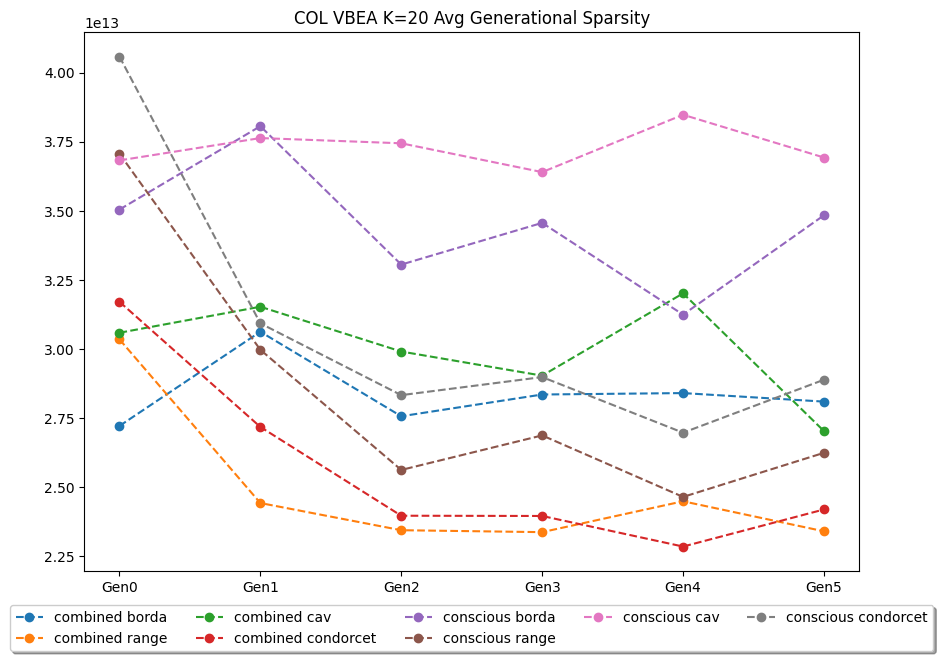

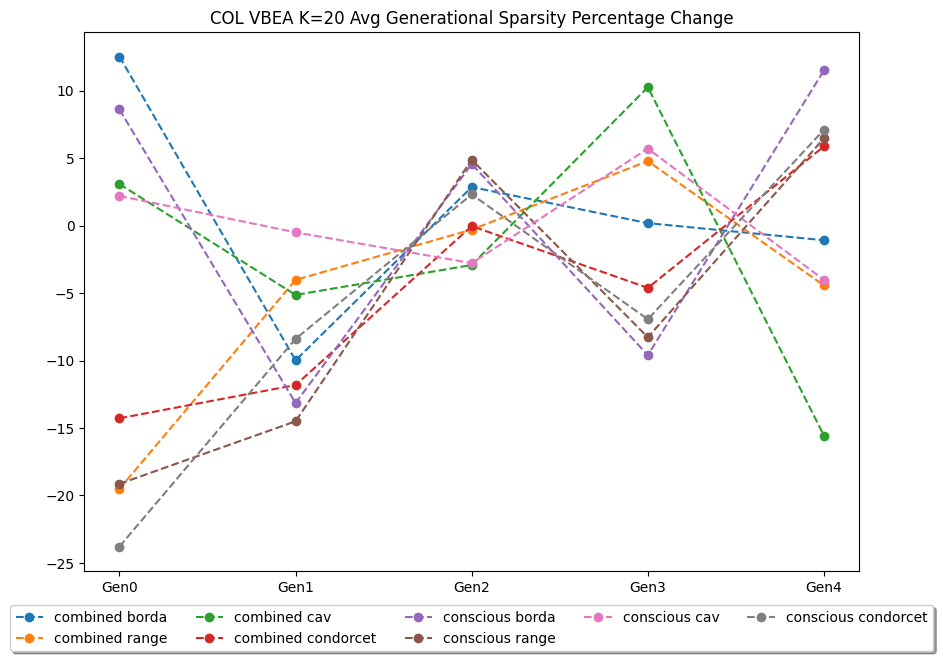

In [506]:
# fig, ax = plt.subplots()
# x = [0,1,2,3,4,5]
# x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
# plt.xticks(x,x_ticks)


# ax.plot(col_borda_com_20_spar, "--o", label="combined borda")
# ax.plot(col_range_com_20_spar, "--o", label="combined range")
# ax.plot(col_cav_com_20_spar, "--o", label="combined cav")
# ax.plot(col_condorcet_com_20_spar, "--o", label="combined condorcet")

# ax.plot(col_borda_con_20_spar, "--o", label="conscious borda")
# ax.plot(col_range_con_20_spar, "--o", label="conscious range")
# ax.plot(col_cav_con_20_spar, "--o", label="conscious cav")
# ax.plot(col_condorcet_con_20_spar, "--o", label="conscious condorcet")

## Apex

# ax.plot([1522045600000] * 6, label="RANDOM 1.00")

# ax.plot([5031614740000] * 6, label="RANDOM 0.5")

# ax.plot([74800836760] * 6, label="RANDOM 0.1")

# ax.plot([1033724000000] * 6, label="GREEDY 1.00")

# ax.plot([6254815969600] * 6, label="GREDDY 0.5")

# ax.plot([123636957560] * 6, label="GREDDY 0.1")


# fig.set_figwidth(10)
# fig.set_figheight(7)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
# plt.title("COL VBEA K=20 Avg Generational Sparsity")
# plt.savefig("col-avg-gen-spar.png", bbox_inches="tight")
# plt.show()

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(col_borda_com_20_spar_diff, "--o", label="combined borda")
ax.plot(col_range_com_20_spar_diff, "--o", label="combined range")
ax.plot(col_cav_com_20_spar_diff, "--o", label="combined cav")
ax.plot(col_condorcet_com_20_spar_diff, "--o", label="combined condorcet")

ax.plot(col_borda_con_20_spar_diff, "--o", label="conscious borda")
ax.plot(col_range_con_20_spar_diff, "--o", label="conscious range")
ax.plot(col_cav_con_20_spar_diff, "--o", label="conscious cav")
ax.plot(col_condorcet_con_20_spar_diff, "--o", label="conscious condorcet")


fig.set_figwidth(10)
fig.set_figheight(7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("COL VBEA K=20 Avg Generational Sparsity Percentage Change")
plt.savefig("col-avg-gen-spar-pc.png", bbox_inches="tight")
plt.show()

In [437]:
bay_borda_com_uncap_spar = avg_gen_spar(BAY_COMBINED_BORDA_UNCAP)

bay_borda_con_uncap_spar = avg_gen_spar(BAY_CONSCIOUS_BORDA_UNCAP)

col_borda_com_uncap_spar = avg_gen_spar(COL_COMBINED_BORDA_UNCAP)

col_borda_con_uncap_spar = avg_gen_spar(COL_CONSCIOUS_BORDA_UNCAP)

bay_borda_com_uncap_spar_diff = percentage_change(bay_borda_com_uncap_spar)

bay_borda_con_uncap_spar_diff = percentage_change(bay_borda_con_uncap_spar)

col_borda_com_uncap_spar_diff = percentage_change(col_borda_com_uncap_spar)

col_borda_con_uncap_spar_diff = percentage_change(col_borda_con_uncap_spar)

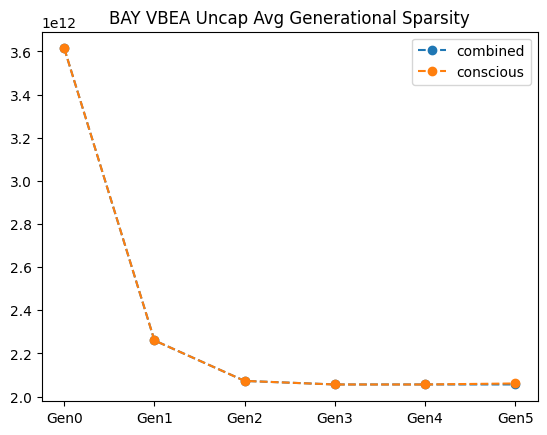

<Figure size 640x480 with 0 Axes>

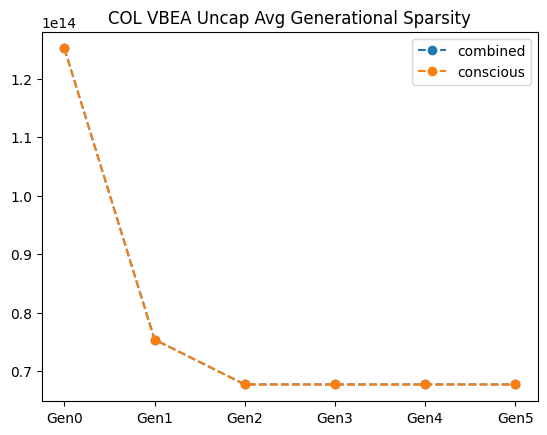

<Figure size 640x480 with 0 Axes>

In [440]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(bay_borda_com_uncap_spar, "--o", label="combined")

ax.plot(bay_borda_con_uncap_spar, "--o", label="conscious")


plt.title("BAY VBEA Uncap Avg Generational Sparsity")
plt.legend()
plt.show()
plt.savefig("bay-vbea-uncap-avg-gen-spar.png")

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(col_borda_com_uncap_spar, "--o", label="combined")

ax.plot(col_borda_con_uncap_spar, "--o", label="conscious")


plt.title("COL VBEA Uncap Avg Generational Sparsity")
plt.legend()
plt.show()
plt.savefig("col-vbea-uncap-avg-gen-spar.png")

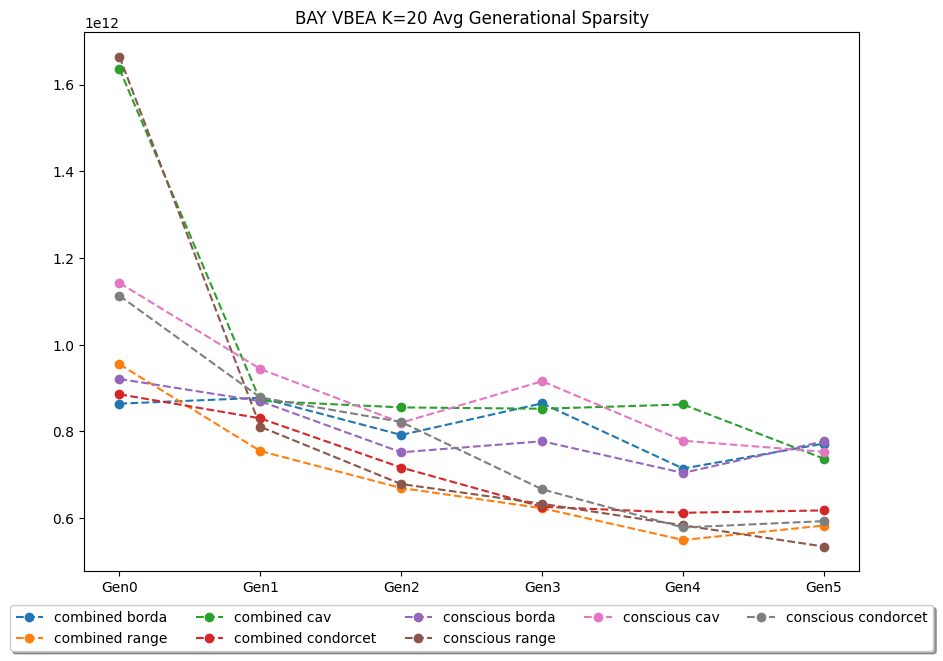

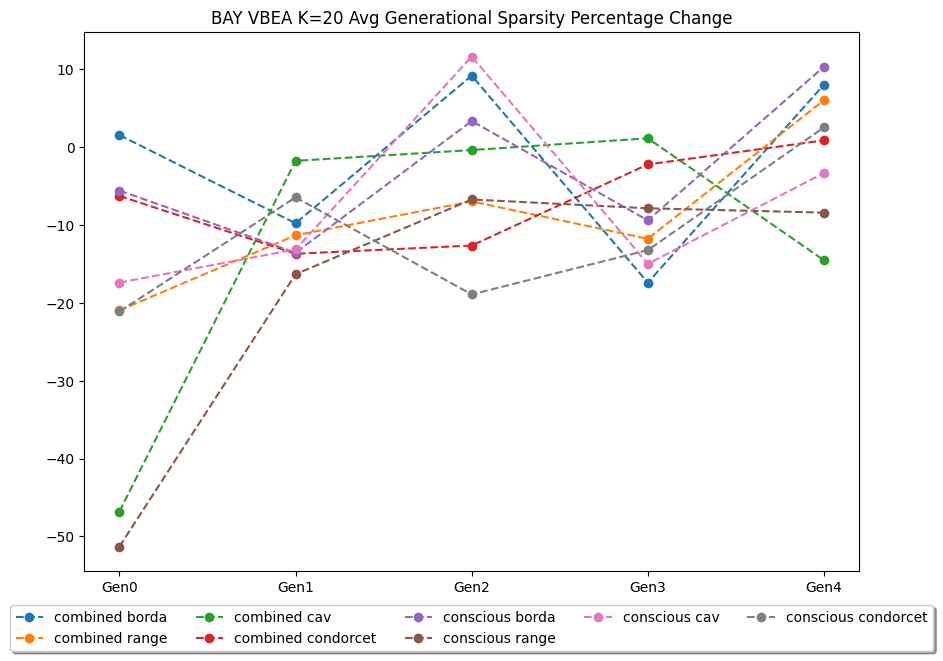

In [526]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(bay_borda_com_20_spar, "--o", label="combined borda")
ax.plot(bay_range_com_20_spar, "--o", label="combined range")
ax.plot(bay_cav_com_20_spar, "--o", label="combined cav")
ax.plot(bay_condorcet_com_20_spar, "--o", label="combined condorcet")

ax.plot(bay_borda_con_20_spar, "--o", label="conscious borda")
ax.plot(bay_range_con_20_spar, "--o", label="conscious range")
ax.plot(bay_cav_con_20_spar, "--o", label="conscious cav")
ax.plot(bay_condorcet_con_20_spar, "--o", label="conscious condorcet")


## Apex

# ax.plot([1572396000000] * 6, label="RANDOM 1.0")

# ax.plot([5031614740000] * 6, label="RANDOM 0.5")

# ax.plot([74800836760] * 6, label="RANDOM 0.1")


# ax.plot([1297948000000] * 6, label="GREEDY 1.0")

# ax.plot([6254815969600] * 6, label="GREEDY 0.5")

# ax.plot([74800836760] * 6, label="GREEDY 0.1")



fig.set_figwidth(10)
fig.set_figheight(7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("BAY VBEA K=20 Avg Generational Sparsity")
# plt.savefig("bay-avg-gen-spar.png", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(bay_borda_com_20_spar_diff, "--o", label="combined borda")
ax.plot(bay_range_com_20_spar_diff, "--o", label="combined range")
ax.plot(bay_cav_com_20_spar_diff, "--o", label="combined cav")
ax.plot(bay_condorcet_com_20_spar_diff, "--o", label="combined condorcet")

ax.plot(bay_borda_con_20_spar_diff, "--o", label="conscious borda")
ax.plot(bay_range_con_20_spar_diff, "--o", label="conscious range")
ax.plot(bay_cav_con_20_spar_diff, "--o", label="conscious cav")
ax.plot(bay_condorcet_con_20_spar_diff, "--o", label="conscious condorcet")



fig.set_figwidth(10)
fig.set_figheight(7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("BAY VBEA K=20 Avg Generational Sparsity Percentage Change")
plt.savefig("bay-avg-gen-spar-pc.png", bbox_inches="tight")
plt.show()

In [361]:
## HYPERVOLUME

# COL
col_borda_com_20_hv = avg_gen_hv(COL_COMBINED_BORDA_K_20)
col_range_com_20_hv = avg_gen_hv(COL_COMBINED_RANGE_K_20)
col_cav_com_20_hv = avg_gen_hv(COL_COMBINED_CAV_K_20)
col_condorcet_com_20_hv = avg_gen_hv(COL_COMBINED_CONDORCET_K_20)

col_borda_con_20_hv = avg_gen_hv(COL_CONSCIOUS_BORDA_K_20)
col_range_con_20_hv = avg_gen_hv(COL_CONSCIOUS_RANGE_K_20)
col_cav_con_20_hv = avg_gen_hv(COL_CONSCIOUS_CAV_K_20)
col_condorcet_con_20_hv = avg_gen_hv(COL_CONSCIOUS_CONDORCET_K_20)

# BAY
bay_borda_com_20_hv = avg_gen_hv(BAY_COMBINED_BORDA_K_20)
bay_range_com_20_hv = avg_gen_hv(BAY_COMBINED_RANGE_K_20)
bay_cav_com_20_hv = avg_gen_hv(BAY_COMBINED_CAV_K_20)
bay_condorcet_com_20_hv = avg_gen_hv(BAY_COMBINED_CONDORCET_K_20)

bay_borda_con_20_hv = avg_gen_hv(BAY_CONSCIOUS_BORDA_K_20)
bay_range_con_20_hv = avg_gen_hv(BAY_CONSCIOUS_RANGE_K_20)
bay_cav_con_20_hv = avg_gen_hv(BAY_CONSCIOUS_CAV_K_20)
bay_condorcet_con_20_hv = avg_gen_hv(BAY_CONSCIOUS_CONDORCET_K_20)


## PERCENTAGE CHANGE

# COL
col_borda_com_20_hv_diff = percentage_change(col_borda_com_20_hv)
col_range_com_20_hv_diff = percentage_change(col_range_com_20_hv)
col_cav_com_20_hv_diff = percentage_change(col_cav_com_20_hv)
col_condorcet_com_20_hv_diff = percentage_change(col_condorcet_com_20_hv)

col_borda_con_20_hv_diff = percentage_change(col_borda_con_20_hv)
col_range_con_20_hv_diff = percentage_change(col_range_con_20_hv)
col_cav_con_20_hv_diff = percentage_change(col_cav_con_20_hv)
col_condorcet_con_20_hv_diff = percentage_change(col_condorcet_con_20_hv)

# BAY
bay_borda_com_20_hv_diff = percentage_change(bay_borda_com_20_hv)
bay_range_com_20_hv_diff = percentage_change(bay_range_com_20_hv)
bay_cav_com_20_hv_diff = percentage_change(bay_cav_com_20_hv)
bay_condorcet_com_20_hv_diff = percentage_change(bay_condorcet_com_20_hv)

bay_borda_con_20_hv_diff = percentage_change(bay_borda_con_20_hv)
bay_range_con_20_hv_diff = percentage_change(bay_range_con_20_hv)
bay_cav_con_20_hv_diff = percentage_change(bay_cav_con_20_hv)
bay_condorcet_con_20_hv_diff = percentage_change(bay_condorcet_con_20_hv)

### Hypervolume

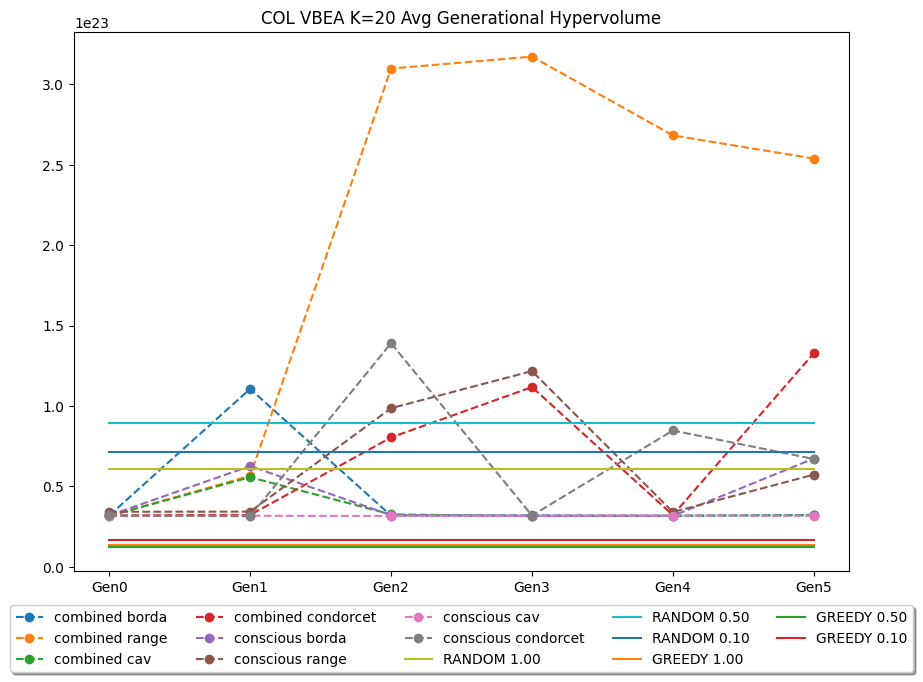

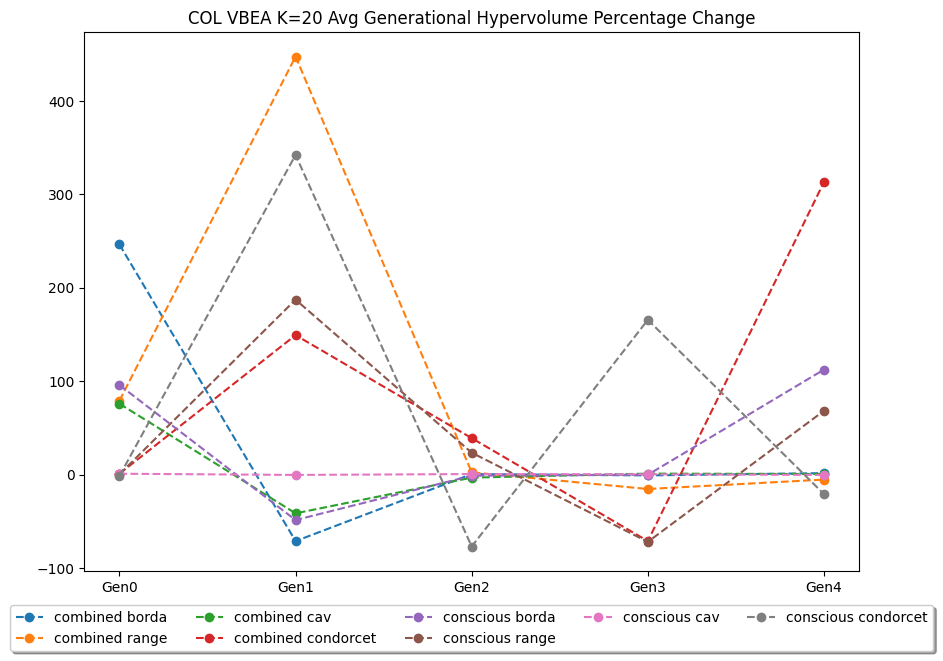

In [500]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(col_borda_com_20_hv, "--o", label="combined borda")
ax.plot(col_range_com_20_hv, "--o", label="combined range")
ax.plot(col_cav_com_20_hv, "--o", label="combined cav")
ax.plot(col_condorcet_com_20_hv, "--o", label="combined condorcet")

ax.plot(col_borda_con_20_hv, "--o", label="conscious borda")
ax.plot(col_range_con_20_hv, "--o", label="conscious range")
ax.plot(col_cav_con_20_hv, "--o", label="conscious cav")
ax.plot(col_condorcet_con_20_hv, "--o", label="conscious condorcet")

## Apex

ax.plot([60867004639053724254208] * 6, label="RANDOM 1.00")

ax.plot([89237694435255738433536] * 6, label="RANDOM 0.50")

ax.plot([71417809366564720345088] * 6, label="RANDOM 0.10")


ax.plot([13680773790826993025024] * 6, label="GREEDY 1.00")

ax.plot([12590530836540229156864] * 6, label="GREEDY 0.50")

ax.plot([16576593245694668570624] * 6, label="GREEDY 0.10")

fig.set_figwidth(10)
fig.set_figheight(7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("COL VBEA K=20 Avg Generational Hypervolume")
plt.savefig("col-avg-gen-hv(withapex).png", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(col_borda_com_20_hv_diff, "--o", label="combined borda")
ax.plot(col_range_com_20_hv_diff, "--o", label="combined range")
ax.plot(col_cav_com_20_hv_diff, "--o", label="combined cav")
ax.plot(col_condorcet_com_20_hv_diff, "--o", label="combined condorcet")

ax.plot(col_borda_con_20_hv_diff, "--o", label="conscious borda")
ax.plot(col_range_con_20_hv_diff, "--o", label="conscious range")
ax.plot(col_cav_con_20_hv_diff, "--o", label="conscious cav")
ax.plot(col_condorcet_con_20_hv_diff, "--o", label="conscious condorcet")


fig.set_figwidth(10)
fig.set_figheight(7)
plt.title("COL VBEA K=20 Avg Generational Hypervolume Percentage Change")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.savefig("col-avg-gen-hv-diff.png", bbox_inches="tight")
plt.show()

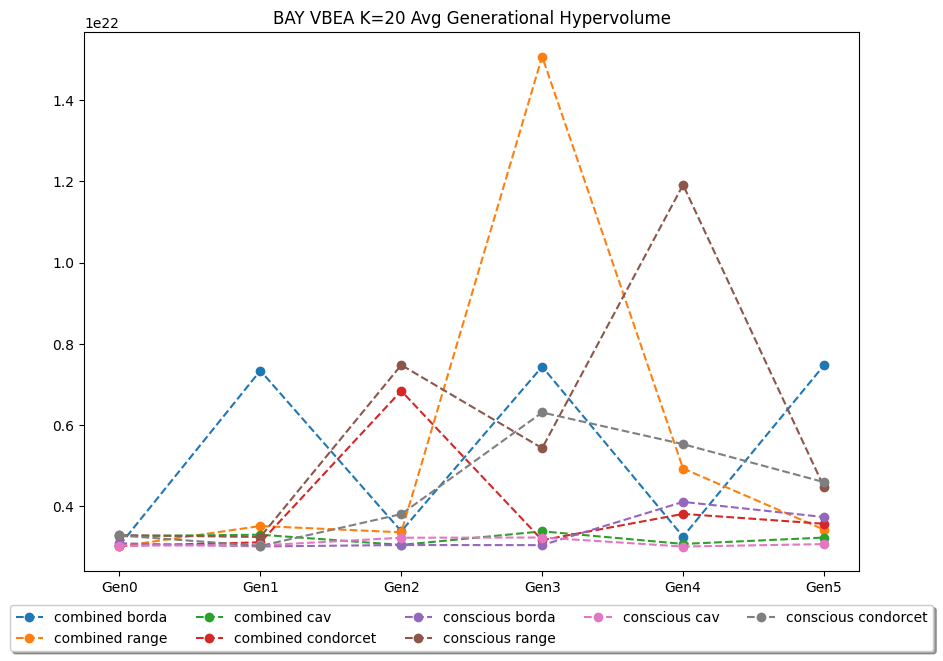

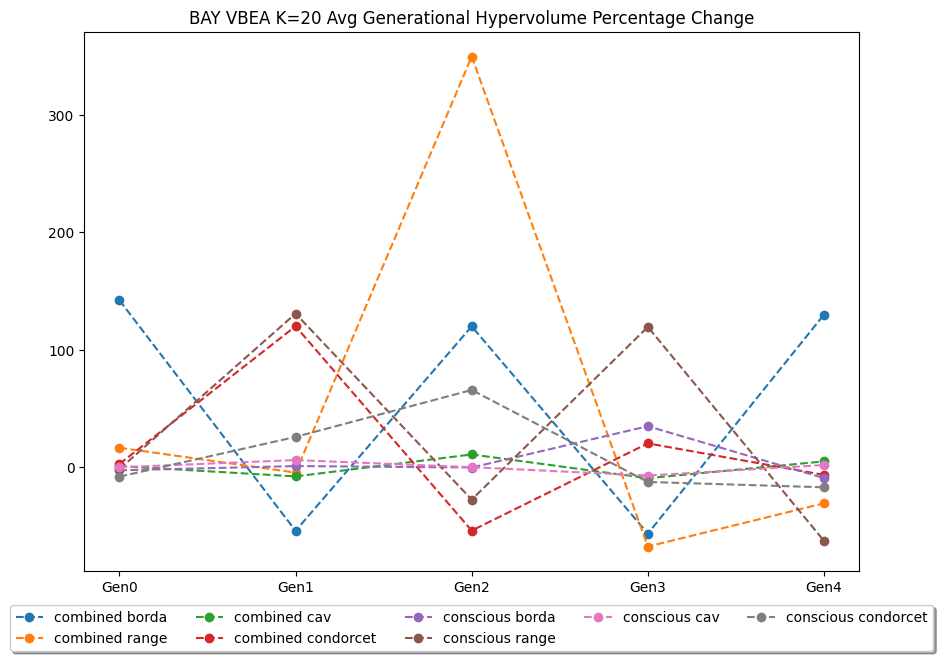

In [520]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(bay_borda_com_20_hv, "--o", label="combined borda")
ax.plot(bay_range_com_20_hv, "--o", label="combined range")
ax.plot(bay_cav_com_20_hv, "--o", label="combined cav")
ax.plot(bay_condorcet_com_20_hv, "--o", label="combined condorcet")

ax.plot(bay_borda_con_20_hv, "--o", label="conscious borda")
ax.plot(bay_range_con_20_hv, "--o", label="conscious range")
ax.plot(bay_cav_con_20_hv, "--o", label="conscious cav")
ax.plot(bay_condorcet_con_20_hv, "--o", label="conscious condorcet")

## Apex

# ax.plot([13680773790826993025024] * 6, label="RANDOM 1.00")

# ax.plot([12590530836540229156864] * 6, label="RANDOM 0.50")

# ax.plot([16576593245694668570624] * 6, label="RANDOM 0.10")


# ax.plot([9807841533919821299712] * 6, label="GREEDY 1.00")

# ax.plot([17274184943734896984064] * 6, label="GREEDY 0.50")

# ax.plot([25535888273496170561536] * 6, label="GREEDY 0.10")


fig.set_figwidth(10)
fig.set_figheight(7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("BAY VBEA K=20 Avg Generational Hypervolume")
plt.savefig("bay-avg-gen-hv.png", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(bay_borda_com_20_hv_diff, "--o", label="combined borda")
ax.plot(bay_range_com_20_hv_diff, "--o", label="combined range")
ax.plot(bay_cav_com_20_hv_diff, "--o", label="combined cav")
ax.plot(bay_condorcet_com_20_hv_diff, "--o", label="combined condorcet")

ax.plot(bay_borda_con_20_hv_diff, "--o", label="conscious borda")
ax.plot(bay_range_con_20_hv_diff, "--o", label="conscious range")
ax.plot(bay_cav_con_20_hv_diff, "--o", label="conscious cav")
ax.plot(bay_condorcet_con_20_hv_diff, "--o", label="conscious condorcet")


fig.set_figwidth(10)
fig.set_figheight(7)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.title("BAY VBEA K=20 Avg Generational Hypervolume Percentage Change")
plt.savefig("bay-avg-gen-hv-diff.png", bbox_inches="tight")
plt.show()

### Runtime

In [371]:
col_borda_com_20_t, col_borda_com_20_rst = gen_time(COL_COMBINED_BORDA_K_20) 
col_range_com_20_t, col_range_com_20_rst = gen_time(COL_COMBINED_RANGE_K_20) 
col_cav_com_20_t, col_cav_com_20_rst = gen_time(COL_COMBINED_CAV_K_20) 
col_condorcet_com_20_t, col_condorcet_com_20_rst = gen_time(COL_COMBINED_CONDORCET_K_20) 

col_borda_con_20_t, col_borda_con_20_rst = gen_time(COL_CONSCIOUS_BORDA_K_20) 
col_range_con_20_t, col_range_con_20_rst = gen_time(COL_CONSCIOUS_RANGE_K_20) 
col_cav_con_20_t, col_cav_con_20_rst = gen_time(COL_CONSCIOUS_CAV_K_20) 
col_condorcet_con_20_t, col_condorcet_con_20_rst = gen_time(COL_CONSCIOUS_CONDORCET_K_20) 

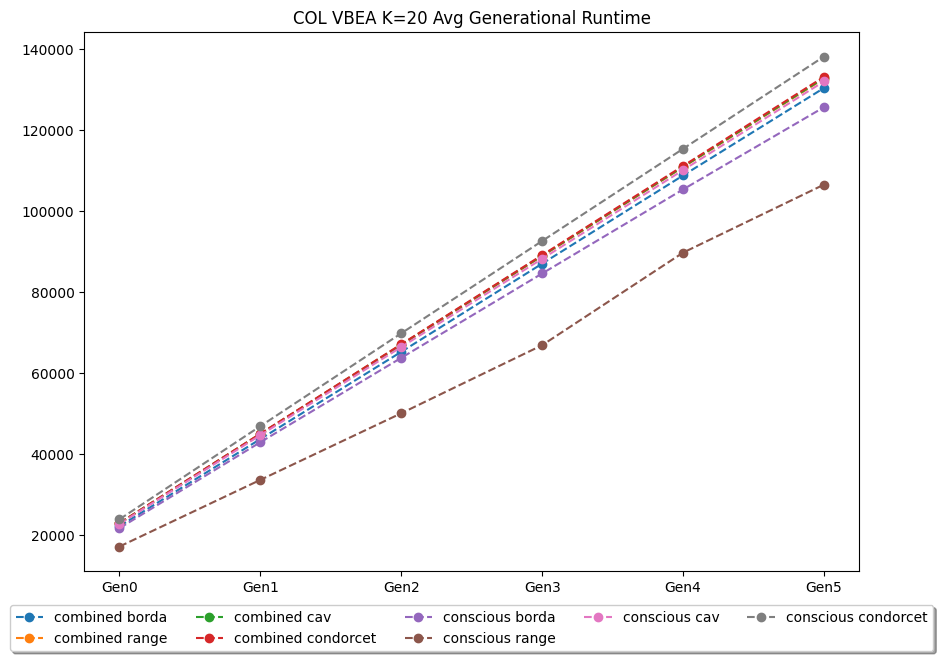

In [469]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

# ax.plot([300000] * 6, ":k", label="timelimit") 

ax.plot(col_borda_com_20_rst, "--o", label="combined borda")
ax.plot(col_range_com_20_rst, "--o", label="combined range")
ax.plot(col_cav_com_20_rst, "--o", label="combined cav")
ax.plot(col_condorcet_com_20_rst, "--o", label="combined condorcet")

ax.plot(col_borda_con_20_rst, "--o", label="conscious borda")
ax.plot(col_range_con_20_rst, "--o", label="conscious range")
ax.plot(col_cav_con_20_rst, "--o", label="conscious cav")
ax.plot(col_condorcet_con_20_rst, "--o", label="conscious condorcet")

## APEX

# ax.plot([3961.04] * 6, label="RANDOM 1.0")

# ax.plot([10880.84] * 6, label="RANDOM 0.5")

# ax.plot([115514.12] * 6, label="RANDOM 0.1")

# ax.plot([2444.8] * 6, label="GREEDY 1.0")

# ax.plot([5081.64] * 6, label="GREEDY 0.5")

# ax.plot([78511.04] * 6, label="GREEDY 0.1")

plt.title("COL VBEA K=20 Avg Generational Runtime")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.savefig("col-avg-gen-runtime.png", bbox_inches="tight")
plt.show()

# fig, ax = plt.subplots()
# x = [0,1,2,3,4,5]
# plt.xticks(x,x_ticks)


# x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
# ax.plot(COL_borda_com_rst, "--o", label="combined")
# ax.plot(COL_borda_con_rst, "--o", label="conscious")

# plt.title("DAO VBEA Uncap Ave Gen Runtime")
# plt.legend()
# fig.set_figwidth(10)
# fig.set_figheight(7)
# plt.show()

In [334]:
bay_borda_com_20_t, bay_borda_com_20_rst = gen_time(BAY_COMBINED_BORDA_K_20) 
bay_range_com_20_t, bay_range_com_20_rst = gen_time(BAY_COMBINED_RANGE_K_20) 
bay_cav_com_20_t, bay_cav_com_20_rst = gen_time(BAY_COMBINED_CAV_K_20) 
bay_condorcet_com_20_t, bay_condorcet_com_20_rst = gen_time(BAY_COMBINED_CONDORCET_K_20) 

bay_borda_con_20_t, bay_borda_con_20_rst = gen_time(BAY_CONSCIOUS_BORDA_K_20) 
bay_range_con_20_t, bay_range_con_20_rst = gen_time(BAY_CONSCIOUS_RANGE_K_20) 
bay_cav_con_20_t, bay_cav_con_20_rst = gen_time(BAY_CONSCIOUS_CAV_K_20) 
bay_condorcet_con_20_t, bay_condorcet_con_20_rst = gen_time(BAY_CONSCIOUS_CONDORCET_K_20) 

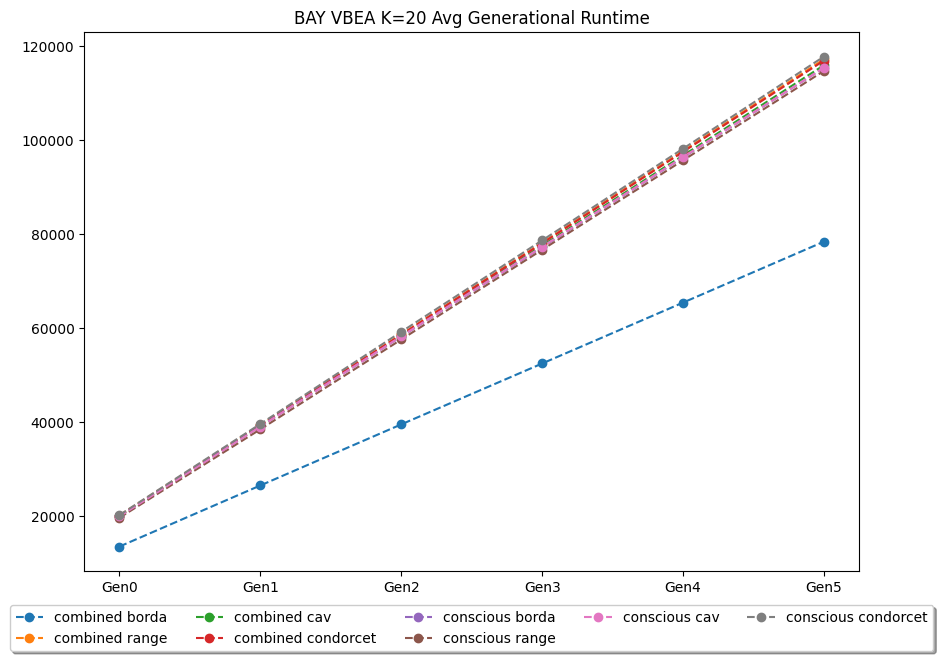

In [472]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(bay_borda_com_20_rst, "--o", label="combined borda")
ax.plot(bay_range_com_20_rst, "--o", label="combined range")
ax.plot(bay_cav_com_20_rst, "--o", label="combined cav")
ax.plot(bay_condorcet_com_20_rst, "--o", label="combined condorcet")

ax.plot(bay_borda_con_20_rst, "--o", label="conscious borda")
ax.plot(bay_range_con_20_rst, "--o", label="conscious range")
ax.plot(bay_cav_con_20_rst, "--o", label="conscious cav")
ax.plot(bay_condorcet_con_20_rst, "--o", label="conscious condorcet")

## APEX

# ax.plot([544.88] * 6, label="RANDOM 1.0")

# ax.plot([3203.88] * 6, label="RANDOM 0.5")

# ax.plot([73072.84] * 6, label="RANDOM 0.1")

# ax.plot([352.96] * 6, label="GREEDY 1.0")

# ax.plot([1423.96] * 6, label="GREEDY 0.5")

# ax.plot([33308.56] * 6, label="GREEDY 0.1")

plt.title("BAY VBEA K=20 Avg Generational Runtime")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.savefig("bay-avg-gen-runtime.png", bbox_inches="tight")
plt.show()

# fig, ax = plt.subplots()
# x = [0,1,2,3,4,5]
# plt.xticks(x,x_ticks)


# x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
# ax.plot(bay_borda_com_rst, "--o", label="combined")
# ax.plot(bay_borda_con_rst, "--o", label="conscious")

# plt.title("BAY VBEA Uncap Ave Gen Runtime")
# plt.legend()
# fig.set_figwidth(10)
# fig.set_figheight(7)
# plt.show()

### Front Size

In [258]:
col_com_borda_k_20_fs, col_com_borda_k_20_dist = avg_gen_front_size(COL_COMBINED_BORDA_K_20)
col_com_range_k_20_fs, col_com_range_k_20_dist = avg_gen_front_size(COL_COMBINED_RANGE_K_20)
col_com_cav_k_20_fs, col_com_cav_k_20_dist = avg_gen_front_size(COL_COMBINED_CAV_K_20)
col_com_condorcet_k_20_fs, col_com_condorcet_k_20_dist = avg_gen_front_size(COL_COMBINED_CONDORCET_K_20)

col_con_borda_k_20_fs, col_con_borda_k_20_dist = avg_gen_front_size(COL_CONSCIOUS_BORDA_K_20)
col_con_range_k_20_fs, col_con_range_k_20_dist = avg_gen_front_size(COL_CONSCIOUS_RANGE_K_20)
col_con_cav_k_20_fs, col_con_cav_k_20_dist = avg_gen_front_size(COL_CONSCIOUS_CAV_K_20)
col_con_condorcet_k_20_fs, col_con_condorcet_k_20_dist = avg_gen_front_size(COL_CONSCIOUS_CONDORCET_K_20)

bay_com_borda_k_20_fs, bay_com_borda_k_20_dist = avg_gen_front_size(BAY_COMBINED_BORDA_K_20)
bay_com_range_k_20_fs, bay_com_range_k_20_dist = avg_gen_front_size(BAY_COMBINED_RANGE_K_20)
bay_com_cav_k_20_fs, bay_com_cav_k_20_dist = avg_gen_front_size(BAY_COMBINED_CAV_K_20)
bay_com_condorcet_k_20_fs, bay_com_condorcet_k_20_dist = avg_gen_front_size(BAY_COMBINED_CONDORCET_K_20)

bay_con_borda_k_20_fs, bay_con_borda_k_20_dist = avg_gen_front_size(BAY_CONSCIOUS_BORDA_K_20)
bay_con_range_k_20_fs, bay_con_range_k_20_dist = avg_gen_front_size(BAY_CONSCIOUS_RANGE_K_20)
bay_con_cav_k_20_fs, bay_con_cav_k_20_dist = avg_gen_front_size(BAY_CONSCIOUS_CAV_K_20)
bay_con_condorcet_k_20_fs, bay_con_condorcet_k_20_dist = avg_gen_front_size(BAY_CONSCIOUS_CONDORCET_K_20)

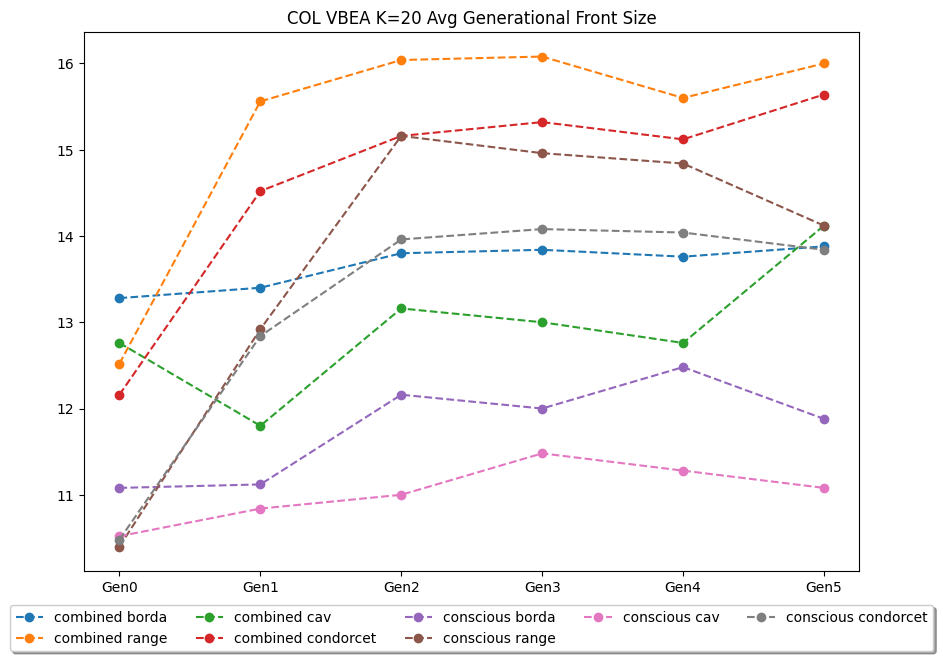

In [476]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

ax.plot(col_com_borda_k_20_fs, "--o", label="combined borda")
ax.plot(col_com_range_k_20_fs, "--o", label="combined range")
ax.plot(col_com_cav_k_20_fs, "--o", label="combined cav")
ax.plot(col_com_condorcet_k_20_fs, "--o", label="combined condorcet")


ax.plot(col_con_borda_k_20_fs, "--o", label="conscious borda")
ax.plot(col_con_range_k_20_fs, "--o", label="conscious range")
ax.plot(col_con_cav_k_20_fs, "--o", label="conscious cav")
ax.plot(col_con_condorcet_k_20_fs, "--o", label="conscious condorcet")


# ax.plot([1.12] * 6, label="RANDOM 1.0")
# ax.plot([2.64] * 6, label="RANDOM 0.5")
# ax.plot([37.32] * 6, label="RANDOM 0.1")

# ax.plot([1.08] * 6, label="GREEDY 1.0")
# ax.plot([1.64] * 6, label="GREEDY 0.5")
# ax.plot([37.32] * 6, label="GREEDY 0.1")

plt.title("COL VBEA K=20 Avg Generational Front Size")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.savefig("col-avg-gen-frontsize.png", bbox_inches="tight")
plt.show()


# fig, ax = plt.subplots()
# x = [0,1,2,3,4,5]
# x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
# plt.xticks(x,x_ticks)


# plt.title("BAY VBEA Uncap Avg Front Size")
# plt.legend()
# plt.show()

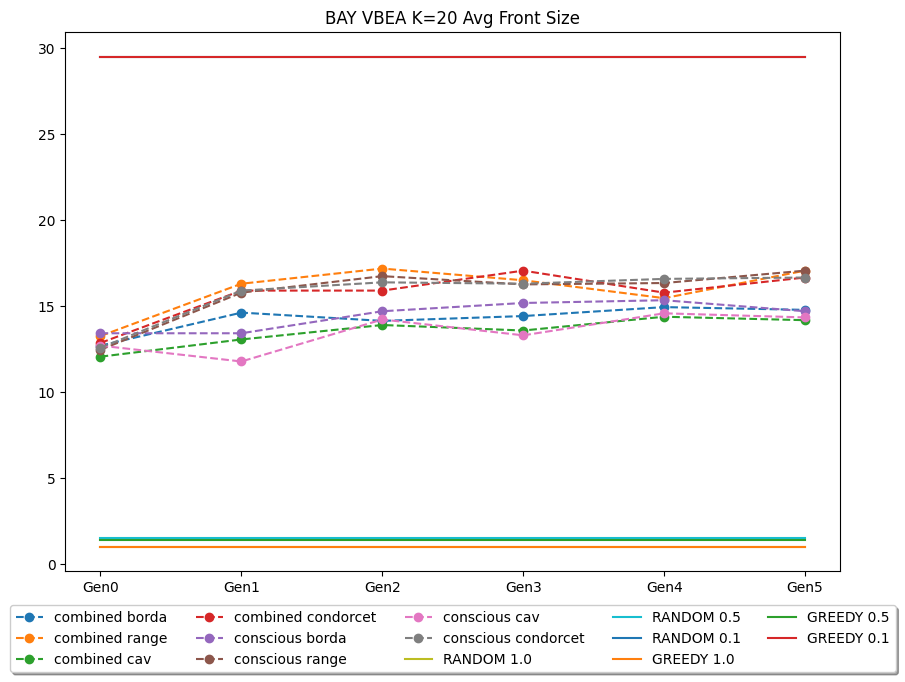

In [525]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

ax.plot(bay_com_borda_k_20_fs, "--o", label="combined borda")
ax.plot(bay_com_range_k_20_fs, "--o", label="combined range")
ax.plot(bay_com_cav_k_20_fs, "--o", label="combined cav")
ax.plot(bay_com_condorcet_k_20_fs, "--o", label="combined condorcet")


ax.plot(bay_con_borda_k_20_fs, "--o", label="conscious borda")
ax.plot(bay_con_range_k_20_fs, "--o", label="conscious range")
ax.plot(bay_con_cav_k_20_fs, "--o", label="conscious cav")
ax.plot(bay_con_condorcet_k_20_fs, "--o", label="conscious condorcet")

ax.plot([1.04] * 6, label="RANDOM 1.0")
ax.plot([1.52] * 6, label="RANDOM 0.5")
ax.plot([29.52] * 6, label="RANDOM 0.1")

ax.plot([1.04] * 6, label="GREEDY 1.0")
ax.plot([1.44] * 6, label="GREEDY 0.5")
ax.plot([29.52] * 6, label="GREEDY 0.1")

plt.title("BAY VBEA K=20 Avg Front Size")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.savefig("bau-avg-gen-frontsize(withapex).png", bbox_inches="tight")
plt.show()


## DAO

### Sparsity

In [485]:
dao_borda_com_50_spar = avg_gen_spar(DAO_COMBINED_BORDA_K_50)
dao_range_com_50_spar = avg_gen_spar(DAO_COMBINED_RANGE_K_50)
dao_cav_com_50_spar = avg_gen_spar(DAO_COMBINED_CAV_K_50)
dao_condorcet_com_50_spar = avg_gen_spar(DAO_COMBINED_CONDORCET_K_50)

dao_borda_con_50_spar = avg_gen_spar(DAO_CONSCIOUS_BORDA_K_50)
dao_range_con_50_spar = avg_gen_spar(DAO_CONSCIOUS_RANGE_K_50)
dao_cav_con_50_spar = avg_gen_spar(DAO_CONSCIOUS_CAV_K_50)
dao_condorcet_con_50_spar = avg_gen_spar(DAO_CONSCIOUS_CONDORCET_K_50)

In [486]:
dao_borda_com_50_spar_diff = percentage_change(dao_borda_com_50_spar)
dao_range_com_50_spar_diff = percentage_change(dao_range_com_50_spar)
dao_cav_com_50_spar_diff = percentage_change(dao_cav_com_50_spar)
dao_condorcet_com_50_spar_diff = percentage_change(dao_condorcet_com_50_spar)

dao_borda_con_50_spar_diff = percentage_change(dao_borda_con_50_spar)
dao_range_con_50_spar_diff = percentage_change(dao_range_con_50_spar)
dao_cav_con_50_spar_diff = percentage_change(dao_cav_con_50_spar)
dao_condorcet_con_50_spar_diff = percentage_change(dao_condorcet_con_50_spar)

In [433]:
dao_borda_com_uncap_spar = avg_gen_spar(DAO_COMBINED_BORDA_UNCAP)
dao_range_com_uncap_spar = avg_gen_spar(DAO_COMBINED_RANGE_UNCAP)
dao_cav_com_uncap_spar = avg_gen_spar(DAO_COMBINED_CAV_UNCAP)
dao_condorcet_com_uncap_spar = avg_gen_spar(DAO_COMBINED_CONDORCET_UNCAP)

dao_borda_con_uncap_spar = avg_gen_spar(DAO_CONSCIOUS_BORDA_UNCAP)
dao_range_con_uncap_spar = avg_gen_spar(DAO_CONSCIOUS_RANGE_UNCAP)
dao_cav_con_uncap_spar = avg_gen_spar(DAO_CONSCIOUS_CAV_UNCAP)
dao_condorcet_con_uncap_spar = avg_gen_spar(DAO_CONSCIOUS_CONDORCET_UNCAP)

In [434]:
dao_borda_com_uncap_spar_diff = percentage_change(dao_borda_com_uncap_spar)
dao_borda_con_uncap_spar_diff = percentage_change(dao_borda_con_uncap_spar)

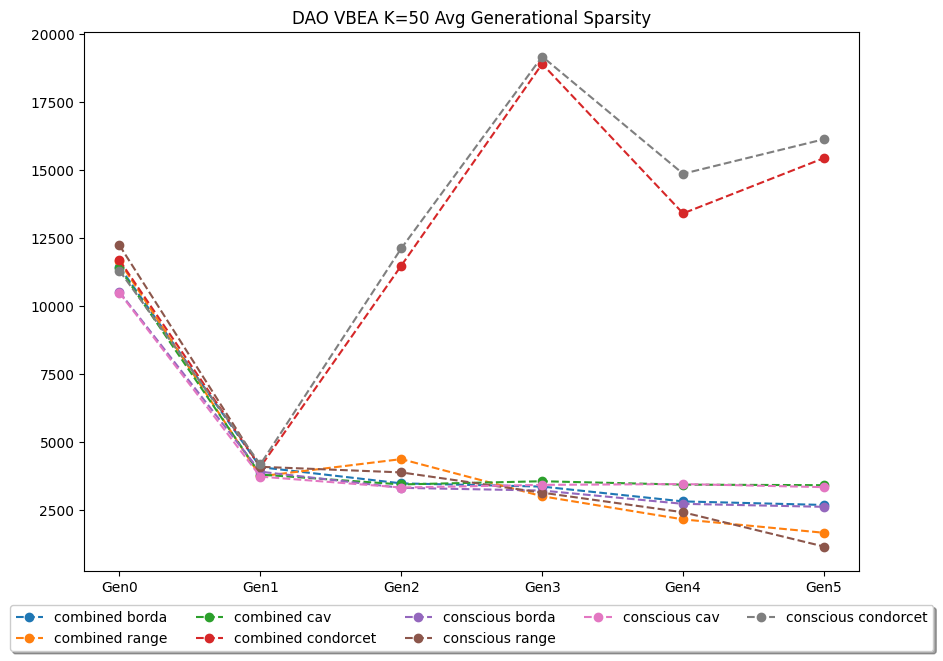

In [495]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(dao_borda_com_50_spar, "--o", label="combined borda")

ax.plot(dao_range_com_50_spar, "--o", label="combined range")

ax.plot(dao_cav_com_50_spar, "--o", label="combined cav")

ax.plot(dao_condorcet_com_50_spar, "--o", label="combined condorcet")

##

ax.plot(dao_borda_con_50_spar, "--o", label="conscious borda")

ax.plot(dao_range_con_50_spar, "--o", label="conscious range")

ax.plot(dao_cav_con_50_spar, "--o", label="conscious cav")

ax.plot(dao_condorcet_con_50_spar, "--o", label="conscious condorcet")

## Apex

# ax.plot([18478.293270828024] * 6, label="RANDOM 1.00")

# ax.plot([2332.961751464968] * 6, label="RANDOM 0.50")

# ax.plot([101.00408346496816] * 6, label="RANDOM 0.10")



# ax.plot([6712.830881019108] * 6, label="GREEDY 0.50")

# ax.plot([12.78247231847135] * 6, label="GREEDY 0.10")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.title("DAO VBEA K=50 Avg Generational Sparsity")
plt.savefig("dao-avg-gen-spar.png", bbox_inches="tight")
plt.show()


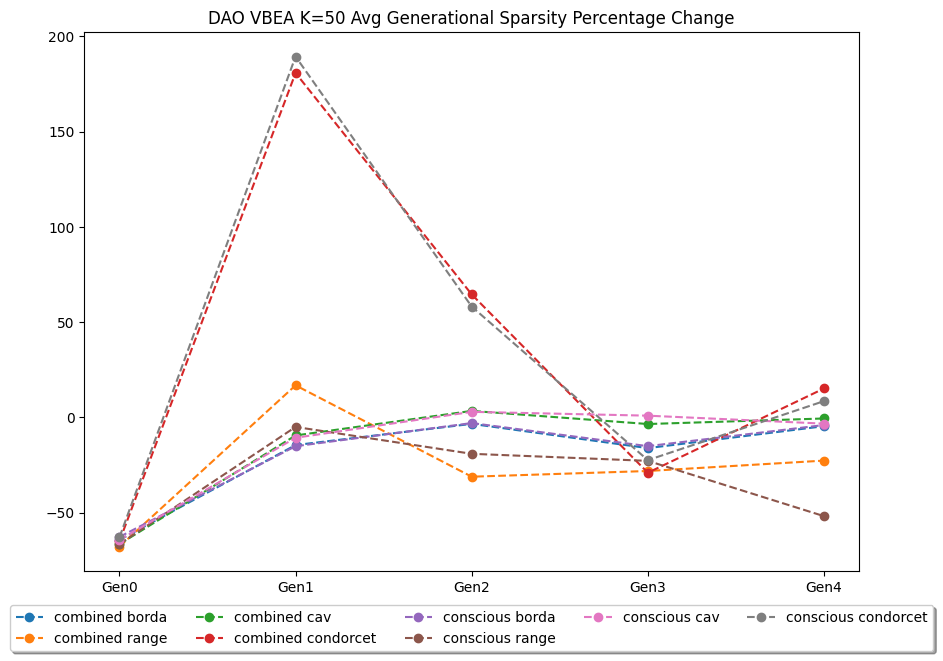

In [493]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(dao_borda_com_50_spar_diff, "--o", label="combined borda")

ax.plot(dao_range_com_50_spar_diff, "--o", label="combined range")

ax.plot(dao_cav_com_50_spar_diff, "--o", label="combined cav")

ax.plot(dao_condorcet_com_50_spar_diff, "--o", label="combined condorcet")

##

ax.plot(dao_borda_con_50_spar_diff, "--o", label="conscious borda")

ax.plot(dao_range_con_50_spar_diff, "--o", label="conscious range")

ax.plot(dao_cav_con_50_spar_diff, "--o", label="conscious cav")

ax.plot(dao_condorcet_con_50_spar_diff, "--o", label="conscious condorcet")




ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.title("DAO VBEA K=50 Avg Generational Sparsity Percentage Change")
plt.savefig("dao-avg-gen-spar-diff.png", bbox_inches="tight")
plt.show()


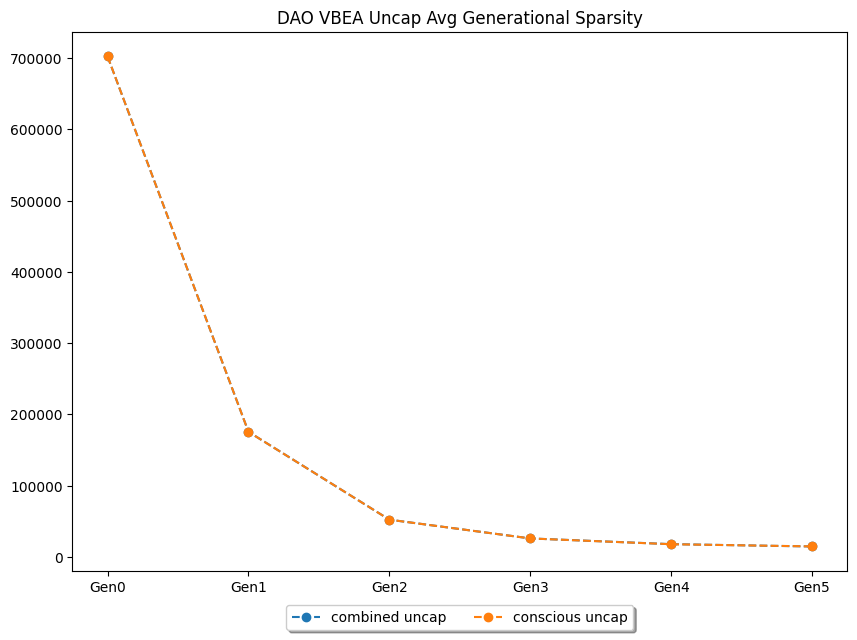

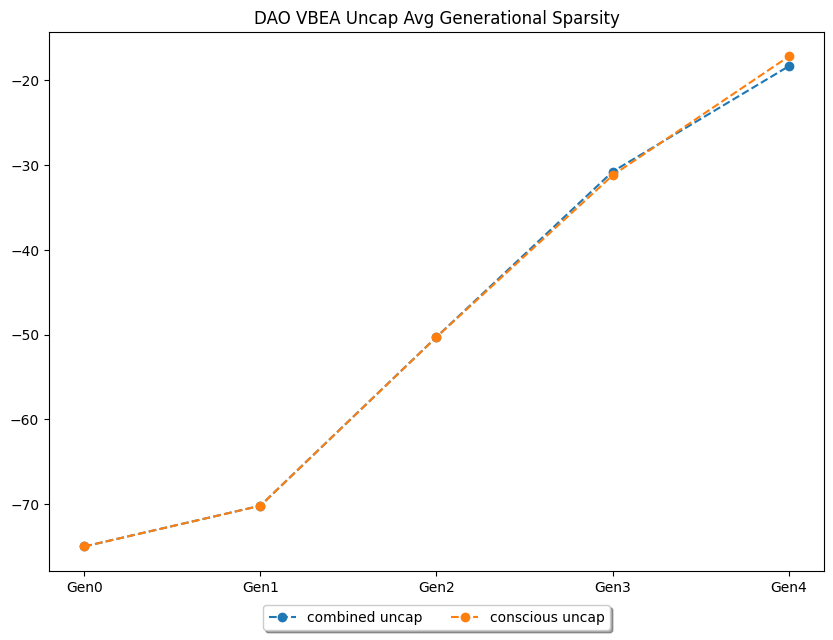

In [435]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(dao_borda_com_uncap_spar, "--o", label="combined uncap")
##
ax.plot(dao_borda_con_uncap_spar, "--o", label="conscious uncap")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

fig.set_figwidth(10)
fig.set_figheight(7)
plt.title("DAO VBEA Uncap Avg Generational Sparsity")
plt.savefig("DAO-VBEA-uncap-avg-gen-spar.png")
plt.show()

# No discernable difference, bottoms out around 14800

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(dao_borda_com_uncap_spar_diff, "--o", label="combined uncap")
##
ax.plot(dao_borda_con_uncap_spar_diff, "--o", label="conscious uncap")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

fig.set_figwidth(10)
fig.set_figheight(7)
plt.title("DAO VBEA Uncap Avg Generational Sparsity")
plt.savefig("DAO-VBEA-uncap-avg-gen-spar_diff.png")
plt.show()

In [71]:
# not really needed

dao_borda_com_50_gen0_spar_dist = DAO_COMBINED_BORDA_K_50["gen0-sparsity"].tolist() 
dao_range_com_50_gen0_spar_dist = DAO_COMBINED_RANGE_K_50["gen0-sparsity"].tolist() 
dao_cav_com_50_gen0_spar_dist = DAO_COMBINED_CAV_K_50["gen0-sparsity"].tolist() 
dao_condorcet_com_50_gen0_spar_dist = DAO_COMBINED_CONDORCET_K_50["gen0-sparsity"].tolist() 

dao_borda_com_50_gen0_spar_dist = DAO_CONSCIOUS_BORDA_K_50["gen0-sparsity"].tolist() 
dao_range_com_50_gen0_spar_dist = DAO_CONSCIOUS_RANGE_K_50["gen0-sparsity"].tolist() 
dao_cav_com_50_gen0_spar_dist = DAO_CONSCIOUS_CAV_K_50["gen0-sparsity"].tolist() 
dao_condorcet_com_50_gen0_spar_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen0-sparsity"].tolist() 


dao_borda_com_50_gen1_spar_dist = DAO_COMBINED_BORDA_K_50["gen1-sparsity"].tolist() 
dao_range_com_50_gen1_spar_dist = DAO_COMBINED_RANGE_K_50["gen1-sparsity"].tolist() 
dao_cav_com_50_gen1_spar_dist = DAO_COMBINED_CAV_K_50["gen1-sparsity"].tolist() 
dao_condorcet_com_50_gen1_spar_dist = DAO_COMBINED_CONDORCET_K_50["gen1-sparsity"].tolist() 

dao_borda_com_50_gen1_spar_dist = DAO_CONSCIOUS_BORDA_K_50["gen1-sparsity"].tolist() 
dao_range_com_50_gen1_spar_dist = DAO_CONSCIOUS_RANGE_K_50["gen1-sparsity"].tolist() 
dao_cav_com_50_gen1_spar_dist = DAO_CONSCIOUS_CAV_K_50["gen1-sparsity"].tolist() 
dao_condorcet_com_50_gen1_spar_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen1-sparsity"].tolist() 


dao_borda_com_50_gen2_spar_dist = DAO_COMBINED_BORDA_K_50["gen2-sparsity"].tolist() 
dao_range_com_50_gen2_spar_dist = DAO_COMBINED_RANGE_K_50["gen2-sparsity"].tolist() 
dao_cav_com_50_gen2_spar_dist = DAO_COMBINED_CAV_K_50["gen2-sparsity"].tolist() 
dao_condorcet_com_50_gen2_spar_dist = DAO_COMBINED_CONDORCET_K_50["gen2-sparsity"].tolist() 

dao_borda_com_50_gen2_spar_dist = DAO_CONSCIOUS_BORDA_K_50["gen2-sparsity"].tolist() 
dao_range_com_50_gen2_spar_dist = DAO_CONSCIOUS_RANGE_K_50["gen2-sparsity"].tolist() 
dao_cav_com_50_gen2_spar_dist = DAO_CONSCIOUS_CAV_K_50["gen2-sparsity"].tolist() 
dao_condorcet_com_50_gen2_spar_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen2-sparsity"].tolist() 


dao_borda_com_50_gen3_spar_dist = DAO_COMBINED_BORDA_K_50["gen3-sparsity"].tolist() 
dao_range_com_50_gen3_spar_dist = DAO_COMBINED_RANGE_K_50["gen3-sparsity"].tolist() 
dao_cav_com_50_gen3_spar_dist = DAO_COMBINED_CAV_K_50["gen3-sparsity"].tolist() 
dao_condorcet_com_50_gen3_spar_dist = DAO_COMBINED_CONDORCET_K_50["gen3-sparsity"].tolist() 

dao_borda_com_50_gen3_spar_dist = DAO_CONSCIOUS_BORDA_K_50["gen3-sparsity"].tolist() 
dao_range_com_50_gen3_spar_dist = DAO_CONSCIOUS_RANGE_K_50["gen3-sparsity"].tolist() 
dao_cav_com_50_gen3_spar_dist = DAO_CONSCIOUS_CAV_K_50["gen3-sparsity"].tolist() 
dao_condorcet_com_50_gen3_spar_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen3-sparsity"].tolist() 


dao_borda_com_50_gen4_spar_dist = DAO_COMBINED_BORDA_K_50["gen4-sparsity"].tolist() 
dao_range_com_50_gen4_spar_dist = DAO_COMBINED_RANGE_K_50["gen4-sparsity"].tolist() 
dao_cav_com_50_gen4_spar_dist = DAO_COMBINED_CAV_K_50["gen4-sparsity"].tolist() 
dao_condorcet_com_50_gen4_spar_dist = DAO_COMBINED_CONDORCET_K_50["gen4-sparsity"].tolist() 

dao_borda_com_50_gen4_spar_dist = DAO_CONSCIOUS_BORDA_K_50["gen4-sparsity"].tolist() 
dao_range_com_50_gen4_spar_dist = DAO_CONSCIOUS_RANGE_K_50["gen4-sparsity"].tolist() 
dao_cav_com_50_gen4_spar_dist = DAO_CONSCIOUS_CAV_K_50["gen4-sparsity"].tolist() 
dao_condorcet_com_50_gen4_spar_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen4-sparsity"].tolist() 


dao_borda_com_50_gen5_spar_dist = DAO_COMBINED_BORDA_K_50["gen5-sparsity"].tolist() 
dao_range_com_50_gen5_spar_dist = DAO_COMBINED_RANGE_K_50["gen5-sparsity"].tolist() 
dao_cav_com_50_gen5_spar_dist = DAO_COMBINED_CAV_K_50["gen5-sparsity"].tolist() 
dao_condorcet_com_50_gen5_spar_dist = DAO_COMBINED_CONDORCET_K_50["gen5-sparsity"].tolist() 

dao_borda_com_50_gen5_spar_dist = DAO_CONSCIOUS_BORDA_K_50["gen5-sparsity"].tolist() 
dao_range_com_50_gen5_spar_dist = DAO_CONSCIOUS_RANGE_K_50["gen5-sparsity"].tolist() 
dao_cav_com_50_gen5_spar_dist = DAO_CONSCIOUS_CAV_K_50["gen5-sparsity"].tolist() 
dao_condorcet_com_50_gen5_spar_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen5-sparsity"].tolist() 

### Hypervolume

In [246]:
dao_borda_com_50_hv = avg_gen_hv(DAO_COMBINED_BORDA_K_50)
dao_range_com_50_hv = avg_gen_hv(DAO_COMBINED_RANGE_K_50)
dao_cav_com_50_hv = avg_gen_hv(DAO_COMBINED_CAV_K_50)
dao_condorcet_com_50_hv = avg_gen_hv(DAO_COMBINED_CONDORCET_K_50)

dao_borda_con_50_hv = avg_gen_hv(DAO_CONSCIOUS_BORDA_K_50)
dao_range_con_50_hv = avg_gen_hv(DAO_CONSCIOUS_RANGE_K_50)
dao_cav_con_50_hv = avg_gen_hv(DAO_CONSCIOUS_CAV_K_50)
dao_condorcet_con_50_hv = avg_gen_hv(DAO_CONSCIOUS_CONDORCET_K_50)

dao_borda_com_uncap_hv = avg_gen_hv(DAO_COMBINED_BORDA_UNCAP)
dao_range_com_uncap_hv = avg_gen_hv(DAO_COMBINED_RANGE_UNCAP)
dao_cav_com_uncap_hv = avg_gen_hv(DAO_COMBINED_CAV_UNCAP)
dao_condorcet_com_uncap_hv = avg_gen_hv(DAO_COMBINED_CONDORCET_UNCAP)

dao_borda_con_uncap_hv = avg_gen_hv(DAO_CONSCIOUS_BORDA_UNCAP)
dao_range_con_uncap_hv = avg_gen_hv(DAO_CONSCIOUS_RANGE_UNCAP)
dao_cav_con_uncap_hv = avg_gen_hv(DAO_CONSCIOUS_CAV_UNCAP)
dao_condorcet_con_uncap_hv = avg_gen_hv(DAO_CONSCIOUS_CONDORCET_UNCAP)

In [247]:
dao_borda_com_50_hv_diff = percentage_change(dao_borda_com_50_hv)
dao_range_com_50_hv_diff = percentage_change(dao_range_com_50_hv)
dao_cav_com_50_hv_diff = percentage_change(dao_cav_com_50_hv)
dao_condorcet_com_50_hv_diff = percentage_change(dao_condorcet_com_50_hv)

dao_borda_con_50_hv_diff = percentage_change(dao_borda_con_50_hv)
dao_range_con_50_hv_diff = percentage_change(dao_range_con_50_hv)
dao_cav_con_50_hv_diff = percentage_change(dao_cav_con_50_hv)
dao_condorcet_con_50_hv_diff = percentage_change(dao_condorcet_con_50_hv)

dao_borda_com_uncap_hv_diff = percentage_change(dao_borda_com_uncap_hv)
dao_range_com_uncap_hv_diff = percentage_change(dao_range_com_uncap_hv)
dao_cav_com_uncap_hv_diff = percentage_change(dao_cav_com_uncap_hv)
dao_condorcet_com_uncap_hv_diff = percentage_change(dao_condorcet_com_uncap_hv)

dao_borda_con_uncap_hv_diff = percentage_change(dao_borda_con_uncap_hv)
dao_range_con_uncap_hv_diff = percentage_change(dao_range_con_uncap_hv)
dao_cav_con_uncap_hv_diff = percentage_change(dao_cav_con_uncap_hv)
dao_condorcet_con_uncap_hv_diff = percentage_change(dao_condorcet_con_uncap_hv)

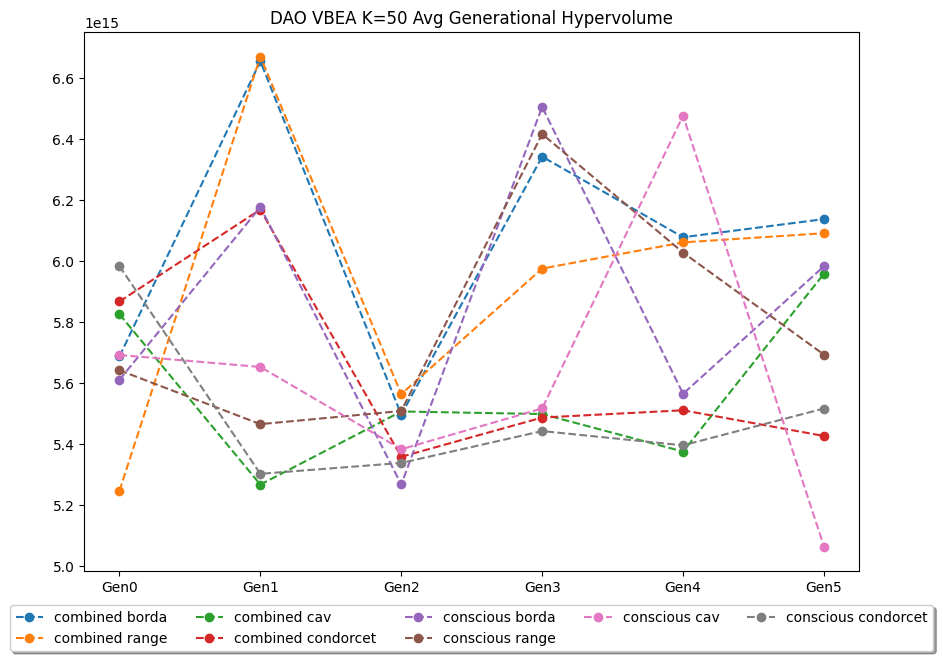

In [509]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(dao_borda_com_50_hv, "--o", label="combined borda")

ax.plot(dao_range_com_50_hv, "--o", label="combined range")

ax.plot(dao_cav_com_50_hv, "--o", label="combined cav")

ax.plot(dao_condorcet_com_50_hv, "--o", label="combined condorcet")

##

ax.plot(dao_borda_con_50_hv, "--o", label="conscious borda")

ax.plot(dao_range_con_50_hv, "--o", label="conscious range")

ax.plot(dao_cav_con_50_hv, "--o", label="conscious cav")

ax.plot(dao_condorcet_con_50_hv, "--o", label="conscious condorcet")

## Apex

# ax.plot([21143816191747304] * 6, label="RANDOM 1.00")

# ax.plot([13415019335135420] * 6, label="RANDOM 0.50")

# ax.plot([1274286503738316] * 6, label="RANDOM 0.10")


# ax.plot([6914615889574105] * 6, label="GREEDY 1.00")

# ax.plot([6747776708914840] * 6, label="GREEDY 0.50")

# ax.plot([6991136263421972] * 6, label="GREEDY 0.10")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.title("DAO VBEA K=50 Avg Generational Hypervolume")
plt.savefig("dao-avg-gen-hv.png", bbox_inches="tight")
plt.show()

# fig, ax = plt.subplots()
# x = [0,1,2,3,4,5]
# x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
# plt.xticks(x,x_ticks)

# ax.plot(dao_borda_com_uncap_hv, "--or", label="combined uncap")

# ax.plot(dao_borda_con_uncap_hv, "--ob", label="conscious uncap") 

# ax.legend()
# fig.set_figwidth(10)
# fig.set_figheight(7)

# plt.title("DAO VBEA Uncap Avg Generational Hypervolume")
# plt.show()

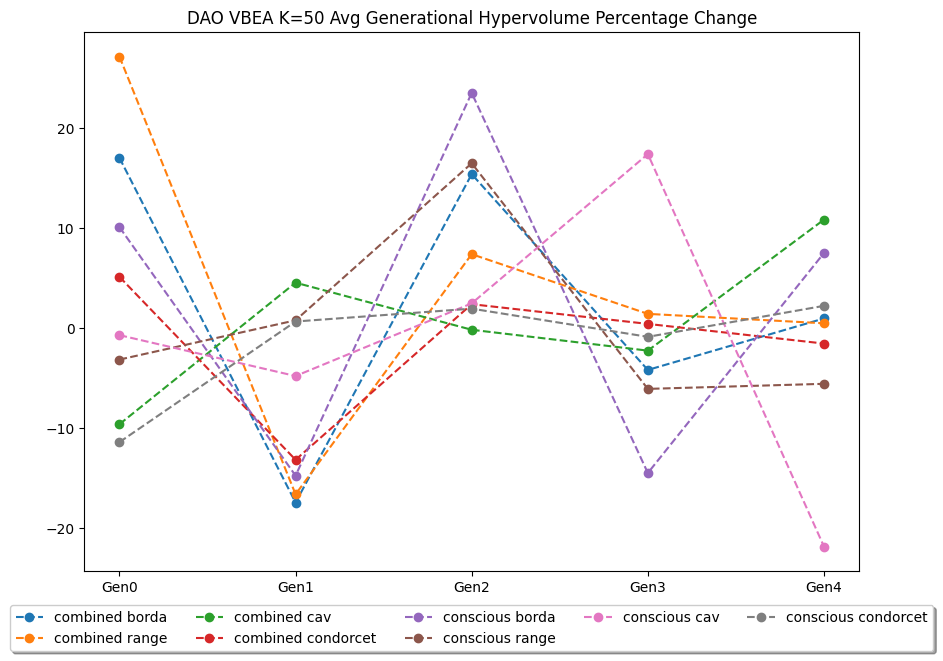

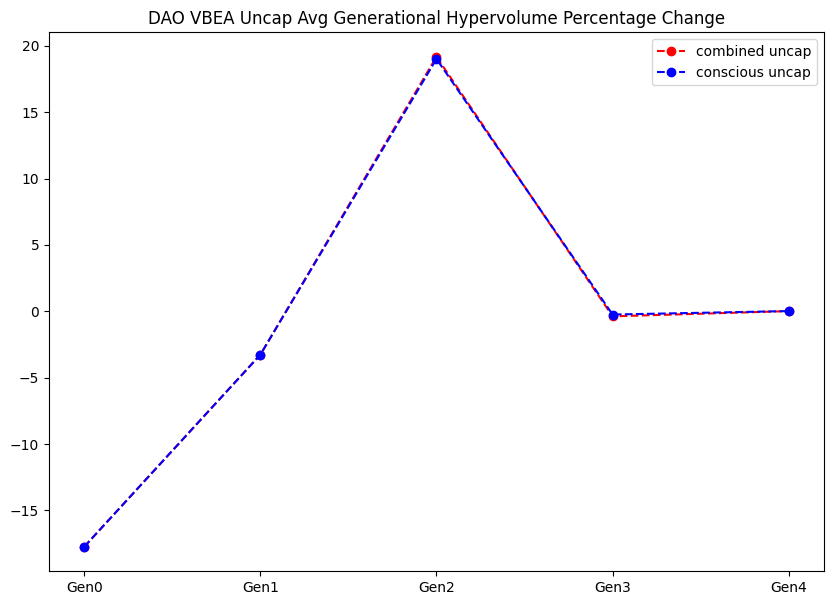

In [524]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


ax.plot(dao_borda_com_50_hv_diff, "--o", label="combined borda")

ax.plot(dao_range_com_50_hv_diff, "--o", label="combined range")

ax.plot(dao_cav_com_50_hv_diff, "--o", label="combined cav")

ax.plot(dao_condorcet_com_50_hv_diff, "--o", label="combined condorcet")

##

ax.plot(dao_borda_con_50_hv_diff, "--o", label="conscious borda")

ax.plot(dao_range_con_50_hv_diff, "--o", label="conscious range")

ax.plot(dao_cav_con_50_hv_diff, "--o", label="conscious cav")

ax.plot(dao_condorcet_con_50_hv_diff, "--o", label="conscious condorcet")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.title("DAO VBEA K=50 Avg Generational Hypervolume Percentage Change")
plt.savefig("dao-avg-gen-hv-pc.png")

plt.show()

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

ax.plot(dao_borda_com_uncap_hv_diff, "--or", label="combined uncap")

ax.plot(dao_borda_con_uncap_hv_diff, "--ob", label="conscious uncap") 

ax.legend()
fig.set_figwidth(10)
fig.set_figheight(7)
# plt.savefig("dao-avg-gen-hv-pc.png")

plt.title("DAO VBEA Uncap Avg Generational Hypervolume Percentage Change")
plt.show()

### Runtime

In [413]:
dao_borda_com_t, dao_borda_com_rst = gen_time(DAO_COMBINED_BORDA_UNCAP)
dao_borda_con_t, dao_borda_con_rst = gen_time(DAO_CONSCIOUS_BORDA_UNCAP)

In [414]:
dao_borda_com_50_t, dao_borda_com_50_rst = gen_time(DAO_COMBINED_BORDA_K_50) 
dao_range_com_50_t, dao_range_com_50_rst = gen_time(DAO_COMBINED_RANGE_K_50) 
dao_cav_com_50_t, dao_cav_com_50_rst = gen_time(DAO_COMBINED_CAV_K_50) 
dao_condorcet_com_50_t, dao_condorcet_com_50_rst = gen_time(DAO_COMBINED_CONDORCET_K_50) 

dao_borda_con_50_t, dao_borda_con_50_rst = gen_time(DAO_CONSCIOUS_BORDA_K_50) 
dao_range_con_50_t, dao_range_con_50_rst = gen_time(DAO_CONSCIOUS_RANGE_K_50) 
dao_cav_con_50_t, dao_cav_con_50_rst = gen_time(DAO_CONSCIOUS_CAV_K_50) 
dao_condorcet_con_50_t, dao_condorcet_con_50_rst = gen_time(DAO_CONSCIOUS_CONDORCET_K_50) 

In [162]:
dao_borda_com_50_ge0_t_dist = DAO_COMBINED_BORDA_K_50["gen0-time"].tolist()
dao_range_com_50_ge0_t_dist = DAO_COMBINED_RANGE_K_50["gen0-time"].tolist()
dao_cav_com_50_ge0_t_dist = DAO_COMBINED_CAV_K_50["gen0-time"].tolist()
dao_condorcet_com_50_ge0_t_dist = DAO_COMBINED_CONDORCET_K_50["gen0-time"].tolist()

dao_borda_con_50_ge0_t_dist = DAO_CONSCIOUS_BORDA_K_50["gen0-time"].tolist()
dao_range_con_50_ge0_t_dist = DAO_CONSCIOUS_RANGE_K_50["gen0-time"].tolist()
dao_cav_con_50_ge0_t_dist = DAO_CONSCIOUS_CAV_K_50["gen0-time"].tolist()
dao_condorcet_con_50_ge0_t_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen0-time"].tolist()

###

dao_borda_com_50_gen1_t_dist = DAO_COMBINED_BORDA_K_50["gen1-time"].tolist()
dao_range_com_50_gen1_t_dist = DAO_COMBINED_RANGE_K_50["gen1-time"].tolist()
dao_cav_com_50_gen1_t_dist = DAO_COMBINED_CAV_K_50["gen1-time"].tolist()
dao_condorcet_com_50_gen1_t_dist = DAO_COMBINED_CONDORCET_K_50["gen1-time"].tolist()

dao_borda_con_50_gen1_t_dist = DAO_CONSCIOUS_BORDA_K_50["gen1-time"].tolist()
dao_range_con_50_gen1_t_dist = DAO_CONSCIOUS_RANGE_K_50["gen1-time"].tolist()
dao_cav_con_50_gen1_t_dist = DAO_CONSCIOUS_CAV_K_50["gen1-time"].tolist()
dao_condorcet_con_50_gen1_t_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen1-time"].tolist()

###

dao_borda_com_50_gen2_t_dist = DAO_COMBINED_BORDA_K_50["gen2-time"].tolist()
dao_range_com_50_gen2_t_dist = DAO_COMBINED_RANGE_K_50["gen2-time"].tolist()
dao_cav_com_50_gen2_t_dist = DAO_COMBINED_CAV_K_50["gen2-time"].tolist()
dao_condorcet_com_50_gen2_t_dist = DAO_COMBINED_CONDORCET_K_50["gen2-time"].tolist()

dao_borda_con_50_gen2_t_dist = DAO_CONSCIOUS_BORDA_K_50["gen2-time"].tolist()
dao_range_con_50_gen2_t_dist = DAO_CONSCIOUS_RANGE_K_50["gen2-time"].tolist()
dao_cav_con_50_gen2_t_dist = DAO_CONSCIOUS_CAV_K_50["gen2-time"].tolist()
dao_condorcet_con_50_gen2_t_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen2-time"].tolist()

###

dao_borda_com_50_gen3_t_dist = DAO_COMBINED_BORDA_K_50["gen3-time"].tolist()
dao_range_com_50_gen3_t_dist = DAO_COMBINED_RANGE_K_50["gen3-time"].tolist()
dao_cav_com_50_gen3_t_dist = DAO_COMBINED_CAV_K_50["gen3-time"].tolist()
dao_condorcet_com_50_gen3_t_dist = DAO_COMBINED_CONDORCET_K_50["gen3-time"].tolist()

dao_borda_con_50_gen3_t_dist = DAO_CONSCIOUS_BORDA_K_50["gen3-time"].tolist()
dao_range_con_50_gen3_t_dist = DAO_CONSCIOUS_RANGE_K_50["gen3-time"].tolist()
dao_cav_con_50_gen3_t_dist = DAO_CONSCIOUS_CAV_K_50["gen3-time"].tolist()
dao_condorcet_con_50_gen3_t_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen3-time"].tolist()

###

dao_borda_com_50_gen4_t_dist = DAO_COMBINED_BORDA_K_50["gen4-time"].tolist()
dao_range_com_50_gen4_t_dist = DAO_COMBINED_RANGE_K_50["gen4-time"].tolist()
dao_cav_com_50_gen4_t_dist = DAO_COMBINED_CAV_K_50["gen4-time"].tolist()
dao_condorcet_com_50_gen4_t_dist = DAO_COMBINED_CONDORCET_K_50["gen4-time"].tolist()

dao_borda_con_50_gen4_t_dist = DAO_CONSCIOUS_BORDA_K_50["gen4-time"].tolist()
dao_range_con_50_gen4_t_dist = DAO_CONSCIOUS_RANGE_K_50["gen4-time"].tolist()
dao_cav_con_50_gen4_t_dist = DAO_CONSCIOUS_CAV_K_50["gen4-time"].tolist()
dao_condorcet_con_50_gen4_t_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen4-time"].tolist()

###

dao_borda_com_50_gen5_t_dist = DAO_COMBINED_BORDA_K_50["gen5-time"].tolist()
dao_range_com_50_gen5_t_dist = DAO_COMBINED_RANGE_K_50["gen5-time"].tolist()
dao_cav_com_50_gen5_t_dist = DAO_COMBINED_CAV_K_50["gen5-time"].tolist()
dao_condorcet_com_50_gen5_t_dist = DAO_COMBINED_CONDORCET_K_50["gen5-time"].tolist()

dao_borda_con_50_gen5_t_dist = DAO_CONSCIOUS_BORDA_K_50["gen5-time"].tolist()
dao_range_con_50_gen5_t_dist = DAO_CONSCIOUS_RANGE_K_50["gen5-time"].tolist()
dao_cav_con_50_gen5_t_dist = DAO_CONSCIOUS_CAV_K_50["gen5-time"].tolist()
dao_condorcet_con_50_gen5_t_dist = DAO_CONSCIOUS_CONDORCET_K_50["gen5-time"].tolist()

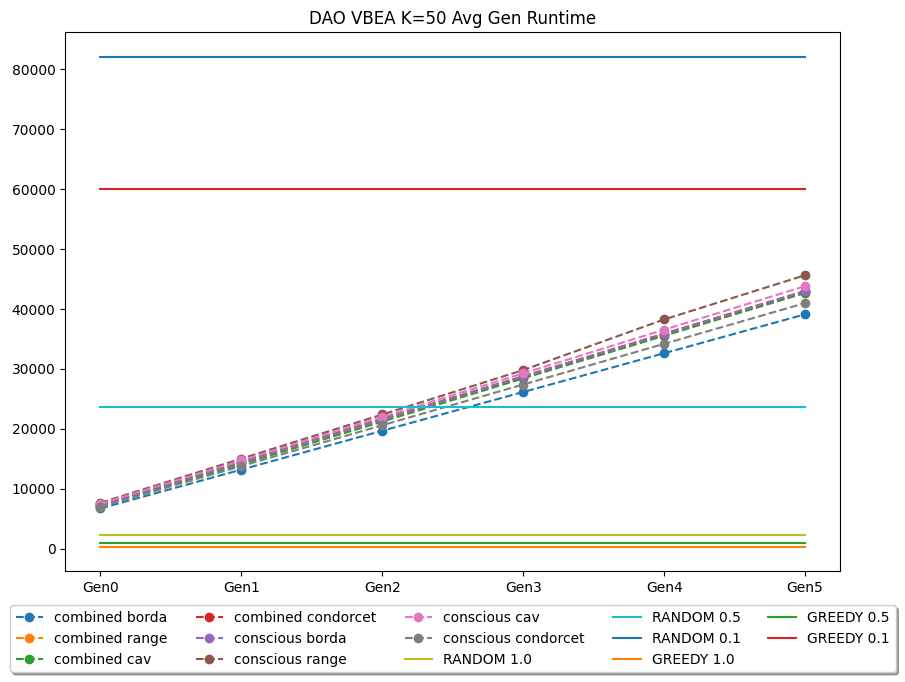

In [502]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

# ax.plot([180000] * 6, ":k", label="timelimit") 

ax.plot(dao_borda_com_50_rst, "--o", label="combined borda")
ax.plot(dao_range_com_50_rst, "--o", label="combined range")
ax.plot(dao_cav_com_50_rst, "--o", label="combined cav")
ax.plot(dao_condorcet_com_50_rst, "--o", label="combined condorcet")

ax.plot(dao_borda_con_50_rst, "--o", label="conscious borda")
ax.plot(dao_range_con_50_rst, "--o", label="conscious range")
ax.plot(dao_cav_con_50_rst, "--o", label="conscious cav")
ax.plot(dao_condorcet_con_50_rst, "--o", label="conscious condorcet")

## APEX

ax.plot([2242.856050955414] * 6, label="RANDOM 1.0")

ax.plot([23565.6025477707] * 6, label="RANDOM 0.5")

ax.plot([82075.52993630573] * 6, label="RANDOM 0.1")

ax.plot([327.50063694267516] * 6, label="GREEDY 1.0")

ax.plot([901.3579617834395] * 6, label="GREEDY 0.5")

ax.plot([60032.69426751592] * 6, label="GREEDY 0.1")

plt.title("DAO VBEA K=50 Avg Gen Runtime")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.savefig("dao-avg-gen-runtime(withapex).png")
plt.show()

# fig, ax = plt.subplots()
# x = [0,1,2,3,4,5]
# plt.xticks(x,x_ticks)


# x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
# ax.plot(dao_borda_com_rst, "--o", label="combined")
# ax.plot(dao_borda_con_rst, "--o", label="conscious")

# plt.title("DAO VBEA Uncap Ave Gen Runtime")
# plt.legend()
# fig.set_figwidth(10)
# fig.set_figheight(7)

plt.show()

In [ ]:
# 

### Front Size 

In [400]:
dao_com_borda_k_50_fs, dao_com_borda_k_50_dist = avg_gen_front_size(DAO_COMBINED_BORDA_K_50)
dao_com_range_k_50_fs, dao_com_range_k_50_dist = avg_gen_front_size(DAO_COMBINED_RANGE_K_50)
dao_com_cav_k_50_fs, dao_com_cav_k_50_dist = avg_gen_front_size(DAO_COMBINED_CAV_K_50)
dao_com_condorcet_k_50_fs, dao_com_condorcet_k_50_dist = avg_gen_front_size(DAO_COMBINED_CONDORCET_K_50)

dao_con_borda_k_50_fs, dao_con_borda_k_50_dist = avg_gen_front_size(DAO_CONSCIOUS_BORDA_K_50)
dao_con_range_k_50_fs, dao_con_range_k_50_dist = avg_gen_front_size(DAO_CONSCIOUS_RANGE_K_50)
dao_con_cav_k_50_fs, dao_con_cav_k_50_dist = avg_gen_front_size(DAO_CONSCIOUS_CAV_K_50)
dao_con_condorcet_k_50_fs, dao_con_condorcet_k_50_dist = avg_gen_front_size(DAO_CONSCIOUS_CONDORCET_K_50)

dao_com_uncap_fs, dao_com_uncap_dist = avg_gen_front_size(DAO_COMBINED_BORDA_UNCAP)
dao_con_uncap_fs, dao_com_uncap_dist = avg_gen_front_size(DAO_CONSCIOUS_BORDA_UNCAP)

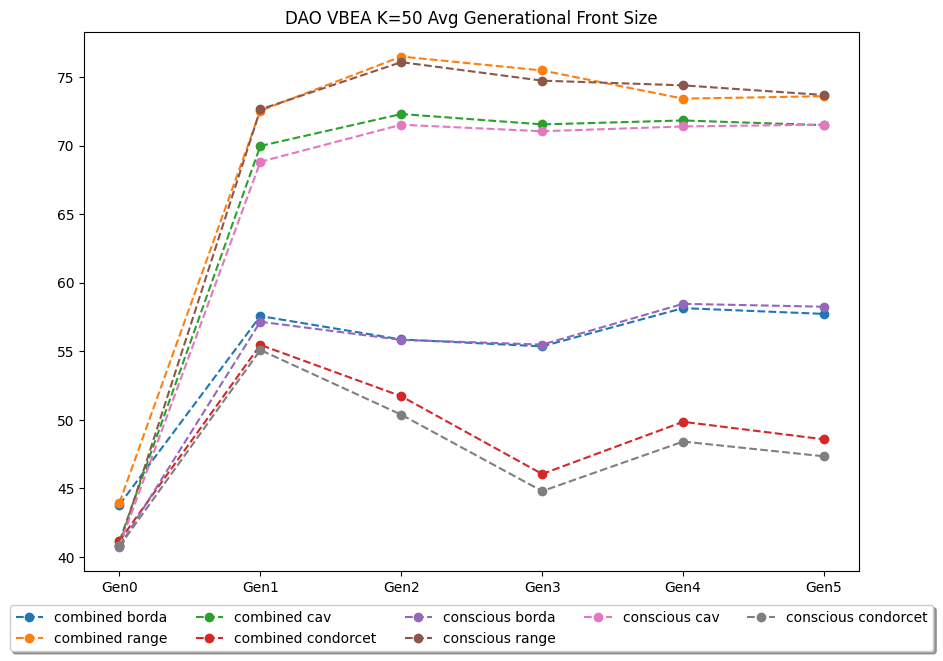

In [508]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

ax.plot(dao_com_borda_k_50_fs, "--o", label="combined borda")
ax.plot(dao_com_range_k_50_fs, "--o", label="combined range")
ax.plot(dao_com_cav_k_50_fs, "--o", label="combined cav")
ax.plot(dao_com_condorcet_k_50_fs, "--o", label="combined condorcet")


ax.plot(dao_con_borda_k_50_fs, "--o", label="conscious borda")
ax.plot(dao_con_range_k_50_fs, "--o", label="conscious range")
ax.plot(dao_con_cav_k_50_fs, "--o", label="conscious cav")
ax.plot(dao_con_condorcet_k_50_fs, "--o", label="conscious condorcet")


# ax.plot([1.43] * 6, label="RANDOM 1.0")
# ax.plot([10.45] * 6, label="RANDOM 0.5")
# ax.plot([110.52] * 6, label="RANDOM 0.1")
# ax.plot([1.00] * 6, label="GREEDY 1.0")
# ax.plot([1.14] * 6, label="GREEDY 0.5")
# ax.plot([94.54] * 6, label="GREEDY 0.1")



plt.title("DAO VBEA K=50 Avg Generational Front Size")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.set_figwidth(10)
fig.set_figheight(7)
plt.savefig("dao-avg-gen-frontsize.png", bbox_inches="tight")
plt.show()



# fig, ax = plt.subplots()
# x = [0,1,2,3,4,5]
# x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
# plt.xticks(x,x_ticks)

# ax.plot(dao_com_uncap_fs, "--or", label="combined")
# ax.plot(dao_con_uncap_fs, "--ob", label="conscious")

# plt.title("DAO VBEA Uncap Avg Front Size")
# plt.legend()
# # plt.savefig("DAO-VBEA-uncap-avg-gen-frontsize.png")
plt.show()